To transform the second-order system
\begin{equation}\label{eq:fput}
    \ddot{x}_{\ell} = f(x_{\ell+1} - x_{\ell}) - f(x_{\ell} - x_{\ell-1}),
\end{equation}
into a first-order system, we introduce the variables
$
y_{\ell} = x_{\ell} \quad \text{and} \quad v_{\ell} = \dot{x}_{\ell}.
$
The system then becomes
\begin{equation}
    \dot{y}_{\ell} = v_{\ell},
\end{equation}
\begin{equation}
    \dot{v}_{\ell} = f(y_{\ell+1} - y_{\ell}) - f(y_{\ell} - y_{\ell-1}),
\end{equation}
where we have periodic boundary conditions
$
y_{\ell+L} = y_{\ell} \quad \text{and} \quad v_{\ell+L} = v_{\ell} \quad \text{for some given } L \in \mathbb{N}.
$

Given that $ F(x) = \frac{1}{2} k x^2 + \frac{1}{3} \alpha x^3 $ is an antiderivative of $ f $, we have
$
f(x) = \frac{d}{dx} F(x) = kx + \alpha x^2.
$

Therefore, the first-order system can be written as
\begin{equation}
    \dot{y}_{\ell} = v_{\ell},
\end{equation}
\begin{equation}
    \dot{v}_{\ell} = \big( k (y_{\ell+1} - y_{\ell}) + \alpha (y_{\ell+1} - y_{\ell})^2 \big)
                     - \big( k (y_{\ell} - y_{\ell-1}) + \alpha (y_{\ell} - y_{\ell-1})^2 \big),
\end{equation}
for $ \ell = 1, \dots, L $, with the periodic boundary conditions
$
y_{\ell+L} = y_{\ell} \quad \text{and} \quad v_{\ell+L} = v_{\ell}.
$

We consider the system for $ L = 5 $ with the periodic boundary conditions \$ y_{\ell+5} = y_{\ell} $ and $ v_{\ell+5} = v_{\ell} $. The first-order system is given by
\begin{align}
    \dot{y}_1 &= v_1, \\
    \dot{y}_2 &= v_2, \\
    \dot{y}_3 &= v_3, \\
    \dot{y}_4 &= v_4, \\
    \dot{y}_5 &= v_5,
\end{align}
and
\begin{align}
    \dot{v}_1 &= f(y_2 - y_1) - f(y_1 - y_5), \\
    \dot{v}_2 &= f(y_3 - y_2) - f(y_2 - y_1), \\
    \dot{v}_3 &= f(y_4 - y_3) - f(y_3 - y_2), \\
    \dot{v}_4 &= f(y_5 - y_4) - f(y_4 - y_3), \\
    \dot{v}_5 &= f(y_1 - y_5) - f(y_5 - y_4),
\end{align}
where
$
f(x) = kx + \alpha x^2.
$

The periodic boundary conditions imply
$
y_{\ell+5} = y_{\ell} \quad \text{and} \quad v_{\ell+5} = v_{\ell} \quad \text{for all } \ell.
$

In [6]:
import sympy as sp
k, a = sp.symbols('k a')
x = sp.symbols('x1 x2 x3 x4 x5')
v = sp.symbols('v1 v2 v3 v4 v5')
m = sp.Symbol('m')
f = k * m + a * m**2
dot_x = [v[i] for i in range(5)]
dot_v = [
    f.subs(m, x[(i + 1) % 5] - x[i]) - f.subs(m, x[i] - x[(i - 1) % 5])
    for i in range(5)
]
dot_v_simplified = [sp.simplify(expr) for expr in dot_v]
dot_x, dot_v_simplified

([v1, v2, v3, v4, v5],
 [a*(x1 - x2)**2 - a*(x1 - x5)**2 - k*(x1 - x2) - k*(x1 - x5),
  -a*(x1 - x2)**2 + a*(x2 - x3)**2 + k*(x1 - x2) - k*(x2 - x3),
  -a*(x2 - x3)**2 + a*(x3 - x4)**2 + k*(x2 - x3) - k*(x3 - x4),
  -a*(x3 - x4)**2 + a*(x4 - x5)**2 + k*(x3 - x4) - k*(x4 - x5),
  a*(x1 - x5)**2 - a*(x4 - x5)**2 + k*(x1 - x5) + k*(x4 - x5)])

In [177]:
import sympy as sp
k, a = sp.symbols('k a')
x = sp.symbols('x1 x2 x3')
v = sp.symbols('v1 v2 v3')
m = sp.Symbol('m')
f = k * m + a * m**2
dot_x = [v[i] for i in range(3)]
dot_v = [
    f.subs(m, x[(i + 1) % 3] - x[i]) - f.subs(m, x[i] - x[(i - 1) % 3])
    for i in range(3)
]
dot_v_simplified = [sp.simplify(expr) for expr in dot_v]
dot_x, dot_v_simplified

([v1, v2, v3],
 [a*(x1 - x2)**2 - a*(x1 - x3)**2 - k*(x1 - x2) - k*(x1 - x3),
  -a*(x1 - x2)**2 + a*(x2 - x3)**2 + k*(x1 - x2) - k*(x2 - x3),
  a*(x1 - x3)**2 - a*(x2 - x3)**2 + k*(x1 - x3) + k*(x2 - x3)])

###### 
\begin{align}
\dot{x}_1=&v_1,\\
\dot{x}_2=&v_2,\\
\dot{x}_3=&v_3,\\
\dot{x}_4=&v_4,\\
\dot{x}_5=&v_5,\\
\dot{v}_1=&a(x_1 - x_2)^2 - a(x_1 - x_5)^2 - k(x_1 - x_2) - k(x_1 - x_5),\\
 \dot{v}_2=& -a(x_1 - x_2)^2 + a(x_2 - x_3)^2 + k(x_1 - x_2) - k(x_2 - x_3),\\
  \dot{v}_3=&-a(x_2 - x_3)^2 + a(x_3 - x_4)^2 + k(x_2 - x_3) - k(x_3 - x_4),\\
  \dot{v}_4=&-a(x_3 - x_4)^2 + a(x_4 - x_5)^2 + k(x_3 - x_4) - k(x_4 - x_5),\\
  \dot{v}_5=&a(x_1 - x_5)^2 - a(x_4 - x_5)^2 + k(x_1 - x_5) + k(x_4 - x_5),\\
  \dot{k}=&0\\
  \dot{a}=&0
 \end{align}

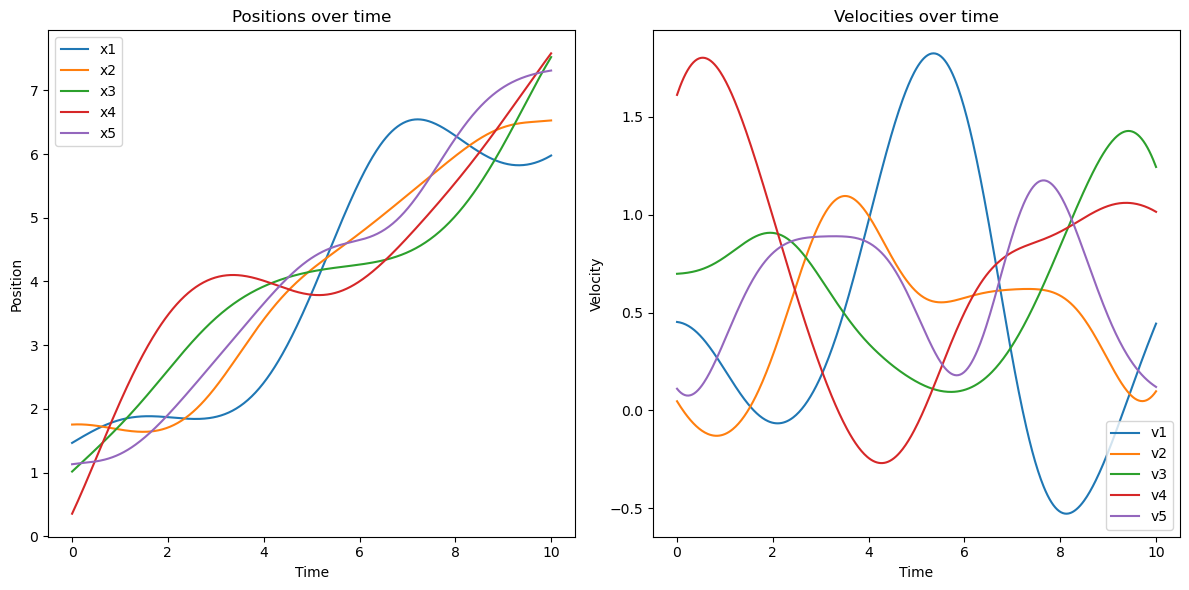

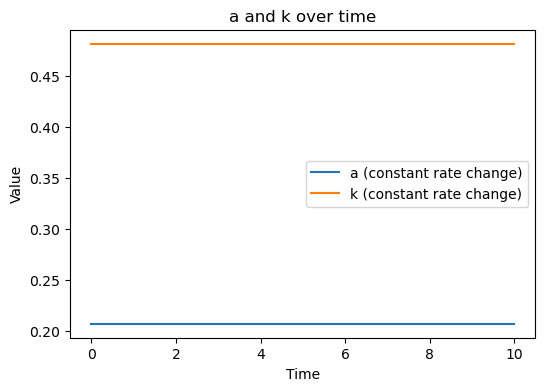

In [59]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
x0 = np.random.uniform(0, 2, 5) 
v0 = np.random.uniform(0, 2, 5) 
a_init = np.random.uniform(0.1, 2)
k_init = np.random.uniform(0.1, 2) 
def system(t, y):
    x1, x2, x3, x4, x5, v1, v2, v3, v4, v5, a, k = y
    dx1_dt = v1
    dx2_dt = v2
    dx3_dt = v3
    dx4_dt = v4
    dx5_dt = v5
    dv1_dt = a*(x1 - x2)**2 - a*(x1 - x5)**2 - k*(x1 - x2) - k*(x1 - x5)
    dv2_dt = -a*(x1 - x2)**2 + a*(x2 - x3)**2 + k*(x1 - x2) - k*(x2 - x3)
    dv3_dt = -a*(x2 - x3)**2 + a*(x3 - x4)**2 + k*(x2 - x3) - k*(x3 - x4)
    dv4_dt = -a*(x3 - x4)**2 + a*(x4 - x5)**2 + k*(x3 - x4) - k*(x4 - x5)
    dv5_dt = a*(x1 - x5)**2 - a*(x4 - x5)**2 + k*(x1 - x5) + k*(x4 - x5)

    da_dt = 0
    dk_dt = 0
    return [dx1_dt, dx2_dt, dx3_dt, dx4_dt, dx5_dt, dv1_dt, dv2_dt, dv3_dt, dv4_dt, dv5_dt, da_dt, dk_dt]

initial_conditions = np.concatenate([x0, v0, [a_init, k_init]])
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 500)
solution = solve_ivp(system, t_span, initial_conditions, t_eval=t_eval)
x_sol = solution.y[:5, :]
v_sol = solution.y[5:10, :]
a_sol = solution.y[10, :]
k_sol = solution.y[11, :]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for i in range(5):
    plt.plot(t_eval, x_sol[i, :], label=f"x{i+1}")
plt.title("Positions over time")
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()
plt.subplot(1, 2, 2)
for i in range(5):
    plt.plot(t_eval, v_sol[i, :], label=f"v{i+1}")
plt.title("Velocities over time")
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.legend()
plt.tight_layout()
plt.show()
plt.figure(figsize=(6, 4))
plt.plot(t_eval, a_sol, label="a (constant rate change)")
plt.plot(t_eval, k_sol, label="k (constant rate change)")
plt.title("a and k over time")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

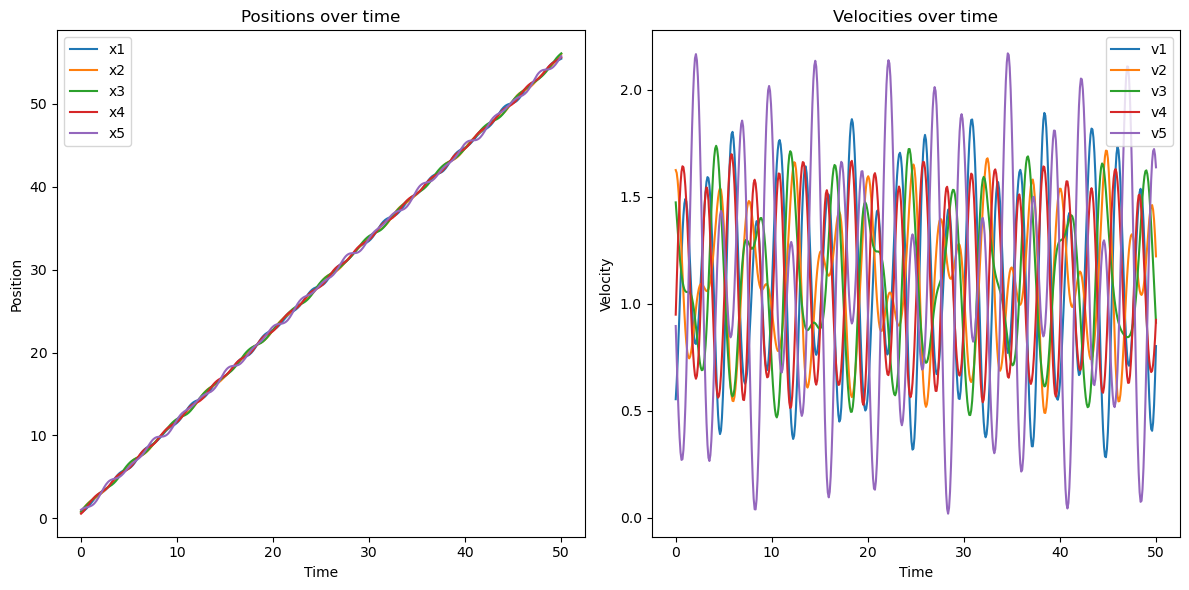

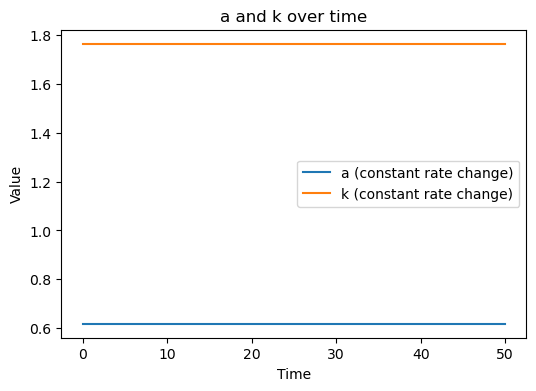

In [58]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Random initial conditions for positions and velocities between 0 and 2
x0 = np.random.uniform(0, 2, 5)  # 5 positions
v0 = np.random.uniform(0, 2, 5)  # 5 velocities

# Random initial conditions for a and k between 0.1 and 2
a_init = np.random.uniform(0.1, 2)  # Initial value of a
k_init = np.random.uniform(0.1, 2)  # Initial value of k

# Define the system of ODEs with dynamics for a and k
def system(t, y):
    # Extract positions (x) and velocities (v), and constants a and k
    x1, x2, x3, x4, x5, v1, v2, v3, v4, v5, a, k = y
    
    # Equations for dx/dt and dv/dt
    dx1_dt = v1
    dx2_dt = v2
    dx3_dt = v3
    dx4_dt = v4
    dx5_dt = v5
    
    dv1_dt = a*(x1 - x2)**2 - a*(x1 - x5)**2 - k*(x1 - x2) - k*(x1 - x5)
    dv2_dt = -a*(x1 - x2)**2 + a*(x2 - x3)**2 + k*(x1 - x2) - k*(x2 - x3)
    dv3_dt = -a*(x2 - x3)**2 + a*(x3 - x4)**2 + k*(x2 - x3) - k*(x3 - x4)
    dv4_dt = -a*(x3 - x4)**2 + a*(x4 - x5)**2 + k*(x3 - x4) - k*(x4 - x5)
    dv5_dt = a*(x1 - x5)**2 - a*(x4 - x5)**2 + k*(x1 - x5) + k*(x4 - x5)
    
    # Equations for da/dt and dk/dt
    da_dt = 0
    dk_dt = 0
    
    # Return all derivatives
    return [dx1_dt, dx2_dt, dx3_dt, dx4_dt, dx5_dt, dv1_dt, dv2_dt, dv3_dt, dv4_dt, dv5_dt, da_dt, dk_dt]

# Initial conditions vector (positions, velocities, a, k)
initial_conditions = np.concatenate([x0, v0, [a_init, k_init]])

# Time span for the simulation
t_span = (0, 50)  # From t=0 to t=10
t_eval = np.linspace(t_span[0], t_span[1], 500)

# Solve the ODE system
solution = solve_ivp(system, t_span, initial_conditions, t_eval=t_eval)

# Extract positions, velocities, and the constants a and k from the solution
x_sol = solution.y[:5, :]
v_sol = solution.y[5:10, :]
a_sol = solution.y[10, :]
k_sol = solution.y[11, :]
plt.figure(figsize=(12, 6))

# Plot positions
plt.subplot(1, 2, 1)
for i in range(5):
    plt.plot(solution.t, x_sol[i, :], label=f"x{i+1}")  # Use solution.t
plt.title("Positions over time")
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()

# Plot velocities
plt.subplot(1, 2, 2)
for i in range(5):
    plt.plot(solution.t, v_sol[i, :], label=f"v{i+1}")  # Use solution.t
plt.title("Velocities over time")
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.legend()

plt.tight_layout()
plt.show()

# Plot a and k over time
plt.figure(figsize=(6, 4))
plt.plot(solution.t, a_sol, label="a (constant rate change)")  # Use solution.t
plt.plot(solution.t, k_sol, label="k (constant rate change)")  # Use solution.t
plt.title("a and k over time")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

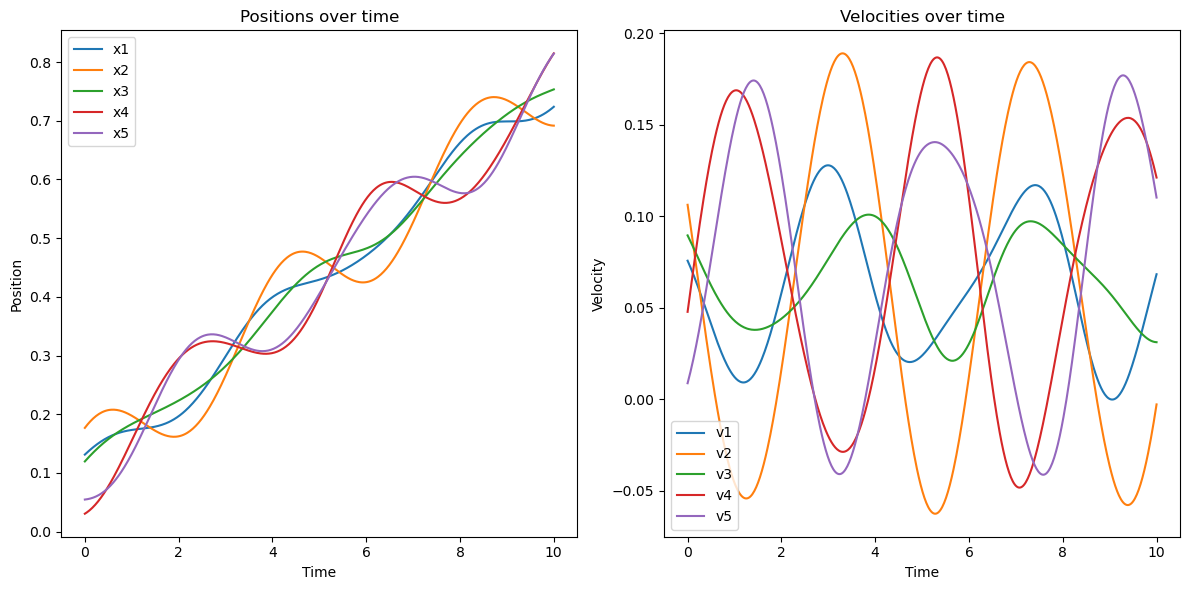

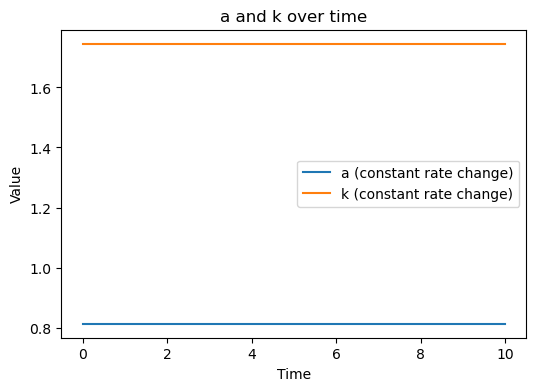

In [74]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import csv
x0 = np.random.uniform(0, 0.2, 5)
v0 = np.random.uniform(0, 0.2, 5)
a_init = np.random.uniform(0.1, 2)
k_init = np.random.uniform(0.1, 2)
def system(t, y):
    x1, x2, x3, x4, x5, v1, v2, v3, v4, v5, a, k = y
    dx1_dt = v1
    dx2_dt = v2
    dx3_dt = v3
    dx4_dt = v4
    dx5_dt = v5
    dv1_dt = a*(x1 - x2)**2 - a*(x1 - x5)**2 - k*(x1 - x2) - k*(x1 - x5)
    dv2_dt = -a*(x1 - x2)**2 + a*(x2 - x3)**2 + k*(x1 - x2) - k*(x2 - x3)
    dv3_dt = -a*(x2 - x3)**2 + a*(x3 - x4)**2 + k*(x2 - x3) - k*(x3 - x4)
    dv4_dt = -a*(x3 - x4)**2 + a*(x4 - x5)**2 + k*(x3 - x4) - k*(x4 - x5)
    dv5_dt = a*(x1 - x5)**2 - a*(x4 - x5)**2 + k*(x1 - x5) + k*(x4 - x5)
    da_dt = 0
    dk_dt = 0
    return [dx1_dt, dx2_dt, dx3_dt, dx4_dt, dx5_dt, dv1_dt, dv2_dt, dv3_dt, dv4_dt, dv5_dt, da_dt, dk_dt]
initial_conditions = np.concatenate([x0, v0, [a_init, k_init]])
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 500)
solution = solve_ivp(system, t_span, initial_conditions, t_eval=t_eval)
x_sol = solution.y[:5, :]
v_sol = solution.y[5:10, :]
a_sol = solution.y[10, :]
k_sol = solution.y[11, :]
filename = 'L5.csv'
with open(filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['x1', 'x2', 'x3', 'x4', 'x5', 'v1', 'v2', 'v3', 'v4', 'v5', 'a', 'k', 'trajectory'])
    for i in range(500):  
        for j in range(5): 
            writer.writerow(list(x_sol[:, i]) + list(v_sol[:, i]) + [a_sol[i], k_sol[i], j + 1])
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for i in range(5):
    plt.plot(t_eval, x_sol[i, :], label=f"x{i+1}")
plt.title("Positions over time")
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()
plt.subplot(1, 2, 2)
for i in range(5):
    plt.plot(t_eval, v_sol[i, :], label=f"v{i+1}")
plt.title("Velocities over time")
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.legend()
plt.tight_layout()
plt.show()
plt.figure(figsize=(6, 4))
plt.plot(t_eval, a_sol, label="a (constant rate change)")
plt.plot(t_eval, k_sol, label="k (constant rate change)")
plt.title("a and k over time")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

In [83]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp
import csv
import itertools
import os
import random
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, KFold
from sklearn.kernel_ridge import KernelRidge
from sympy import symbols, simplify, lambdify, Function, diff, Mul
from sklearn.metrics import mean_squared_error
import math
from scipy.stats import pearsonr

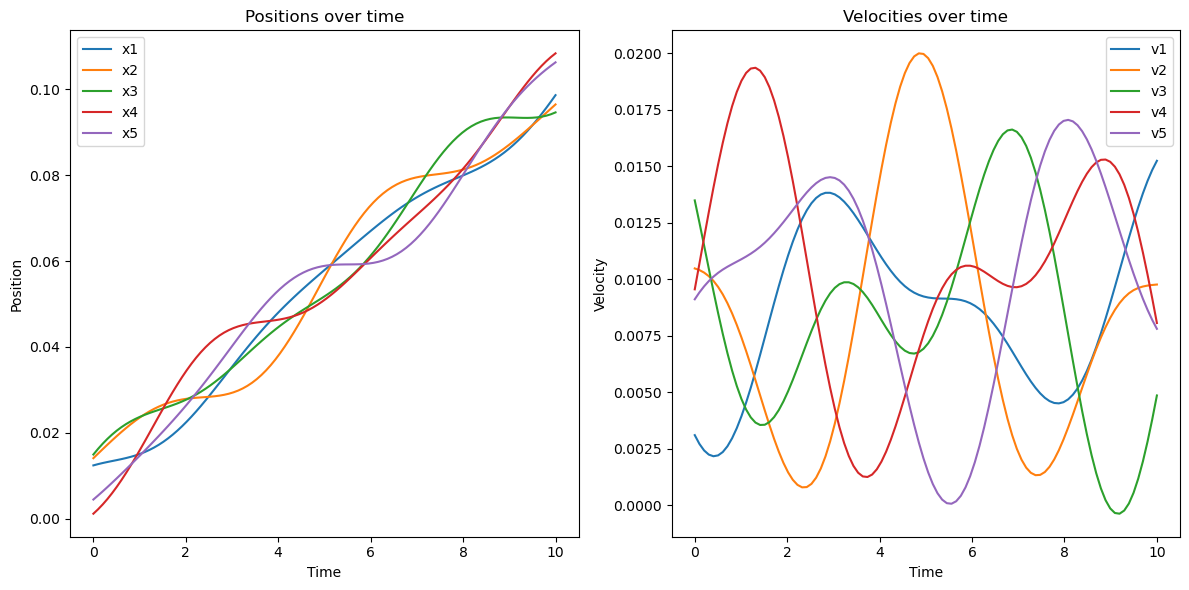

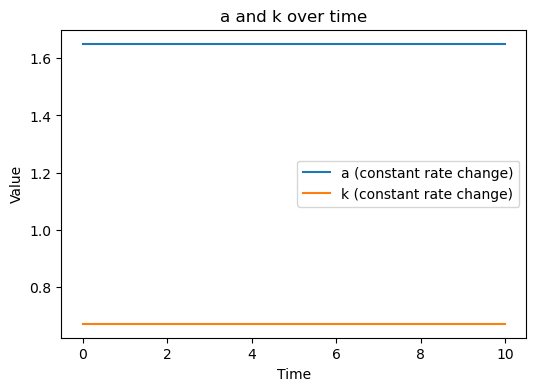

In [97]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import csv
x0 = np.random.uniform(0, 0.02, 5)
v0 = np.random.uniform(0, 0.02, 5)
a_init = np.random.uniform(0.1, 2)
k_init = np.random.uniform(0.1, 2)
def system(t, y):
    x1, x2, x3, x4, x5, v1, v2, v3, v4, v5, a, k = y
    dx1_dt = v1
    dx2_dt = v2
    dx3_dt = v3
    dx4_dt = v4
    dx5_dt = v5
    dv1_dt = a*(x1 - x2)**2 - a*(x1 - x5)**2 - k*(x1 - x2) - k*(x1 - x5)
    dv2_dt = -a*(x1 - x2)**2 + a*(x2 - x3)**2 + k*(x1 - x2) - k*(x2 - x3)
    dv3_dt = -a*(x2 - x3)**2 + a*(x3 - x4)**2 + k*(x2 - x3) - k*(x3 - x4)
    dv4_dt = -a*(x3 - x4)**2 + a*(x4 - x5)**2 + k*(x3 - x4) - k*(x4 - x5)
    dv5_dt = a*(x1 - x5)**2 - a*(x4 - x5)**2 + k*(x1 - x5) + k*(x4 - x5)
    da_dt = 0
    dk_dt = 0
    return [dx1_dt, dx2_dt, dx3_dt, dx4_dt, dx5_dt, dv1_dt, dv2_dt, dv3_dt, dv4_dt, dv5_dt, da_dt, dk_dt]
initial_conditions = np.concatenate([x0, v0, [a_init, k_init]])
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 100)
solution = solve_ivp(system, t_span, initial_conditions, t_eval=t_eval)
x_sol = solution.y[:5, :]
v_sol = solution.y[5:10, :]
a_sol = solution.y[10, :]
k_sol = solution.y[11, :]
filename = 'L5.csv'
with open(filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['x1', 'x2', 'x3', 'x4', 'x5', 'v1', 'v2', 'v3', 'v4', 'v5', 'a', 'k', 'trajectory'])

    for j in range(5):
        for i in range(100): 
            writer.writerow(list(x_sol[:, i]) + list(v_sol[:, i]) + [a_sol[i], k_sol[i], j + 1])
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for i in range(5):
    plt.plot(t_eval, x_sol[i, :], label=f"x{i+1}")
plt.title("Positions over time")
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()
plt.subplot(1, 2, 2)
for i in range(5):
    plt.plot(t_eval, v_sol[i, :], label=f"v{i+1}")
plt.title("Velocities over time")
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.legend()
plt.tight_layout()
plt.show()
plt.figure(figsize=(6, 4))
plt.plot(t_eval, a_sol, label="a (constant rate change)")
plt.plot(t_eval, k_sol, label="k (constant rate change)")
plt.title("a and k over time")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

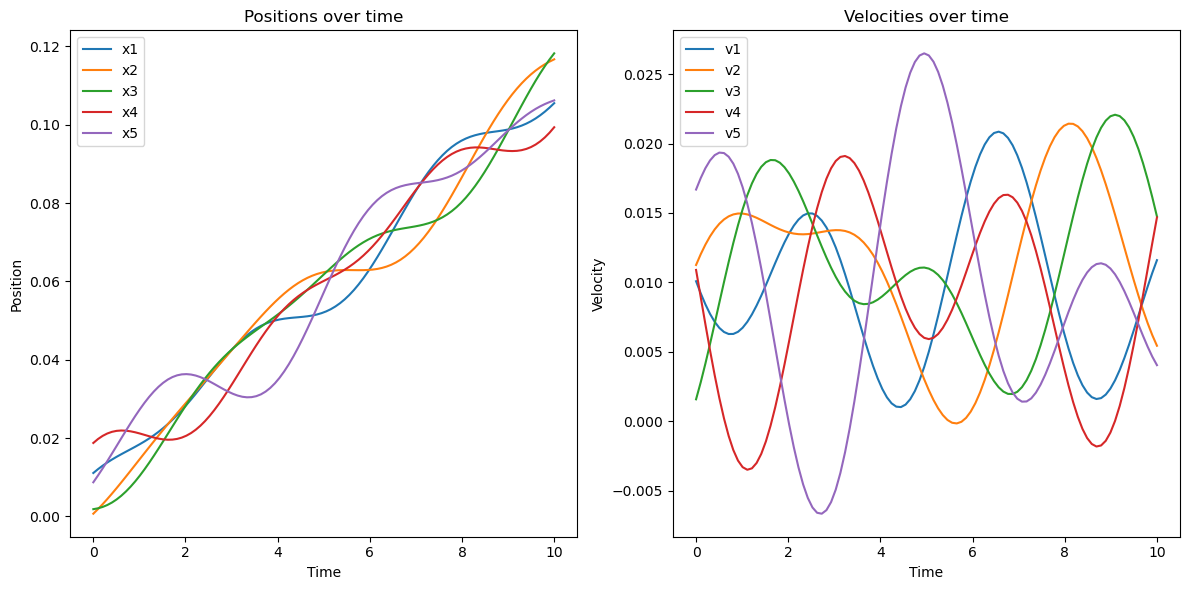

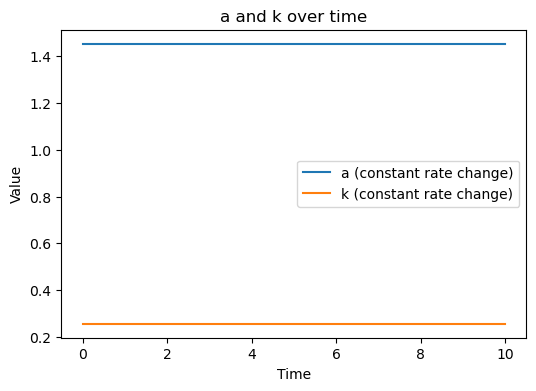

In [399]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import csv
x0 = np.random.uniform(0, 0.02, 5)
v0 = np.random.uniform(0, 0.02, 5)
x11_init = np.random.uniform(0.1, 2)
x12_init = np.random.uniform(0.1, 2)
def system(t, y):
    x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12 = y
    dx1_dt = x6
    dx2_dt = x7
    dx3_dt = x8
    dx4_dt = x9
    dx5_dt = x10
    dx6_dt = x12*(x1 - x2)**2 - x12*(x1 - x5)**2 - x11*(x1 - x2) - x11*(x1 - x5)
    dx7_dt = -x12*(x1 - x2)**2 + x12*(x2 - x3)**2 + x11*(x1 - x2) - x11*(x2 - x3)
    dx8_dt = -x12*(x2 - x3)**2 + x12*(x3 - x4)**2 + x11*(x2 - x3) - x11*(x3 - x4)
    dx9_dt = -x12*(x3 - x4)**2 + x12*(x4 - x5)**2 + x11*(x3 - x4) - x11*(x4 - x5)
    dx10_dt = x12*(x1 - x5)**2 - x12*(x4 - x5)**2 + x11*(x1 - x5) + x11*(x4 - x5)
    dx11_dt = 0
    dx12_dt = 0
    return [dx1_dt, dx2_dt, dx3_dt, dx4_dt, dx5_dt, dx6_dt, dx7_dt, dx8_dt, dx9_dt, dx10_dt, dx11_dt, dx12_dt]
initial_conditions = np.concatenate([x0, v0, [x11_init, x12_init]])
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 100)
solution = solve_ivp(system, t_span, initial_conditions, t_eval=t_eval)
x_sol = solution.y[:5, :]
v_sol = solution.y[5:10, :]
x11_sol = solution.y[10, :]
x12_sol = solution.y[11, :]
filename = 'L5.csv'
with open(filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'trajectory'])

    for j in range(5):
        for i in range(100): 
            writer.writerow(list(x_sol[:, i]) + list(v_sol[:, i]) + [x11_sol[i], x12_sol[i],  j + 1])
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for i in range(5):
    plt.plot(t_eval, x_sol[i, :], label=f"x{i+1}")
plt.title("Positions over time")
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()
plt.subplot(1, 2, 2)
for i in range(5):
    plt.plot(t_eval, v_sol[i, :], label=f"v{i+1}")
plt.title("Velocities over time")
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.legend()
plt.tight_layout()
plt.show()
plt.figure(figsize=(6, 4))
plt.plot(t_eval, a_sol, label="a (constant rate change)")
plt.plot(t_eval, k_sol, label="k (constant rate change)")
plt.title("a and k over time")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

In [400]:
data = np.genfromtxt('L5.csv', delimiter=',', names=True)
training_data = []
holdout_data = []
for r in range(1, 6):
    trajectory_subset = data[data['trajectory'] == r]
    train_set, holdout_set = train_test_split(trajectory_subset, test_size=0.2, random_state=42)
    training_data.extend(train_set)
    holdout_data.extend(holdout_set)
with open('trainingp_data.csv', 'w', newline='') as trainfile:
    writer = csv.writer(trainfile)
    writer.writerow(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'trajectory'])
    for row in training_data:
        writer.writerow([row['x1'], row['x2'], row['x3'], row['x4'], row['x5'], row['x6'], row['x7'], row['x8'], row['x9'], row['x10'], row['x11'], row['x12'], row['trajectory']])
with open('holdoutp_data.csv', 'w', newline='') as holdfile:
    writer = csv.writer(holdfile)
    writer.writerow(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'trajectory'])
    for row in holdout_data:
        writer.writerow([row['x1'], row['x2'], row['x3'], row['x4'], row['x5'], row['x6'], row['x7'], row['x8'], row['x9'], row['x10'], row['x11'], row['x12'], row['trajectory']])

In [401]:
import csv
import random
trajectories = {1: [], 2: [], 3: [], 4: [], 5: []}
with open('trainingp_data.csv', 'r') as trainfile:
    reader = csv.DictReader(trainfile)
    for row in reader:
        x1 = float(row['x1'])
        x2 = float(row['x2'])
        x3 = float(row['x3'])
        x4 = float(row['x4'])
        x5 = float(row['x5'])
        x6 = float(row['x6'])
        x7 = float(row['x7'])
        x8 = float(row['x8'])
        x9 = float(row['x9'])
        x10 = float(row['x10'])
        x11 = float(row['x11'])
        x12 = float(row['x12'])
        trajectory = float(row['trajectory'])
        trajectories[trajectory].append({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'x5': x5, 'x6': x6, 'x7':x7, 'x8': x8, 'x9': x9, 'x10': x10, 'x11': x11, 'x12': x12, 'trajectory': trajectory})
for traj_points in trajectories.values():
    random.shuffle(traj_points)
num_points_per_file = len(trajectories[1]) // 5
for i in range(5):
    output_filename = f'B{i+1}.csv'
    with open(output_filename, 'w', newline='') as output_file:
        writer = csv.writer(output_file)
        writer.writerow(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'trajectory'])
        for trajectory in range(1, 6):
            points = trajectories[trajectory][i * num_points_per_file: (i + 1) * num_points_per_file]
            for point in points:
                writer.writerow([point['x1'], point['x2'], point['x3'], point['x4'], point['x5'], point['x6'], point['x7'], point['x8'], point['x9'], point['x10'], point['x11'], point['x12'], point['trajectory']])

In [402]:
import numpy as np
import sympy as sp
from cvxopt import matrix, solvers
from qpsolvers import solve_qp
def compute_kernel_matrix(X, c, d):
    n = X.shape[0]
    K = (c + np.dot(X, X.T)) ** d
    return K
def solve_for_lambda(data, c, d, lambda_value):
    K = compute_kernel_matrix(data, c, d)
    I = np.eye(K.shape[0])
    K_with_I = K + lambda_value * I
    K_with_I_inv = np.linalg.inv(K_with_I)
    y0, y1, y2, y3, y4 = sp.symbols('y0 y1 y2 y3 y4')
    y = sp.Matrix([y0, y1, y2, y3, y4])  
    M_matrix = sp.Matrix(K_with_I_inv)
    n = K.shape[0]
    m = 5
    M = sp.zeros(n, m)
    for i in range(n):
        for j in range(m):
            start_idx = j * 16
            end_idx = (j + 1) * 16
            M[i, j] = sp.Add(*M_matrix[i, start_idx:end_idx])
    M_transpose = M.transpose()
    A = M_transpose @ M 
    A_np = np.array(A).astype(np.float64)
    return A_np
data = np.loadtxt('B1.csv', delimiter=',', skiprows=1, usecols=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11))
data2 = np.loadtxt('B2.csv', delimiter=',', skiprows=1, usecols=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11))
data3 = np.loadtxt('B3.csv', delimiter=',', skiprows=1, usecols=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11))
data4 = np.loadtxt('B4.csv', delimiter=',', skiprows=1, usecols=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11))
solutions_combined = []
for i in range(0, 8):
    lambda_value = 10**(-i)
    A1_np = solve_for_lambda(data, c=1, d=4, lambda_value=lambda_value)
    A2_np = solve_for_lambda(data2, c=1, d=4, lambda_value=lambda_value)
    A3_np = solve_for_lambda(data3, c=1, d=4, lambda_value=lambda_value)
    A4_np = solve_for_lambda(data4, c=1, d=4, lambda_value=lambda_value)
    As_p = (A1_np + A2_np + A3_np + A4_np)
    P = np.array(As_p)
    q = np.zeros(5)
    a = np.random.uniform(-4, 4, 5)
    G = np.zeros((0, 5))
    h = np.zeros(0)
    A = a.reshape(1, -1)
    b = np.array([1.0])
    y = solve_qp(P, q, G, h, A, b, solver="clarabel")
    y_opt = y.flatten() if isinstance(y, np.ndarray) else np.array(y).flatten()
    y_names = ['y0', 'y1', 'y2', 'y3', 'y4']
    y_dict = {name: value for name, value in zip(y_names, y_opt)}
    solutions_combined.append((lambda_value, y_dict))
    print(f"Lambda: {lambda_value}")
    print(y_dict)
print("\nAll Solutions Combined:")
for lambda_value, solution in solutions_combined:
#     print(f"Lambda: {lambda_value}")
    print(solution)
print("\nRandom vector a:")
print(a)

Lambda: 1
{'y0': -0.2576429015708919, 'y1': -0.2576429298033033, 'y2': -0.25764289189085987, 'y3': -0.25764287135032127, 'y4': -0.25764276477121245}
Lambda: 0.1
{'y0': 0.15812283033665264, 'y1': 0.15812268341629224, 'y2': 0.15812296494353087, 'y3': 0.1581225911211857, 'y4': 0.15812253493475326}
Lambda: 0.01
{'y0': -3.9828724102617317, 'y1': -3.9828716622029923, 'y2': -3.982872346649002, 'y3': -3.9828716133291957, 'y4': -3.982871485683178}
Lambda: 0.001
{'y0': -0.2278631956110368, 'y1': -0.2278631820222227, 'y2': -0.2278631835686103, 'y3': -0.22786318540680295, 'y4': -0.22786318645002576}
Lambda: 0.0001
{'y0': 0.2914338726457372, 'y1': 0.2914338678194669, 'y2': 0.29143387091194484, 'y3': 0.2914338733051092, 'y4': 0.2914338685502225}
Lambda: 1e-05
{'y0': 0.15608649616187395, 'y1': 0.15608649549567113, 'y2': 0.1560864960124986, 'y3': 0.15608649634332242, 'y4': 0.15608649532453076}
Lambda: 1e-06
{'y0': 0.608288872013074, 'y1': 0.6082888716104774, 'y2': 0.6082888717500244, 'y3': 0.608288871

In [412]:
def compute_kernel_matrix(X, c, d):
    n = X.shape[0]
    K = (c + np.dot(X, X.T)) ** d
    return K
def solve_for_lambda(data, c, d, lambda_value, y_values):
    K = compute_kernel_matrix(data, c, d)
    I = np.eye(K.shape[0])
    K_with_I = K + lambda_value * I
    K_with_I_inv = np.linalg.inv(K_with_I)
    y_repeated = np.repeat(y_values, len(data) // len(y_values))
    alpha_sym = K_with_I_inv @ y_repeated
    return K_with_I_inv, alpha_sym
def generate_f_alpha_expression(alpha_sym, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x_q1_sym, x_q2_sym, x_q3_sym, x_q4_sym, x_q5_sym, x_q6_sym, x_q7_sym, x_q8_sym, x_q9_sym, x_q10_sym, x_q11_sym, x_q12_sym, c, d):
    f_alpha = 0
    for i in range(len(alpha_sym)):
        f_alpha += alpha_sym[i] * (c + (x1[i] * x_q1_sym) + (x2[i] * x_q2_sym) + (x3[i] * x_q3_sym) + (x4[i] * x_q4_sym) + (x5[i] * x_q5_sym) + (x6[i] * x_q6_sym) + (x7[i] * x_q7_sym) + (x8[i] * x_q8_sym) + (x9[i] * x_q9_sym) + (x10[i] * x_q10_sym) + (x11[i] * x_q11_sym) + (x12[i] * x_q12_sym)) ** d
    f_alpha_expanded = sp.expand(f_alpha)
    f_alpha_collected = sp.collect(f_alpha_expanded, (x_q1_sym, x_q2_sym, x_q3_sym, x_q4_sym, x_q5_sym, x_q6_sym, x_q7_sym, x_q8_sym, x_q9_sym, x_q10_sym, x_q11_sym, x_q12_sym))
    return f_alpha_collected
def process_dataset(file_path, c, d, lambda_values, y_values_dicts):
    data = np.loadtxt(file_path, delimiter=',', skiprows=1, usecols=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11))
    x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12 = data[:, 0], data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6], data[:, 7], data[:, 8], data[:, 9], data[:, 10], data[:,11]
    K_with_I_inv_list = []
    alpha_sym_list = []
    f_alpha_expression_list = []
    for lambda_val, (_, y_values_dict) in zip(lambda_values, y_values_dicts):
        K_with_I_inv, alpha_sym = solve_for_lambda(data, c, d, lambda_val, list(y_values_dict.values()))
        x_q1_sym, x_q2_sym, x_q3_sym, x_q4_sym, x_q5_sym, x_q6_sym, x_q7_sym, x_q8_sym, x_q9_sym, x_q10_sym, x_q11_sym, x_q12_sym = sp.symbols('x1 x2 x3 x4 x5 x6 x7 x8 x9 x10 x11 x12')
        K_with_I_inv_list.append(K_with_I_inv)
        alpha_sym_list.append(alpha_sym)
        f_alpha_expression = generate_f_alpha_expression(alpha_sym, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x_q1_sym, x_q2_sym, x_q3_sym, x_q4_sym, x_q5_sym, x_q6_sym, x_q7_sym, x_q8_sym, x_q9_sym, x_q10_sym, x_q11_sym, x_q12_sym, c, d)
        f_alpha_expression_list.append(f_alpha_expression)
    
    return K_with_I_inv_list, alpha_sym_list, f_alpha_expression_list
lamda = 8
c, d = 1, 4
lambda_values = [10**(-i) for i in range(lamda)]
y_values_dicts_list = solutions_combined
file_path_1 = "B1.csv"
file_path_2 = "B2.csv"
file_path_3 = "B3.csv"
file_path_4 = "B4.csv"
file_path_5 = "B5.csv"
B501_data = pd.read_csv('B1.csv')
dr1 = pd.read_csv("B5.csv")
traj_len = B501_data.groupby('trajectory').size()
rep4 = int(round(traj_len.mean()))
K_with_I_inv_1, alpha_sym_1, f_alpha_expression_1 = process_dataset(file_path_1, c, d, lambda_values, y_values_dicts_list)
K_with_I_inv_2, alpha_sym_2, f_alpha_expression_2 = process_dataset(file_path_2, c, d, lambda_values, y_values_dicts_list)
K_with_I_inv_3, alpha_sym_3, f_alpha_expression_3 = process_dataset(file_path_3, c, d, lambda_values, y_values_dicts_list)
K_with_I_inv_4, alpha_sym_4, f_alpha_expression_4 = process_dataset(file_path_4, c, d, lambda_values, y_values_dicts_list)
K_with_I_inv_5, alpha_sym_5, f_alpha_expression_5 = process_dataset(file_path_5, c, d, lambda_values, y_values_dicts_list)
f_vector1_0, f_vector1_1, f_vector1_2, f_vector1_3, f_vector1_4, f_vector1_5, f_vector1_6, f_vector1_7 = [], [], [], [], [], [], [], []
for index, row in dr1.iterrows():
    value1_0, value1_1 = eval(str(f_alpha_expression_1[0]), globals(), row.to_dict()), eval(str(f_alpha_expression_1[1]), globals(), row.to_dict())
    value1_2, value1_3 = eval(str(f_alpha_expression_1[2]), globals(), row.to_dict()), eval(str(f_alpha_expression_1[3]), globals(), row.to_dict())
    value1_4, value1_5 = eval(str(f_alpha_expression_1[4]), globals(), row.to_dict()), eval(str(f_alpha_expression_1[5]), globals(), row.to_dict())
    value1_6, value1_7 = eval(str(f_alpha_expression_1[6]), globals(), row.to_dict()), eval(str(f_alpha_expression_1[7]), globals(), row.to_dict())
    f_vector1_0.append(value1_0),f_vector1_1.append(value1_1),f_vector1_2.append(value1_2),f_vector1_3.append(value1_3), f_vector1_4.append(value1_4), f_vector1_5.append(value1_5), f_vector1_6.append(value1_6), f_vector1_7.append(value1_7)
f_vector2_0, f_vector2_1, f_vector2_2, f_vector2_3, f_vector2_4, f_vector2_5, f_vector2_6, f_vector2_7 = [], [], [], [], [], [], [], []
for index, row in dr1.iterrows():
    value2_0, value2_1 = eval(str(f_alpha_expression_2[0]), globals(), row.to_dict()), eval(str(f_alpha_expression_2[1]), globals(), row.to_dict())
    value2_2, value2_3 = eval(str(f_alpha_expression_2[2]), globals(), row.to_dict()), eval(str(f_alpha_expression_2[3]), globals(), row.to_dict())
    value2_4, value2_5 = eval(str(f_alpha_expression_2[4]), globals(), row.to_dict()), eval(str(f_alpha_expression_2[5]), globals(), row.to_dict())
    value2_6, value2_7 = eval(str(f_alpha_expression_2[6]), globals(), row.to_dict()), eval(str(f_alpha_expression_2[7]), globals(), row.to_dict())
    f_vector2_0.append(value2_0),f_vector2_1.append(value2_1),f_vector2_2.append(value2_2),f_vector2_3.append(value2_3),f_vector2_4.append(value2_4),f_vector2_5.append(value2_5),f_vector2_6.append(value2_6),f_vector2_7.append(value2_7)
f_vector3_0, f_vector3_1, f_vector3_2, f_vector3_3, f_vector3_4, f_vector3_5, f_vector3_6, f_vector3_7 = [], [], [], [], [], [], [], []
for index, row in dr1.iterrows():
    value3_0, value3_1 = eval(str(f_alpha_expression_3[0]), globals(), row.to_dict()), eval(str(f_alpha_expression_3[1]), globals(), row.to_dict())
    value3_2, value3_3 = eval(str(f_alpha_expression_3[2]), globals(), row.to_dict()), eval(str(f_alpha_expression_3[3]), globals(), row.to_dict())
    value3_4, value3_5 = eval(str(f_alpha_expression_3[4]), globals(), row.to_dict()), eval(str(f_alpha_expression_3[5]), globals(), row.to_dict())
    value3_6, value3_7 = eval(str(f_alpha_expression_3[6]), globals(), row.to_dict()), eval(str(f_alpha_expression_3[7]), globals(), row.to_dict())
    f_vector3_0.append(value3_0),f_vector3_1.append(value3_1),f_vector3_2.append(value3_2),f_vector3_3.append(value3_3),f_vector3_4.append(value3_4),f_vector3_5.append(value3_5),f_vector3_6.append(value3_6),f_vector3_7.append(value3_7),
f_vector4_0, f_vector4_1, f_vector4_2, f_vector4_3, f_vector4_4, f_vector4_5, f_vector4_6, f_vector4_7 = [], [], [], [], [], [], [], []
for index, row in dr1.iterrows():
    value4_0, value4_1 = eval(str(f_alpha_expression_4[0]), globals(), row.to_dict()), eval(str(f_alpha_expression_4[1]), globals(), row.to_dict())
    value4_2, value4_3 = eval(str(f_alpha_expression_4[2]), globals(), row.to_dict()), eval(str(f_alpha_expression_4[3]), globals(), row.to_dict())
    value4_4, value4_5 = eval(str(f_alpha_expression_4[4]), globals(), row.to_dict()), eval(str(f_alpha_expression_4[5]), globals(), row.to_dict())
    value4_6, value4_7 = eval(str(f_alpha_expression_4[6]), globals(), row.to_dict()), eval(str(f_alpha_expression_4[7]), globals(), row.to_dict())
    f_vector4_0.append(value4_0),f_vector4_1.append(value4_1),f_vector4_2.append(value4_2),f_vector4_3.append(value4_3),f_vector4_4.append(value4_4),f_vector4_5.append(value4_5),f_vector4_6.append(value4_6),f_vector4_7.append(value4_7)   
f_vector5_0, f_vector5_1, f_vector5_2, f_vector5_3, f_vector5_4, f_vector5_5, f_vector5_6, f_vector5_7 = [], [], [], [], [], [], [], []
for index, row in dr1.iterrows():
    value5_0, value5_1 = eval(str(f_alpha_expression_5[0]), globals(), row.to_dict()), eval(str(f_alpha_expression_5[1]), globals(), row.to_dict())
    value5_2, value5_3 = eval(str(f_alpha_expression_5[2]), globals(), row.to_dict()), eval(str(f_alpha_expression_5[3]), globals(), row.to_dict())
    value5_4, value5_5 = eval(str(f_alpha_expression_5[4]), globals(), row.to_dict()), eval(str(f_alpha_expression_5[5]), globals(), row.to_dict())
    value5_6, value5_7 = eval(str(f_alpha_expression_5[6]), globals(), row.to_dict()), eval(str(f_alpha_expression_5[7]), globals(), row.to_dict())
    f_vector5_0.append(value5_0),f_vector5_1.append(value5_1),f_vector5_2.append(value5_2),f_vector5_3.append(value5_3),f_vector5_4.append(value5_4),f_vector5_5.append(value5_5),f_vector5_6.append(value5_6),f_vector5_7.append(value5_7)    
h1, h2, h3, h4 = list(y_values_dicts_list[0][1].values()), list(y_values_dicts_list[1][1].values()), list(y_values_dicts_list[2][1].values()), list(y_values_dicts_list[3][1].values())
h5, h6, h7, h8 = list(y_values_dicts_list[4][1].values()), list(y_values_dicts_list[5][1].values()), list(y_values_dicts_list[6][1].values()), list(y_values_dicts_list[7][1].values())
y_B501_0, y_B501_1, y_B501_2, y_B501_3, y_B501_4 = np.repeat(h1, rep4), np.repeat(h2, rep4), np.repeat(h3, rep4), np.repeat(h4, rep4), np.repeat(h5, rep4)
y_B501_5, y_B501_6, y_B501_7, y_B502_0, y_B502_1 = np.repeat(h6, rep4), np.repeat(h7, rep4), np.repeat(h8, rep4), np.repeat(h1, rep4), np.repeat(h2, rep4)
y_B502_2, y_B502_3, y_B502_4, y_B502_5, y_B502_6 = np.repeat(h3, rep4), np.repeat(h4, rep4), np.repeat(h5, rep4), np.repeat(h6, rep4), np.repeat(h7, rep4)
y_B502_7, y_B503_0, y_B503_1,y_B503_2, y_B503_3 = np.repeat(h8, rep4), np.repeat(h1, rep4), np.repeat(h2, rep4), np.repeat(h3, rep4), np.repeat(h4, rep4)
y_B503_4,y_B503_5, y_B503_6, y_B503_7, y_B504_0 = np.repeat(h5, rep4), np.repeat(h6, rep4), np.repeat(h7, rep4), np.repeat(h8, rep4), np.repeat(h1, rep4)
y_B504_1, y_B504_2, y_B504_3, y_B504_4, y_B504_5 = np.repeat(h2, rep4), np.repeat(h3, rep4), np.repeat(h4, rep4), np.repeat(h5, rep4), np.repeat(h6, rep4)
y_B504_6, y_B504_7 = np.repeat(h7, rep4), np.repeat(h8, rep4)
y_B505_0, y_B505_1, y_B505_2, y_B505_3, y_B505_4 = np.repeat(h1, rep4), np.repeat(h2, rep4), np.repeat(h3, rep4), np.repeat(h4, rep4), np.repeat(h5, rep4)
y_B505_5, y_B505_6, y_B505_7 = np.repeat(h6, rep4), np.repeat(h7, rep4), np.repeat(h8, rep4)
RMSE_1_0, RMSE_1_1 = np.sqrt(mean_squared_error(y_B501_0, f_vector1_0)), np.sqrt(mean_squared_error(y_B501_1, f_vector1_1))
RMSE_1_2, RMSE_1_3 = np.sqrt(mean_squared_error(y_B501_2, f_vector1_2)), np.sqrt(mean_squared_error(y_B501_3, f_vector1_3))
RMSE_1_4, RMSE_1_5 = np.sqrt(mean_squared_error(y_B501_4, f_vector1_4)), np.sqrt(mean_squared_error(y_B501_5, f_vector1_5))
RMSE_1_6, RMSE_1_7 = np.sqrt(mean_squared_error(y_B501_6, f_vector1_6)), np.sqrt(mean_squared_error(y_B501_7, f_vector1_7))
RMSE_2_0, RMSE_2_1 = np.sqrt(mean_squared_error(y_B502_0, f_vector2_0)), np.sqrt(mean_squared_error(y_B502_1, f_vector2_1))
RMSE_2_2, RMSE_2_3 = np.sqrt(mean_squared_error(y_B502_2, f_vector2_2)), np.sqrt(mean_squared_error(y_B502_3, f_vector2_3))
RMSE_2_4, RMSE_2_5 = np.sqrt(mean_squared_error(y_B502_4, f_vector2_4)), np.sqrt(mean_squared_error(y_B502_5, f_vector2_5))
RMSE_2_6, RMSE_2_7 = np.sqrt(mean_squared_error(y_B502_6, f_vector2_6)), np.sqrt(mean_squared_error(y_B502_7, f_vector2_7))
RMSE_3_0, RMSE_3_1 = np.sqrt(mean_squared_error(y_B503_0, f_vector3_0)), np.sqrt(mean_squared_error(y_B503_1, f_vector3_1))
RMSE_3_2, RMSE_3_3 = np.sqrt(mean_squared_error(y_B503_2, f_vector3_2)), np.sqrt(mean_squared_error(y_B503_3, f_vector3_3))
RMSE_3_4, RMSE_3_5 = np.sqrt(mean_squared_error(y_B503_4, f_vector3_4)), np.sqrt(mean_squared_error(y_B503_5, f_vector3_5))
RMSE_3_6, RMSE_3_7 = np.sqrt(mean_squared_error(y_B503_6, f_vector3_6)), np.sqrt(mean_squared_error(y_B503_7, f_vector3_7))
RMSE_4_0, RMSE_4_1 = np.sqrt(mean_squared_error(y_B504_0, f_vector4_0)), np.sqrt(mean_squared_error(y_B504_1, f_vector4_1))
RMSE_4_2, RMSE_4_3 = np.sqrt(mean_squared_error(y_B504_2, f_vector4_2)), np.sqrt(mean_squared_error(y_B504_3, f_vector4_3))
RMSE_4_4, RMSE_4_5 = np.sqrt(mean_squared_error(y_B504_4, f_vector4_4)), np.sqrt(mean_squared_error(y_B504_5, f_vector4_5))
RMSE_4_6, RMSE_4_7 = np.sqrt(mean_squared_error(y_B504_6, f_vector4_6)), np.sqrt(mean_squared_error(y_B504_7, f_vector4_7))
RMSE_5_0, RMSE_5_1 = np.sqrt(mean_squared_error(y_B505_0, f_vector5_0)), np.sqrt(mean_squared_error(y_B505_1, f_vector5_1))
RMSE_5_2, RMSE_5_3 = np.sqrt(mean_squared_error(y_B505_2, f_vector5_2)), np.sqrt(mean_squared_error(y_B505_3, f_vector5_3))
RMSE_5_4, RMSE_5_5 = np.sqrt(mean_squared_error(y_B505_4, f_vector5_4)), np.sqrt(mean_squared_error(y_B505_5, f_vector5_5))
RMSE_5_6, RMSE_5_7 = np.sqrt(mean_squared_error(y_B505_6, f_vector5_6)), np.sqrt(mean_squared_error(y_B505_7, f_vector5_7))
rmse_values = {
    "B501": [RMSE_1_0, RMSE_1_1, RMSE_1_2, RMSE_1_3, RMSE_1_4, RMSE_1_5, RMSE_1_6, RMSE_1_7],
    "B502": [RMSE_2_0, RMSE_2_1, RMSE_2_2, RMSE_2_3, RMSE_2_4, RMSE_2_5, RMSE_2_6, RMSE_2_7],
    "B503": [RMSE_3_0, RMSE_3_1, RMSE_3_2, RMSE_3_3, RMSE_3_4, RMSE_3_5, RMSE_3_6, RMSE_3_7],
    "B504": [RMSE_4_0, RMSE_4_1, RMSE_4_2, RMSE_4_3, RMSE_4_4, RMSE_4_5, RMSE_4_6, RMSE_4_7],
    "B505": [RMSE_5_0, RMSE_5_1, RMSE_5_2, RMSE_5_3, RMSE_5_4, RMSE_5_5, RMSE_5_6, RMSE_5_7]
}
for file, rmse_list in rmse_values.items():
    min_rmse = min(rmse_list)
    min_index = rmse_list.index(min_rmse)
rmse_values = [RMSE_1_0, RMSE_1_1, RMSE_1_2, RMSE_1_3, RMSE_1_4, RMSE_1_5, RMSE_1_6, RMSE_1_7,
               RMSE_2_0, RMSE_2_1, RMSE_2_2, RMSE_2_3, RMSE_2_4, RMSE_2_5, RMSE_2_6, RMSE_2_7,
               RMSE_3_0, RMSE_3_1, RMSE_3_2, RMSE_3_3, RMSE_3_4, RMSE_3_5, RMSE_3_6, RMSE_3_7,
               RMSE_4_0, RMSE_4_1, RMSE_4_2, RMSE_4_3, RMSE_4_4, RMSE_4_5, RMSE_4_6, RMSE_4_7,
               RMSE_5_0, RMSE_5_1, RMSE_5_2, RMSE_5_3, RMSE_5_4, RMSE_5_5, RMSE_5_6, RMSE_5_7]
min_rmse = min(rmse_values)
min_index = rmse_values.index(min_rmse)
file_index = min_index // 8 + 1
sub_index = min_index % 8
h_values = [h1, h2, h3, h4, h5, h6, h7, h8]
lambda_values = [10**(-i) for i in range(lamda)]
h_value = h_values[sub_index]
df2 = pd.read_csv('trainingp_data.csv')
m = df2['trajectory'].nunique()
# df2['trajectory'] = df2['trajectory'].replace({1: h_value[0],2: h_value[1], 3: h_value[2], 4: h_value[3], 5: h_value[4]})
df2['trajectory'] = df2['trajectory'].replace({i: h_value[i-1] for i in range(1, m+1)})
X_train = df2.iloc[:, :-1]
y_train = df2.iloc[:, -1]
X_train.to_csv('X_train.csv', index=False)
y_train = y_train.astype(float)
X_train = X_train.astype(float)
def polynomial_kernel(X, Y, degree=d):
    return (1 + np.dot(X, Y.T)) ** degree
param_grid = {'alpha': [0.0000002, 0.000004, 0.00006, 0.0001, 0.001, 0.010, 0.1, 1, 10]}
cv = KFold(n_splits=5, shuffle=True, random_state=42)
kr_model = KernelRidge(kernel=polynomial_kernel)
grid_search = GridSearchCV(kr_model, param_grid, cv=cv, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
# print("Best parameters:", grid_search.best_params_)
# print("Best RMSE:", -grid_search.best_score_)
print("")
print("")
class KernelMethodBase(object):
    '''
    Base class for kernel methods models
    Methods
    ----
    fit
    predict
    fit_K
    predict_K
    '''
    kernels_ = {
        'polynomial': polynomial_kernel,
    }
    def __init__(self, kernel='polynomial', **kwargs):
        self.kernel_name = kernel
        self.kernel_function_ = self.kernels_[kernel]
        self.kernel_parameters = self.get_kernel_parameters(**kwargs)
        self.fit_intercept_ = False
    def get_kernel_parameters(self, **kwargs):
        params = {}
        params['degree'] = kwargs.get('degree', 4)
        return params
    def fit_K(self, K, y, **kwargs):
        pass
    def decision_function_K(self, K):
        pass
    def fit(self, X, y, **kwargs):
        self.X_train = X
        self.y_train = y
        K = self.kernel_function_(self.X_train, self.X_train, **self.kernel_parameters)
        return self.fit_K(K, y, **kwargs)
    def decision_function(self, X):
        K_x = self.kernel_function_(X, self.X_train, **self.kernel_parameters)
        return self.decision_function_K(K_x)
    def predict(self, X):
        pass
    def predict_K(self, K):
        pass
class KernelRidgeRegression(KernelMethodBase):
    '''
    Kernel Ridge Regression
    '''
    def __init__(self, alpha=0.1, **kwargs):
        self.alpha = alpha
        super(KernelRidgeRegression, self).__init__(**kwargs)
    def fit_K(self, K, y):
        n = K.shape[0]
        assert (n == len(y))
        A = K + self.alpha*np.identity(n)
        self.eta = np.linalg.solve(A , y)
        return self
    def decision_function_K(self, K_x):
        return K_x.dot(self.eta)
    def predict(self, X):
        return self.decision_function(X)
    def predict_K(self, K_x):
        return self.decision_function_K(K_x)
kernel = 'polynomial'
kr_model = KernelRidgeRegression(
    kernel=kernel,
    alpha=grid_search.best_params_['alpha'],
    )
kr_model.fit(X_train, y_train)
eta = kr_model.eta
x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12 = sp.symbols('x1 x2 x3 x4 x5 x6 x7 x8 x9 x10 x11 x12') 
polynomial_kernel = (1 + x1*sp.Symbol('xi1') + x2*sp.Symbol('xi2') + x3*sp.Symbol('xi3') + x4*sp.Symbol('xi4') + x5*sp.Symbol('xi5') + x6*sp.Symbol('xi6') + x7*sp.Symbol('xi7') + x8*sp.Symbol('xi8') + x9*sp.Symbol('xi9') + x10*sp.Symbol('xi10') + x11*sp.Symbol('xi11') + x12*sp.Symbol('xi12'))**4
f_beta = 0
for i in range(len(X_train)):
    f_beta += eta[i] * polynomial_kernel.subs({'xi1': X_train.iloc[i][0], 'xi2': X_train.iloc[i][1], 'xi3': X_train.iloc[i][2], 'xi4': X_train.iloc[i][3], 'xi5': X_train.iloc[i][4], 'xi6': X_train.iloc[i][5], 'xi7': X_train.iloc[i][6], 'xi8': X_train.iloc[i][7], 'xi9': X_train.iloc[i][8], 'xi10': X_train.iloc[i][9], 'xi11': X_train.iloc[i][10], 'xi12': X_train.iloc[i][11]})
candidate_CL = sp.expand(f_beta)
# print("Candidate Conservation Law:")
# sp.pprint(candidate_CL)
print("")
print("")
expanded_result1 = sp.expand(candidate_CL)
coefficients1 = list(expanded_result1.as_coefficients_dict().values())
terms1 = list(expanded_result1.as_coefficients_dict().keys())
filtered_terms1 = [term for coeff, term in zip(coefficients1, terms1) if abs(coeff) > 0.001]
filtered_expression1 = sum(sp.Mul(coeff, term) for coeff, term in zip(coefficients1, terms1) if term in filtered_terms1)
print("Collected f_alpha(x_q):")
sp.pprint(expanded_result1)
print("")
print("")
print("Collected f_alpha(x_q) with terms having coefficients greater than 0.001:")
sp.pprint(filtered_expression1)
print("")
print("")
with open("ud.txt", "w") as file:
    file.write(str(candidate_CL))
with open("ud.txt", "r") as file:
    ud = sp.sympify(file.read())
df3 = pd.read_csv('holdoutp_data5.csv')
traj_len = df3.groupby('trajectory').size()
rep1 = int(round(traj_len.mean()))
expression = sp.lambdify((x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12), candidate_CL, "numpy")
df3['lamhold'] = expression(df3['x1'], df3['x2'], df3['x3'], df3['x4'], df3['x5'], df3['x6'], df3['x7'], df3['x8'], df3['x9'], df3['x10'], df3['x11'], df3['x12'])
da = {'y0': h_value[0], 'y1': h_value[1], 'y2': h_value[2], 'y3': h_value[3], 'y4': h_value[4]}
df3['Coluh(lamhold)'] = [da[f'y{i}'] for i in range(m) for _ in range(rep1)]
columns_to_compare = [('lamhold', 'Coluh(lamhold)')]
for col1, col2 in columns_to_compare:
    rmse = np.sqrt(mean_squared_error(df3[col1], df3[col2]))
    print(f'Generalisation Error (RMSE): {rmse}')
    print("")
    print("")
with open("ud.txt", "r") as file:
    ud = sp.sympify(file.read())
f = sp.lambdify((x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12), ud, "numpy")
dat = pd.read_csv('holdoutp_data5.csv') 
trajectories = dat['trajectory'].unique()
total_sum_squared_normalized_functional_value = 0
total_data_points = 0
num_x_variables = 12
for trajectory in trajectories:
    trajectory_data = dat[dat['trajectory'] == trajectory].copy()  
    cols = ['x' + str(i) for i in range(1, num_x_variables + 1)] # number of variable
    trajectory_data['functional_value'] = f(*trajectory_data[cols].values.T)
    mean_value = trajectory_data['functional_value'].mean()
    trajectory_data['functional_value_minus_mean'] = trajectory_data['functional_value'] - mean_value
    trajectory_data['normalized_functional_value'] = trajectory_data['functional_value_minus_mean'] / mean_value
    trajectory_data['squared_normalized_functional_value'] = trajectory_data['normalized_functional_value'] ** 2
    total_sum_squared_normalized_functional_value += trajectory_data['squared_normalized_functional_value'].sum()
    total_data_points += len(trajectory_data)
average_squared_normalized_functional_value = total_sum_squared_normalized_functional_value / total_data_points
standard_deviation = math.sqrt(average_squared_normalized_functional_value)
print(" Relative deviation:", standard_deviation)
print("")
# input_directory = r'../../../System/Lorenz_System/Lorenz_System_T5_50'
# output_directory = r'../../../Data/Lorenz_System/Lorenz_System_T5_50/d'
# df14 = pd.read_csv(os.path.join(input_directory, '50.csv')) # 50.csv, saved names of the data
# Br = pd.read_csv('6.csv')
# tr = Br.groupby('trajectory').size()
# re1 = int(round(tr.mean()))
# rows_per_file = re1 
# num_files = len(df14) // rows_per_file
# data_chunks = [df14.iloc[i * rows_per_file:(i + 1) * rows_per_file] for i in range(num_files)]
# if not os.path.exists(output_directory):
#     os.makedirs(output_directory)
# for i, chunk in enumerate(data_chunks):
#     chunk.to_csv(os.path.join(output_directory, f'q{i + 1}.csv'), index=False)
# expression = candidate_CL
# with open('6.csv', 'r') as file:
#     csv_reader = csv.reader(file)
#     next(csv_reader) 
#     current_trajectory = None
#     expression_values = []
#     for row in csv_reader:
#         x1_val, x2_val, x3_val, x4_val, x5_val, trajectory = map(float, row)
#         if trajectory != current_trajectory:
#             current_trajectory = trajectory
#             initial_data = [x1_val, x2_val, x3_val, x4_val, x5_val]
#             expression_value = expression.subs({x1: x1_val, x2: x2_val, x3: x3_val, x4: x4_val, x5: x5_val})
#             expression_values.append(expression_value)
# compute_function = sp.lambdify((x1, x2, x3, x4), candidate_CL, 'numpy')
# for i in range(1, m+1):
#     input_file = os.path.join(output_directory, f'q{i}.csv')
#     output_file = os.path.join(output_directory, f'r{i}.csv')
#     data = pd.read_csv(input_file)
#     data['computed_value'] = compute_function(data['x1'], data['x2'], data['x3'], data['x4'], data['x5'])
#     data.to_csv(output_file, index=False)
# subtraction_values = expression_values
# for i in range(1, m+1): # 5 trajectory
#     r_file = os.path.join(output_directory, f'r{i}.csv')
#     n_file = os.path.join(output_directory, f'n{i}.csv')
#     subtraction_value = subtraction_values[i - 1]
#     data = pd.read_csv(r_file)
#     data['adjusted_value'] = data['computed_value'] - subtraction_value
#     data.to_csv(n_file, columns=['adjusted_value'], index=False)
# all_data = pd.DataFrame()
# subtraction_values = expression_values
# for i in range(1, m+1): # 5 trajectory
#     r_file = os.path.join(output_directory, f'r{i}.csv')
#     n_file = os.path.join(output_directory, f'n{i}.csv')
#     subtraction_value = subtraction_values[i - 1]
#     data = pd.read_csv(r_file)
#     data['adjusted_value'] = (data['computed_value'] - subtraction_value)/subtraction_value
#     data.to_csv(n_file, columns=['adjusted_value'], index=False)
#     all_data[f'n{i}'] = data['adjusted_value']
# plt.figure(figsize=(10, 6))
# for column in all_data.columns:
#     plt.plot(all_data[column], label=column)
# plt.xlabel('N', fontsize=16)
# plt.ylabel('Relative Variation', fontsize=16)
# save_path = '../../../results/Lorenz_System/Lorenz_System_T5_50/Relative_Variation.png'
# plt.savefig(save_path)
# plt.close()





Collected f_alpha(x_q):
                      4                         3                             
6.09575741648602e-6⋅x₁  + 1.12898055109978e-5⋅x₁ ⋅x₁₀ + 1.22628769785532e-5⋅x₁

3                            3                             3                  
 ⋅x₁₁ + 2.4503587108657e-5⋅x₁ ⋅x₁₂ + 9.94344293147033e-7⋅x₁ ⋅x₂ + 1.1048722551

          3                            3                            3         
5323e-6⋅x₁ ⋅x₃ + 1.66914029622093e-5⋅x₁ ⋅x₄ + 6.37251238549404e-5⋅x₁ ⋅x₅ + 1.5

                   3                            3                            3
6016208197774e-6⋅x₁ ⋅x₆ + 4.76081675996589e-8⋅x₁ ⋅x₇ + 1.65049376097175e-6⋅x₁ 

                            3                            3                    
⋅x₈ + 6.71464333859671e-5⋅x₁ ⋅x₉ + 1.80113619059095e-5⋅x₁  + 6.13551110117742e

     2    2                       2                                 2         
-7⋅x₁ ⋅x₁₀  + 1.693830362459e-5⋅x₁ ⋅x₁₀⋅x₁₁ + 3.52765910052169e-5⋅x₁ ⋅x₁₀⋅x₁₂ 

                  

Generalisation Error (RMSE): 7.088778458931902e-06


 Relative deviation: 1.1212962598003223e-06



### Sparsification

$\Psi_{1}=k=x_{11}, \Psi_{2}=\alpha=x_{12}, \Psi_{3} = \dot{x}_1 + \dot{x}_2 + \dot{x}_3 + \dot{x}_4 + \dot{x}_5 = x_{6} + x_{7} + x_{8} + x_{9} + x_{10}$

We now have to work in the linear space
  $\mathbb{R}[\Psi_{1},\Psi_{2},\Psi_{3},\Psi_{4}]_{\leq 4}$.  A generating set of it is
  given by $\Psi_{4}$ and all terms $\Psi_{1}^{d_1}\Psi_{2}^{d_2}\Psi_{3}^{d_3}$ with
  exponents $d_1,d_2,d_3\in\mathbb{N}_{0}$ satisfying $d_1+d_2+d_3\leq 4$

In [1081]:
# 
import sympy as sp
Psi_1, Psi_2, Psi_3 = sp.symbols('Psi_1 Psi_2 Psi_3')
terms = []
for d1 in range(5):  # degrees of Psi_1 (0 to 4)
    for d2 in range(5): # degrees of Psi_2 (0 to 4)
        for d3 in range(5): # degrees of Psi_3 (0 to 4)
            if d1 + d2 + d3 <= 4:  # total degree must be <= 4
                term = Psi_1**d1 * Psi_2**d2 * Psi_3**d3
                terms.append(term)
polynomial = sp.Add(*terms)
print("Polynomial expression with degree at most 3:")
print(polynomial)
num_terms = len(polynomial.as_ordered_terms())
print("\nNumber of terms in polynomial:")
print(num_terms)
coeff_dict = {term: 0 for term in terms}  
for term in terms:
    coeff_dict[term] = sp.poly(polynomial, Psi_1, Psi_2, Psi_3).coeffs()[0] if term in polynomial.as_ordered_terms() else 0
print("\nCoefficients of the polynomial (in terms of Psi_1, Psi_2, , Psi_3):")
for term, coeff in coeff_dict.items():
    print(f"{term}: {coeff}")
x11, x12, x6, x7, x8, x9, x10 = sp.symbols('x11 x12 x6 x7 x8 x9 x10')
polynomial_substituted = polynomial.subs({Psi_1: x11, Psi_2: x12, Psi_3: x6 + x7 + x8+ x9 + x10})
print("\nPolynomial after substituting Psi_1 = x11, Psi_2 = x12, Psi_3 = x6 + x7 + x8+ x9 + x10:")
print(polynomial_substituted)
print("\nTerms in the substituted polynomial H_ex1:")
for term in polynomial_substituted.as_ordered_terms():
    print(term)
num_terms_H_ex1 = len(polynomial_substituted.as_ordered_terms())
print("\nNumber of terms in H_ex1:")
print(num_terms_H_ex1)
H_ex1_coeffs = polynomial_substituted.as_coefficients_dict()
print("\nTerms of H_ex1:")
for term, coeff in H_ex1_coeffs.items():
    print(f"{term}")

Polynomial expression with degree at most 3:
Psi_1**4 + Psi_1**3*Psi_2 + Psi_1**3*Psi_3 + Psi_1**3 + Psi_1**2*Psi_2**2 + Psi_1**2*Psi_2*Psi_3 + Psi_1**2*Psi_2 + Psi_1**2*Psi_3**2 + Psi_1**2*Psi_3 + Psi_1**2 + Psi_1*Psi_2**3 + Psi_1*Psi_2**2*Psi_3 + Psi_1*Psi_2**2 + Psi_1*Psi_2*Psi_3**2 + Psi_1*Psi_2*Psi_3 + Psi_1*Psi_2 + Psi_1*Psi_3**3 + Psi_1*Psi_3**2 + Psi_1*Psi_3 + Psi_1 + Psi_2**4 + Psi_2**3*Psi_3 + Psi_2**3 + Psi_2**2*Psi_3**2 + Psi_2**2*Psi_3 + Psi_2**2 + Psi_2*Psi_3**3 + Psi_2*Psi_3**2 + Psi_2*Psi_3 + Psi_2 + Psi_3**4 + Psi_3**3 + Psi_3**2 + Psi_3 + 1

Number of terms in polynomial:
35

Coefficients of the polynomial (in terms of Psi_1, Psi_2, , Psi_3):
1: 1
Psi_3: 1
Psi_3**2: 1
Psi_3**3: 1
Psi_3**4: 1
Psi_2: 1
Psi_2*Psi_3: 1
Psi_2*Psi_3**2: 1
Psi_2*Psi_3**3: 1
Psi_2**2: 1
Psi_2**2*Psi_3: 1
Psi_2**2*Psi_3**2: 1
Psi_2**3: 1
Psi_2**3*Psi_3: 1
Psi_2**4: 1
Psi_1: 1
Psi_1*Psi_3: 1
Psi_1*Psi_3**2: 1
Psi_1*Psi_3**3: 1
Psi_1*Psi_2: 1
Psi_1*Psi_2*Psi_3: 1
Psi_1*Psi_2*Psi_3**2: 1
Psi_1*Ps

In [1082]:
x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12 = sp.symbols('x1 x2 x3 x4 x5 x6 x7 x8 x9 x10 x11 x12')
filtered_expression8 = 0.00309147410952124*x1**2*x11 + 0.00308792532973899*x1**2*x12*x2 + 0.0030916716096752*x1**2*x12*x5 + 0.00363949676296353*x1**2*x12*x8 + 0.00306526934086827*x1**2*x12*x9 + 0.00300933663164483*x1**2*x2*x4 + 0.00362191461110548*x1*x10*x8 + 0.00325147404874847*x1*x11*x2**2 + 0.00385214607289972*x1*x11*x2*x6 + 0.0032871625327773*x1*x11*x2*x9 + 0.00309463068052426*x1*x11*x2 + 0.00359312198727312*x1*x11*x4*x6 + 0.00308033271451706*x1*x11*x5 + 0.00357967856372787*x1*x11*x9 + 0.00309870989480208*x1*x12*x2**2 + 0.0103729241111559*x1*x12*x2*x4 + 0.00907096819065486*x1*x12*x2 + 0.0015553002738531*x1*x12*x3**2 + 0.00373300268290863*x1*x12*x4*x8 + 0.0102494591661671*x1*x12*x4 - 0.00308563707002145*x1*x12*x5**2 + 0.00364626583112484*x1*x2**2*x4 + 0.00354638204105514*x1*x2*x4*x6 + 0.00374674666886665*x1*x2*x4*x9 + 0.00370067105856258*x1*x2*x6 + 0.00325973760236775*x1*x4**2 + 0.00354114213712137*x1*x4*x8 + 0.00321090679362604*x1*x4*x9 + 0.0032632724548283*x1*x4 + 0.00155588310493109*x1*x6**2*x7 + 0.00341039940735311*x1*x6*x7*x8 + 0.00387509445356948*x1*x7*x8*x9 + 0.00150049372371132*x1*x9**3 - 0.00150470267272572*x10**2*x11*x6 + 0.00154643401360387*x10**2 - 0.00361839170258399*x10*x11*x12*x5 - 0.0015028359455108*x10*x11*x2*x8 - 0.00357275062080528*x10*x11*x3*x4 - 0.00381556762590943*x10*x11*x3*x6 - 0.00150207926641581*x10*x11*x5**2 - 0.00155561949176442*x10*x12**2*x7 + 0.00356940027245489*x10*x12*x2*x4 + 0.00347684092417301*x10*x12*x2 - 0.00346610813463669*x10*x12*x3*x4 + 0.00370991871281337*x10*x12*x4 + 0.00355675538728384*x10*x12*x8 - 0.00372606052973217*x10*x2*x3*x6 - 0.00323030724591558*x10*x2*x3*x9 - 0.00329935851897585*x10*x2*x6*x7 - 0.00367192873733238*x10*x2*x7*x9 - 0.00386916757459043*x10*x3*x4*x6 - 0.00365395035284011*x10*x3*x4*x9 - 0.00350714629613766*x10*x3*x5*x6 - 0.00358049531739385*x10*x3*x7*x9 - 0.00354754164617374*x10*x5*x6*x9 + 0.00345148352881791*x10*x8*x9**2 - 0.00154920854816342*x11**2*x3*x4 - 0.0015428040775664*x11**2*x5*x9 + 0.0030817286453923*x11*x12**3 + 0.00395816744444173*x11*x12**2*x6 - 0.00328279365094254*x11*x12*x3*x5 + 0.00397708313015425*x11*x12*x4*x6 - 0.00369612089598179*x11*x12*x5*x9 + 0.00300522546201162*x11*x12*x9 + 0.00343027195204163*x11*x12 + 0.00309131160590146*x11*x2**2 - 0.00347222911199497*x11*x2*x3*x6 - 0.00352570067966987*x11*x2*x3*x9 - 0.00309335380221366*x11*x2*x3 - 0.00154190526751768*x11*x2*x6*x7 - 0.0030958768222838*x11*x3**2 - 0.00366891854411453*x11*x3*x4*x6 - 0.00361951381740777*x11*x3*x4*x9 - 0.00308508058738377*x11*x3*x4 - 0.00344342464223682*x11*x3*x5*x6 - 0.00321844966379371*x11*x3*x5*x9 - 0.00363725713697264*x11*x3*x6*x9 - 0.00327346451790206*x11*x4*x5*x6 - 0.00154387344155253*x11*x4*x5*x8 - 0.0030901165965682*x11*x4*x5 - 0.00309156130773876*x11*x5**2 + 0.00150210788564531*x11*x7*x8 + 0.00158479405969508*x11*x8*x9 + 0.0039539833996032*x12**3*x2 + 0.0038677507698466*x12**3 + 0.00394527946064129*x12**2*x2**2 - 0.00395897029701067*x12**2*x3*x9 + 0.00369748397783297*x12**2*x4**2 + 0.00373075323253168*x12**2 - 0.00308270310105902*x12*x2**2*x3 - 0.00309474970250937*x12*x2*x3**2 - 0.00368941676682444*x12*x2*x3*x4 + 0.00391234151799782*x12*x2*x4*x9 + 0.00155913750766642*x12*x2*x6*x9 + 0.00376918942632559*x12*x2*x9 + 0.00382821627418779*x12*x2 - 0.00309271111281609*x12*x3**2*x4 - 0.00308817933127939*x12*x3*x4**2 - 0.00397687535593849*x12*x3*x5*x9 - 0.00325591608870199*x12*x3*x9**2 - 0.00308611320628868*x12*x4**2*x5 - 0.0030849035099537*x12*x4*x5**2 + 0.0036842056061946*x12*x5*x8**2 + 0.0039721021735045*x12*x6 + 0.00386811865983697*x12*x8**3 + 0.00397346648317592*x12*x8*x9**2 + 0.00359654437745024*x12*x9**2 + 0.0036505166026871*x12*x9 + 0.00158648232184306*x2**2*x4*x6 - 0.00385343209820192*x2*x3*x4*x6 - 0.00365103739578825*x2*x3*x5*x6 - 0.00308210693331079*x2*x3*x6*x8 - 0.00364897212903426*x2*x3*x6*x9 - 0.00341034395948112*x2*x3*x7*x9 - 0.00396943496931377*x3*x4*x5*x6 - 0.00321420160383524*x3*x6*x8*x9 - 0.00379933681185629*x3*x7*x8*x9 + 0.00384637984167663*x5**2*x7*x8 + 0.00353007696203687*x5*x7*x8 + 0.00324695800962332*x5*x8**2 + 0.00154964277482154*x6**2 + 0.00342186664773967*x6*x7**2*x8 + 0.00113772692024879*x6 + 0.00342052095093286*x7**2*x8**2 + 0.00387555448475757*x7**2*x8 + 0.0015464620475159*x7**2 + 0.00972733420001265*x7*x8*x9 + 0.00357002285515721*x7*x8 + 0.00397931399655377*x7*x9**2 + 0.00114957887611711*x7 + 0.00396001324230905*x8**3*x9 + 0.001546151821016*x8**2 + 0.0037894494679975*x8*x9**3 + 0.00114570424909924*x8 + 0.00154646788922001*x9**2 + 0.00114500281249421*x9
f1=0.0000609575741648602*x1**4 + 0.0000112898055109978*x1**3*x10 + 0.0000122628769785532*x1**3*x11 + 0.000024503587108657*x1**3*x12 + 0.0000994344293147033*x1**3*x2 + 0.0000110487225515323*x1**3*x3 + 0.0000166914029622093*x1**3*x4 + 0.0000637251238549404*x1**3*x5 + 0.156016208197774e-05*x1**3*x6 + 0.476081675996589e-06*x1**3*x7 + 0.165049376097175e-05*x1**3*x8 + 0.0000671464333859671*x1**3*x9 + 0.0000180113619059095*x1**3 + 0.613551110117742e-05*x1**2*x10**2 + 0.00001693830362459*x1**2*x10*x11 + 0.0000352765910052169*x1**2*x10*x12 + 0.144515534703029e-05*x1**2*x10*x2 + 0.110758714336901e-05*x1**2*x10*x3 + 0.000010339084185796*x1**2*x10*x4 + 0.0000136757815865875*x1**2*x10*x5 + 0.0000147969573629885*x1**2*x10*x6 + 0.0000105991229747937*x1**2*x10*x7 + 0.0000219485469994088*x1**2*x10*x8 + 0.103418606903431e-05*x1**2*x10*x9 + 0.265127954618876e-06*x1**2*x10 + 0.0000133483936478183*x1**2*x11**2 + 0.0000496582127923493*x1**2*x11*x12 + 0.0000180391538683606*x1**2*x11*x2 + 0.0000145647316159918*x1**2*x11*x3 + 0.0000306951444180231*x1**2*x11*x4 + 0.0000334185342312503*x1**2*x11*x5 + 0.0000132251846552016*x1**2*x11*x6 + 0.0000877027711256841*x1**2*x11*x7 + 0.0000155174372700661*x1**2*x11*x8 + 0.0000166041886814792*x1**2*x11*x9 + 0.00309147410952124*x1**2*x11 + 0.0000466966733962518*x1**2*x12**2 + 0.00308792532973899*x1**2*x12*x2 + 0.0000125441952821049*x1**2*x12*x3 + 0.0000595221198517318*x1**2*x12*x4 + 0.0030916716096752*x1**2*x12*x5 + 0.0000484000580849361*x1**2*x12*x6 + 0.0000161577173312125*x1**2*x12*x7 + 0.0000363949676296353*x1**2*x12*x8 + 0.00306526934086827*x1**2*x12*x9 + 0.0000601966821265552*x1**2*x12 + 0.0000170467537546712*x1**2*x2**2 - 0.0000654720891899184*x1**2*x2*x3 + 0.00300933663164483*x1**2*x2*x4 - 5.13466648992223e-5*x1**2*x2*x5 + 0.0000173986128789678*x1**2*x2*x6 + 0.0000707514653820983*x1**2*x2*x7 + 0.0000527157643783832*x1**2*x2*x8 + 0.000016908149498285*x1**2*x2*x9 + 0.000017348915794908*x1**2*x2 + 0.0000169397482390421*x1**2*x3**2 + 0.000090469136573592*x1**2*x3*x4 + 0.0000105193667030514*x1**2*x3*x5 + 0.0000136619605345502*x1**2*x3*x6 + 0.0000820271947658987*x1**2*x3*x7 + 0.0000149612394212606*x1**2*x3*x8 - 0.0000161753787422825*x1**2*x3*x9 + 0.0000179982709041019*x1**2*x3 + 0.000018921598071795*x1**2*x4**2 + 0.0000553735923382145*x1**2*x4*x5 + 0.000017874094167972*x1**2*x4*x6 + 0.0000122102396260991*x1**2*x4*x7 + 0.0000143979256832869*x1**2*x4*x8 + 0.0000165324492671756*x1**2*x4*x9 + 0.0000394514287017206*x1**2*x4 + 5.03342403410754e-5*x1**2*x5**2 + 0.000031332804864827*x1**2*x5*x6 + 0.0000686443230344773*x1**2*x5*x7 + 0.0000150305987814665*x1**2*x5*x8 - 0.0000366320928058682*x1**2*x5*x9 + 0.0000122611631611168*x1**2*x5 + 0.0000115471073760191*x1**2*x6**2 + 0.0000153543352102141*x1**2*x6*x7 + 0.0000312616686074205*x1**2*x6*x8 + 0.0000113193756753042*x1**2*x6*x9 + 0.0000367243636195948*x1**2*x6 - 8.97877829163334e-5*x1**2*x7**2 + 0.0000105052632051442*x1**2*x7*x8 + 0.0000989508839143977*x1**2*x7*x9 + 0.0000126744950832757*x1**2*x7 + 0.0000175618988154982*x1**2*x8**2 + 0.0000822405872294957*x1**2*x8*x9 + 0.0000349349050341753*x1**2*x8 + 0.0000881356768153603*x1**2*x9**2 + 0.0000201353947385981*x1**2*x9 + 0.0000213942140270477*x1**2 + 0.0000132340517415123*x1*x10**3 + 0.0000647979340857602*x1*x10**2*x11 + 0.0000174837625213923*x1*x10**2*x12 + 0.0000933533665398369*x1*x10**2*x2 + 5.60864821512394e-5*x1*x10**2*x3 + 0.0000551702938423569*x1*x10**2*x4 - 0.0000423293282151658*x1*x10**2*x5 - 0.0000125041847374992*x1*x10**2*x6 + 0.0000124476550737374*x1*x10**2*x7 + 0.0000131100002974704*x1*x10**2*x8 + 0.000075187501890045*x1*x10**2*x9 + 0.0000151357029820462*x1*x10**2 + 0.0000131262356252159*x1*x10*x11**2 + 0.0000504435842433181*x1*x10*x11*x12 + 0.0000288701873036402*x1*x10*x11*x2 - 0.0000584083336328062*x1*x10*x11*x3 + 0.0000142832826648932*x1*x10*x11*x4 - 0.0000751810106115625*x1*x10*x11*x5 + 0.0000141838965779489*x1*x10*x11*x6 + 0.0000147337317509102*x1*x10*x11*x7 + 0.0000109238649027656*x1*x10*x11*x8 + 0.0000178343923701715*x1*x10*x11*x9 + 0.0000323221914789626*x1*x10*x11 + 0.0000487645831368626*x1*x10*x12**2 + 0.0000557925587519974*x1*x10*x12*x2 + 0.0000398146044381341*x1*x10*x12*x3 + 0.0000533886772357377*x1*x10*x12*x4 - 0.0000164435906438484*x1*x10*x12*x5 + 0.0000344737475198811*x1*x10*x12*x6 + 0.0000235975728252616*x1*x10*x12*x7 + 0.000031566979001426*x1*x10*x12*x8 + 0.0000355248987730493*x1*x10*x12*x9 + 0.0000640867646715026*x1*x10*x12 + 0.0000216240392776754*x1*x10*x2**2 - 0.0000994401648639551*x1*x10*x2*x3 + 0.0000196884993510073*x1*x10*x2*x4 - 0.0000162539025534955*x1*x10*x2*x5 + 0.0000101591128479421*x1*x10*x2*x6 + 0.0000935033275943631*x1*x10*x2*x7 + 0.00004649313297901*x1*x10*x2*x8 + 0.000014973520959639*x1*x10*x2*x9 + 0.000031235727351256*x1*x10*x2 + 0.0000128384041858854*x1*x10*x3**2 - 0.0000383001013859505*x1*x10*x3*x4 - 6.23033361146566e-5*x1*x10*x3*x5 - 0.0000821459022650986*x1*x10*x3*x6 + 0.000012427948990371*x1*x10*x3*x7 + 0.0000180541202441137*x1*x10*x3*x8 - 0.000010337458261466*x1*x10*x3*x9 + 0.0000147171029636574*x1*x10*x3 + 0.0000130211451844955*x1*x10*x4**2 - 0.0000106799398552476*x1*x10*x4*x5 + 0.0000647876146568862*x1*x10*x4*x6 + 0.0000171640415640162*x1*x10*x4*x7 + 0.0000135596411380642*x1*x10*x4*x8 + 0.0000139257065523971*x1*x10*x4*x9 + 0.0000367117707606378*x1*x10*x4 - 0.0000622804038328213*x1*x10*x5**2 - 0.0000154187576278203*x1*x10*x5*x6 + 0.12119073030739e-05*x1*x10*x5*x7 + 0.000042925150501031*x1*x10*x5*x8 - 0.166573122175835e-05*x1*x10*x5*x9 + 0.0000497854015889792*x1*x10*x5 - 0.0000159952080055872*x1*x10*x6**2 + 0.199757820904299e-05*x1*x10*x6*x7 + 0.156219936728343e-05*x1*x10*x6*x8 + 0.0000365923208988527*x1*x10*x6*x9 + 0.0000189368054860981*x1*x10*x6 - 9.88416234870282e-5*x1*x10*x7**2 + 0.00002919147095021*x1*x10*x7*x8 + 0.231265267602768e-05*x1*x10*x7*x9 + 0.000018761423934802*x1*x10*x7 + 0.0000132423582630851*x1*x10*x8**2 + 0.0000240337966491533*x1*x10*x8*x9 + 0.00362191461110548*x1*x10*x8 + 0.0000170190385951466*x1*x10*x9**2 + 0.294177990470898e-05*x1*x10*x9 + 0.0000135719788604248*x1*x10 + 0.0000796105702816205*x1*x11**3 + 0.428971440947641e-05*x1*x11**2*x12 + 0.26903816141135e-05*x1*x11**2*x2 - 0.0000409202642218349*x1*x11**2*x3 + 0.25364915455617e-05*x1*x11**2*x4 - 2.3747240204112e-5*x1*x11**2*x5 + 0.0000181290286270935*x1*x11**2*x6 + 0.0000618532882008704*x1*x11**2*x7 + 0.0000735352945870866*x1*x11**2*x8 + 0.0000161211579198381*x1*x11**2*x9 + 0.0245658528391622e-05*x1*x11**2 + 0.0000771336180243198*x1*x11*x12**2 + 0.0000953377965263473*x1*x11*x12*x2 - 0.0000875467885444372*x1*x11*x12*x3 + 0.0000933152890907497*x1*x11*x12*x4 + 0.0000377084953451097*x1*x11*x12*x5 + 0.00006911378063022*x1*x11*x12*x6 + 0.0000107582796899435*x1*x11*x12*x7 + 0.0000316757070442199*x1*x11*x12*x8 + 0.0000576581280910257*x1*x11*x12*x9 + 0.0000895518375614322*x1*x11*x12 + 0.00325147404874847*x1*x11*x2**2 - 0.0000121911911229719*x1*x11*x2*x3 + 0.0000571956288407978*x1*x11*x2*x4 - 9.65348314471738e-5*x1*x11*x2*x5 + 0.00385214607289972*x1*x11*x2*x6 + 0.0000740881367366584*x1*x11*x2*x7 + 0.0000818674957062129*x1*x11*x2*x8 + 0.0032871625327773*x1*x11*x2*x9 + 0.003094630680524255*x1*x11*x2 + 0.000035918988727204*x1*x11*x3**2 - 0.0000106758717729572*x1*x11*x3*x4 - 0.0000574721512984426*x1*x11*x3*x5 - 0.000088915232742129*x1*x11*x3*x6 + 0.0000749942086463486*x1*x11*x3*x7 + 3.47658405098761e-5*x1*x11*x3*x8 - 0.0000113500117281889*x1*x11*x3*x9 + 4.14836112071944e-5*x1*x11*x3 + 0.0000172322350784821*x1*x11*x4**2 - 0.0000498801177779985*x1*x11*x4*x5 + 0.00359312198727312*x1*x11*x4*x6 + 0.0000133970588583798*x1*x11*x4*x7 + 0.000014519811255381*x1*x11*x4*x8 + 0.0000302724978916678*x1*x11*x4*x9 + 0.0000544063322107629*x1*x11*x4 - 0.0000597228639976339*x1*x11*x5**2 - 0.0000100309000691903*x1*x11*x5*x6 + 0.0000670230570156825*x1*x11*x5*x7 - 0.0000134380999817454*x1*x11*x5*x8 - 0.0000921178577250058*x1*x11*x5*x9 + 0.003080332714517055*x1*x11*x5 + 0.000014106787369763*x1*x11*x6**2 + 0.0000128886000493328*x1*x11*x6*x7 + 0.0000153202229688353*x1*x11*x6*x8 + 0.0000131145555455214*x1*x11*x6*x9 + 0.0000437251377077979*x1*x11*x6 + 0.0000168827063643839*x1*x11*x7**2 + 0.0000186235799055866*x1*x11*x7*x8 + 0.0000139678920882726*x1*x11*x7*x9 + 0.0000148486378962428*x1*x11*x7 + 0.0000126421430920461*x1*x11*x8**2 + 0.0000117969634105657*x1*x11*x8*x9 + 0.0000179547254600202*x1*x11*x8 + 0.0000175422546423688*x1*x11*x9**2 + 0.00357967856372787*x1*x11*x9 + 0.0000176602127311716*x1*x11 + 0.0000463019843901664*x1*x12**3 + 0.0000841043907697919*x1*x12**2*x2 - 0.0000163473188778889*x1*x12**2*x3 + 0.0000859981332001726*x1*x12**2*x4 + 0.0000756635285140147*x1*x12**2*x5 + 0.000065911561323564*x1*x12**2*x6 + 0.0000167274367019191*x1*x12**2*x7 + 0.0000337104631919632*x1*x12**2*x8 + 0.0000511068467128357*x1*x12**2*x9 + 0.0000820589217748598*x1*x12**2 + 0.00309870989480208*x1*x12*x2**2 - 0.0000164632927060857*x1*x12*x2*x3 + 0.0103729241111559*x1*x12*x2*x4 + 0.0000162063942621207*x1*x12*x2*x5 + 0.000068880311471124*x1*x12*x2*x6 + 0.0000920383064346185*x1*x12*x2*x7 + 0.0000162462568944577*x1*x12*x2*x8 + 0.0000584106706414531*x1*x12*x2*x9 + 0.00907096819065486*x1*x12*x2 + 0.0015553002738531*x1*x12*x3**2 - 0.0000611713036727191*x1*x12*x3*x4 + 0.0000305083802576479*x1*x12*x3*x5 - 0.0000132424166580025*x1*x12*x3*x6 + 0.0000133881574757747*x1*x12*x3*x7 + 0.0000143007341647888*x1*x12*x3*x8 - 0.0000156907882166769*x1*x12*x3*x9 + 0.0000111104286990655*x1*x12*x3 + 0.0000526455752724222*x1*x12*x4**2 + 0.0000149654846949458*x1*x12*x4*x5 + 0.000073301734122913*x1*x12*x4*x6 + 0.000010842837834686*x1*x12*x4*x7 + 0.00373300268290863*x1*x12*x4*x8 + 0.0000557316321966642*x1*x12*x4*x9 + 0.0102494591661671*x1*x12*x4 - 0.00308563707002145*x1*x12*x5**2 - 0.000075930410635304*x1*x12*x5*x6 + 0.0000752991769876289*x1*x12*x5*x7 + 0.0000709960359699696*x1*x12*x5*x8 - 0.000013161676943099*x1*x12*x5*x9 + 0.0000152020582116429*x1*x12*x5 + 0.0000314229046749776*x1*x12*x6**2 + 0.0000121779666150656*x1*x12*x6*x7 + 0.0000423960822187082*x1*x12*x6*x8 + 0.0000431110528921772*x1*x12*x6*x9 + 0.0000860684820507589*x1*x12*x6 + 0.0000197282329289832*x1*x12*x7**2 + 0.0000314086897510331*x1*x12*x7*x8 + 0.000011557239793612*x1*x12*x7*x9 + 0.0000149039026058932*x1*x12*x7 + 0.0000306406364406166*x1*x12*x8**2 + 0.0000117957784108536*x1*x12*x8*x9 + 0.0000605466926508501*x1*x12*x8 + 0.0000311974603309675*x1*x12*x9**2 + 0.0000636705982204808*x1*x12*x9 + 0.0000520998200310302*x1*x12 + 0.0000139014692594999*x1*x2**3 - 0.0000374689077105309*x1*x2**2*x3 + 0.00364626583112484*x1*x2**2*x4 + 0.000031891054773467*x1*x2**2*x5 + 0.0000139763034668619*x1*x2**2*x6 + 0.0000146890867565581*x1*x2**2*x7 + 0.0000702065831598028*x1*x2**2*x8 + 0.0000198756166812836*x1*x2**2*x9 + 0.000031469374503928*x1*x2**2 - 0.0000313908016271632*x1*x2*x3**2 - 0.0000160824090633671*x1*x2*x3*x4 - 0.0000953646931899407*x1*x2*x3*x5 - 0.0000117432328760685*x1*x2*x3*x6 + 0.0000396636404328368*x1*x2*x3*x7 - 0.0000436096226278229*x1*x2*x3*x8 - 0.0000110172626019597*x1*x2*x3*x9 - 0.0000756302850083976*x1*x2*x3 + 0.0000312747999052426*x1*x2*x4**2 - 0.0000555304957389577*x1*x2*x4*x5 + 0.00354638204105514*x1*x2*x4*x6 + 0.0000805469209404747*x1*x2*x4*x7 + 0.0000715420914014719*x1*x2*x4*x8 + 0.00374674666886665*x1*x2*x4*x9 + 0.000056715359008281*x1*x2*x4 - 0.0000592811876084074*x1*x2*x5**2 - 0.0000176842883265255*x1*x2*x5*x6 + 0.0000406024790257128*x1*x2*x5*x7 - 0.0000696871824181176*x1*x2*x5*x8 - 0.0000725093929124447*x1*x2*x5*x9 + 0.0000122449167151906*x1*x2*x5 + 0.00001085632494496*x1*x2*x6**2 + 0.0000631082511560923*x1*x2*x6*x7 - 0.0000471304003394097*x1*x2*x6*x8 + 0.0000136354329558441*x1*x2*x6*x9 + 0.00370067105856258*x1*x2*x6 - 0.0000567384725676745*x1*x2*x7**2 - 0.0000144863959810521*x1*x2*x7*x8 - 0.0000343771928722703*x1*x2*x7*x9 + 0.000033132672868473*x1*x2*x7 - 0.0000116378118205865*x1*x2*x8**2 + 2.5992703694494e-5*x1*x2*x8*x9 + 0.0000903223426123548*x1*x2*x8 + 0.0000121206213493273*x1*x2*x9**2 + 0.0000311734160088886*x1*x2*x9 + 0.0000144312070659313*x1*x2 + 0.0000118017902016827*x1*x3**3 + 0.0000105559689865318*x1*x3**2*x4 + 0.0000926597452624446*x1*x3**2*x5 + 0.0000119808679293196*x1*x3**2*x6 + 0.0000867204632245495*x1*x3**2*x7 + 0.0000145902894618037*x1*x3**2*x8 + 1.51163508435442e-5*x1*x3**2*x9 + 0.0000195389375710976*x1*x3**2 - 0.0000426257509417452*x1*x3*x4**2 - 0.000042392993508282*x1*x3*x4*x5 - 0.0000866596791159493*x1*x3*x4*x6 + 0.0000138113252728114*x1*x3*x4*x7 + 0.0000105164771514452*x1*x3*x4*x8 - 0.0000106361632720761*x1*x3*x4*x9 + 0.0000846181781443009*x1*x3*x4 - 0.0000198819135877906*x1*x3*x5**2 - 0.000010378600428553*x1*x3*x5*x6 + 0.0000136647847987179*x1*x3*x5*x7 + 0.0000119164161599796*x1*x3*x5*x8 - 0.0000101302031874839*x1*x3*x5*x9 + 0.0000134490913367057*x1*x3*x5 - 0.0000306234243790068*x1*x3*x6**2 + 0.0000157586802994427*x1*x3*x6*x7 + 0.0000195274267566688*x1*x3*x6*x8 - 0.0000165591907680617*x1*x3*x6*x9 + 0.0000137760311825042*x1*x3*x6 - 0.0000738097534611487*x1*x3*x7**2 + 0.0000179137202735236*x1*x3*x7*x8 + 0.0000182989982178361*x1*x3*x7*x9 + 0.0000100884257550683*x1*x3*x7 - 0.0000466404124919093*x1*x3*x8**2 - 0.0000120115135894333*x1*x3*x8*x9 + 0.0000124258443719197*x1*x3*x8 - 0.0000559740390174313*x1*x3*x9**2 - 0.000073199650664893*x1*x3*x9 + 0.0000937880218370615*x1*x3 + 0.0000103732918009369*x1*x4**3 - 0.0000438000769569357*x1*x4**2*x5 + 0.0000165245995018662*x1*x4**2*x6 + 0.0000975280801216283*x1*x4**2*x7 + 0.0000113223468996157*x1*x4**2*x8 + 0.0000153432180002194*x1*x4**2*x9 + 0.00325973760236775*x1*x4**2 - 0.0000877273958914735*x1*x4*x5**2 - 0.0000190770953065595*x1*x4*x5*x6 + 0.0000106936709351724*x1*x4*x5*x7 + 0.0000135514312007745*x1*x4*x5*x8 - 0.0000107949745203502*x1*x4*x5*x9 + 0.0000805371494185976*x1*x4*x5 + 0.0000101767329288655*x1*x4*x6**2 + 0.0000119125265772303*x1*x4*x6*x7 + 0.0000183093370742194*x1*x4*x6*x8 + 0.0000147343966604293*x1*x4*x6*x9 + 0.0000502189976815005*x1*x4*x6 - 0.0000746610337754416*x1*x4*x7**2 + 0.0000179624944384685*x1*x4*x7*x8 + 0.0000749573033055145*x1*x4*x7*x9 + 0.0000133252594724001*x1*x4*x7 + 0.0000152734181226041*x1*x4*x8**2 + 5.23527677908642e-5*x1*x4*x8*x9 + 0.00354114213712137*x1*x4*x8 + 0.0000102019848538162*x1*x4*x9**2 + 0.00321090679362604*x1*x4*x9 + 0.0032632724548283*x1*x4 - 0.0000302997132445501*x1*x5**3 - 0.0000152335206229109*x1*x5**2*x6 + 0.0000586104186306928*x1*x5**2*x7 + 0.0000171715981331337*x1*x5**2*x8 - 0.0000855374119392386*x1*x5**2*x9 + 7.35877345389635e-5*x1*x5**2 - 0.0000130505021810671*x1*x5*x6**2 + 0.0000149433472010309*x1*x5*x6*x7 + 2.10334782336477e-5*x1*x5*x6*x8 - 0.0000102170648673741*x1*x5*x6*x9 + 0.0000413856643108184*x1*x5*x6 - 0.0000107452013327302*x1*x5*x7**2 + 0.0000521431819623767*x1*x5*x7*x8 - 0.0000630201683189738*x1*x5*x7*x9 + 0.0000143388019191819*x1*x5*x7 + 0.0000558247583559483*x1*x5*x8**2 - 0.000010196834727923*x1*x5*x8*x9 + 0.0000143782037298788*x1*x5*x8 - 0.0000835093463537419*x1*x5*x9**2 - 0.0000931193029462964*x1*x5*x9 + 0.0000743479979177057*x1*x5 + 0.0000371467462453194*x1*x6**3 + 0.00155588310493109*x1*x6**2*x7 + 0.0000124161175921701*x1*x6**2*x8 + 0.0000117250033255086*x1*x6**2*x9 + 0.0000150623177640712*x1*x6**2 - 0.0000797571438744371*x1*x6*x7**2 + 0.00341039940735311*x1*x6*x7*x8 + 0.0000754154412825957*x1*x6*x7*x9 + 0.0000175626309427077*x1*x6*x7 + 0.0000315696094299051*x1*x6*x8**2 - 0.0000428934950130105*x1*x6*x8*x9 + 0.0000480541722558804*x1*x6*x8 + 0.0000178699670885549*x1*x6*x9**2 + 0.0000190830505626765*x1*x6*x9 + 0.000031137344517427*x1*x6 + 0.0000537269475754779*x1*x7**3 + 0.0000142979120745987*x1*x7**2*x8 + 0.0000118237859701634*x1*x7**2*x9 + 0.000035826405653315*x1*x7**2 + 0.0000239742327397903*x1*x7*x8**2 + 0.00387509445356948*x1*x7*x8*x9 + 0.0000331401165739562*x1*x7*x8 + 0.0000194513736946775*x1*x7*x9**2 + 0.0000137258061842543*x1*x7*x9 + 0.0000112222337278692*x1*x7 + 0.0000176336309104406*x1*x8**3 + 0.0000186598241700772*x1*x8**2*x9 + 0.0000365079399330277*x1*x8**2 + 0.0000102784448633198*x1*x8*x9**2 + 0.0000183887113403314*x1*x8*x9 + 0.0000197915025508296*x1*x8 + 0.00150049372371132*x1*x9**3 + 0.0000171267294130745*x1*x9**2 + 0.0000128723269062757*x1*x9 + 0.0000122753389592791*x1 - 0.0000346611862574223*x10**4 - 0.0000654083901670405*x10**3*x11 - 0.000052323340563824*x10**3*x12 - 0.0000117738351394833*x10**3*x2 - 0.0000790224694569918*x10**3*x3 - 0.0000647924604376585*x10**3*x4 - 0.0000910064730805151*x10**3*x5 - 0.0000320672578731372*x10**3*x6 + 0.0000327342519534944*x10**3*x7 + 0.0000103330823765391*x10**3*x8 - 0.0000745171702024844*x10**3*x9 + 1.09789205685051e-5*x10**3 - 0.0000613626722164657*x10**2*x11**2 - 0.0000124441155862478*x10**2*x11*x12 - 0.0000735683532458949*x10**2*x11*x2 - 0.0000183080831143401*x10**2*x11*x3 - 0.0000124838840542327*x10**2*x11*x4 - 0.0000195321495964025*x10**2*x11*x5 - 0.00150470267272572*x10**2*x11*x6 - 0.0000120573581378219*x10**2*x11*x7 - 0.0000888464940419352*x10**2*x11*x8 - 0.0000185572337792612*x10**2*x11*x9 - 0.0000307915079471567*x10**2*x11 - 9.85881468900801e-5*x10**2*x12**2 + 0.0000390883881407657*x10**2*x12*x2 - 0.0000163242537270356*x10**2*x12*x3 - 0.0000385311138899752*x10**2*x12*x4 - 0.000013587121845147*x10**2*x12*x5 - 0.0000125238700163404*x10**2*x12*x6 - 0.0000106094435670026*x10**2*x12*x7 + 0.0000607036547143447*x10**2*x12*x8 - 0.0000166089677588493*x10**2*x12*x9 + 0.0000774039324648028*x10**2*x12 + 0.0000706060695976011*x10**2*x2**2 - 0.0000723236747785037*x10**2*x2*x3 + 0.0000312600537112878*x10**2*x2*x4 + 6.02433285424898e-5*x10**2*x2*x5 - 0.000098076645121571*x10**2*x2*x6 - 0.0000348918638630805*x10**2*x2*x7 + 0.0000808208400063473*x10**2*x2*x8 - 0.0000135086006345529*x10**2*x2*x9 + 0.0000655326640274199*x10**2*x2 - 0.0000445102466037454*x10**2*x3**2 - 0.0000160006463129758*x10**2*x3*x4 - 0.0000141259976273088*x10**2*x3*x5 - 0.0000175601835568401*x10**2*x3*x6 + 0.0000192959805307913*x10**2*x3*x7 + 0.0000800152321479577*x10**2*x3*x8 - 0.0000137774667541146*x10**2*x3*x9 - 0.0000182435898272301*x10**2*x3 - 0.0000385729289697323*x10**2*x4**2 - 0.0000149147793577691*x10**2*x4*x5 - 0.0000136923151555918*x10**2*x4*x6 + 0.0000159549033328879*x10**2*x4*x7 + 0.0000319331675459916*x10**2*x4*x8 - 0.0000125689969290915*x10**2*x4*x9 + 0.0000424540450897459*x10**2*x4 - 0.0000575166096949906*x10**2*x5**2 - 0.0000179657308019449*x10**2*x5*x6 + 0.0000101188330155146*x10**2*x5*x7 + 0.0000662543992825539*x10**2*x5*x8 - 0.0000142454010556485*x10**2*x5*x9 - 0.0000182139288563275*x10**2*x5 - 0.000014005482393792*x10**2*x6**2 - 0.0000117952076583917*x10**2*x6*x7 - 0.0000141348690744281*x10**2*x6*x8 - 0.0000135582767724195*x10**2*x6*x9 - 0.0000104584903684907*x10**2*x6 - 0.0000110302276111884*x10**2*x7**2 + 0.0000138189568924901*x10**2*x7*x8 - 0.0000470311418528796*x10**2*x7*x9 + 0.0000148991345282415*x10**2*x7 + 0.000015593684141563*x10**2*x8**2 + 0.0000113896255878837*x10**2*x8*x9 + 0.0000180110375492194*x10**2*x8 - 0.0000142942820759231*x10**2*x9**2 + 0.000012323641119984*x10**2*x9 + 0.0015464340136038721*x10**2 - 7.89091870495087e-5*x10*x11**3 + 0.0000126293716800981*x10*x11**2*x12 + 8.04165125610247e-5*x10*x11**2*x2 - 0.0000162927461893757*x10*x11**2*x3 - 0.0000171682856536307*x10*x11**2*x4 - 0.0000151554894473621*x10*x11**2*x5 - 0.0000509327317641521*x10*x11**2*x6 - 0.0000123120945550471*x10*x11**2*x7 - 0.0000881148904900916*x10*x11**2*x8 - 0.0000116310512348582*x10*x11**2*x9 + 0.000013700224663219*x10*x11**2 + 0.0000118929753584263*x10*x11*x12**2 + 0.0000151605509094573*x10*x11*x12*x2 - 0.0000442786662257677*x10*x11*x12*x3 + 0.0000879329786571285*x10*x11*x12*x4 - 0.00361839170258399*x10*x11*x12*x5 - 0.0000481922037512645*x10*x11*x12*x6 - 0.0000315810087597341*x10*x11*x12*x7 - 0.0000144108192278796*x10*x11*x12*x8 - 0.0000139043785890027*x10*x11*x12*x9 + 0.0000101224121335898*x10*x11*x12 + 0.0000692679249152325*x10*x11*x2**2 - 0.000019380682898236*x10*x11*x2*x3 + 0.0000510621135277389*x10*x11*x2*x4 - 0.0000118518165608067*x10*x11*x2*x5 - 0.00001009695885396*x10*x11*x2*x6 - 0.000012098308328676*x10*x11*x2*x7 - 0.0015028359455108*x10*x11*x2*x8 - 0.0000121085736683505*x10*x11*x2*x9 + 0.0000991692226500286*x10*x11*x2 - 0.000095965312125058*x10*x11*x3**2 - 0.00357275062080528*x10*x11*x3*x4 - 0.0000195601317804636*x10*x11*x3*x5 - 0.00381556762590943*x10*x11*x3*x6 - 0.0000187347940688757*x10*x11*x3*x7 - 0.0000112939247877077*x10*x11*x3*x8 - 0.0000441313504402716*x10*x11*x3*x9 - 0.0000102194547256165*x10*x11*x3 - 0.0000164777563868838*x10*x11*x4**2 - 0.0000330152402373745*x10*x11*x4*x5 - 0.0000159092829985204*x10*x11*x4*x6 - 0.0000157276308946655*x10*x11*x4*x7 - 0.0000179045811968585*x10*x11*x4*x8 - 0.0000102436388027255*x10*x11*x4*x9 + 0.0000865017377195798*x10*x11*x4 - 0.00150207926641581*x10*x11*x5**2 - 0.0000407158830429607*x10*x11*x5*x6 - 0.0000136781752494931*x10*x11*x5*x7 - 0.0000111840112284527*x10*x11*x5*x8 - 0.0000430853483741062*x10*x11*x5*x9 - 0.0000163569336902988*x10*x11*x5 - 0.0000107933008314798*x10*x11*x6**2 - 0.0000142485082642632*x10*x11*x6*x7 - 0.0000159228100508988*x10*x11*x6*x8 - 0.0000127711192952813*x10*x11*x6*x9 + 0.0000150158626539371*x10*x11*x6 - 0.0000178808087329139*x10*x11*x7**2 - 0.0000472913621630877*x10*x11*x7*x8 - 0.0000178644630921453*x10*x11*x7*x9 - 0.0000104209673109026*x10*x11*x7 - 6.83800215169061e-6*x10*x11*x8**2 - 0.00009381742184843*x10*x11*x8*x9 + 0.0000360336768634964*x10*x11*x8 - 0.0000102017110633854*x10*x11*x9**2 - 0.0000184300275096183*x10*x11*x9 + 0.0000914788024412101*x10*x11 + 0.0000138080206668782*x10*x12**3 + 0.0000168781870893351*x10*x12**2*x2 - 0.0000152012170113201*x10*x12**2*x3 + 0.0000141646957210615*x10*x12**2*x4 - 0.0000107681942859834*x10*x12**2*x5 + 0.0000875567851252134*x10*x12**2*x6 - 0.00155561949176442*x10*x12**2*x7 + 0.0000796731367157952*x10*x12**2*x8 - 0.0000197123889426515*x10*x12**2*x9 + 0.0000312048825548611*x10*x12**2 + 0.0000145660442218127*x10*x12*x2**2 - 0.0000178331908123035*x10*x12*x2*x3 + 0.00356940027245489*x10*x12*x2*x4 - 0.0000459668709671037*x10*x12*x2*x5 - 0.0000189027587373953*x10*x12*x2*x6 - 0.0000190122661527194*x10*x12*x2*x7 + 0.0000144164561783583*x10*x12*x2*x8 - 0.0000146018529065775*x10*x12*x2*x9 + 0.00347684092417301*x10*x12*x2 - 0.0000103303531647429*x10*x12*x3**2 - 0.00346610813463669*x10*x12*x3*x4 - 0.000010879201958437*x10*x12*x3*x5 - 0.0000475242842662997*x10*x12*x3*x6 - 0.0000155062662820528*x10*x12*x3*x7 - 0.0000739215648829117*x10*x12*x3*x8 - 0.0000579152070205818*x10*x12*x3*x9 - 0.0000169239553779686*x10*x12*x3 + 0.0000127954456039846*x10*x12*x4**2 - 0.0000193598191559682*x10*x12*x4*x5 - 0.0000561515388406443*x10*x12*x4*x6 - 0.0000147729162227306*x10*x12*x4*x7 + 0.0000450525207148333*x10*x12*x4*x8 - 0.0000876938912745623*x10*x12*x4*x9 + 0.00370991871281337*x10*x12*x4 - 0.000018395989028993*x10*x12*x5**2 - 0.000043354138240842*x10*x12*x5*x6 - 0.0000375589578431999*x10*x12*x5*x7 + 0.0000109697975909345*x10*x12*x5*x8 - 0.0000413028716305648*x10*x12*x5*x9 - 1.52986319303314e-5*x10*x12*x5 - 0.0000107373632164358*x10*x12*x6**2 - 0.0000136381528091915*x10*x12*x6*x7 - 0.0000188090889704947*x10*x12*x6*x8 - 0.0000182513944304149*x10*x12*x6*x9 + 0.0000115725712373916*x10*x12*x6 - 0.0000120261409331959*x10*x12*x7**2 + 0.0000135028536593543*x10*x12*x7*x8 - 0.0000131363031168208*x10*x12*x7*x9 - 0.0000151083531242979*x10*x12*x7 + 0.0000124832445057269*x10*x12*x8**2 + 0.0000183552898963713*x10*x12*x8*x9 + 0.00355675538728384*x10*x12*x8 - 0.0000111136880939305*x10*x12*x9**2 + 0.000018305124544373*x10*x12*x9 + 0.0000154731654135986*x10*x12 + 0.0000835100993301348*x10*x2**3 - 0.0000179807291295915*x10*x2**2*x3 + 0.0000183739419932353*x10*x2**2*x4 + 0.0000820247187539015*x10*x2**2*x5 - 8.20082761480334e-5*x10*x2**2*x6 - 0.0000914156421099106*x10*x2**2*x7 + 0.0000966775152777183*x10*x2**2*x8 - 0.0000305673193878517*x10*x2**2*x9 + 0.0000160703963516737*x10*x2**2 - 0.000058119576073367*x10*x2*x3**2 - 0.000010795960046131*x10*x2*x3*x4 - 0.0000575559548754746*x10*x2*x3*x5 - 0.00372606052973217*x10*x2*x3*x6 - 0.0000920188275949779*x10*x2*x3*x7 + 0.0000335969095193317*x10*x2*x3*x8 - 0.00323030724591558*x10*x2*x3*x9 - 0.0000998961866916989*x10*x2*x3 + 0.0000101340326435363*x10*x2*x4**2 - 0.0000310870731514042*x10*x2*x4*x5 - 0.0000716290359222166*x10*x2*x4*x6 - 0.0000141485762778609*x10*x2*x4*x7 + 0.0000716250911170252*x10*x2*x4*x8 - 0.0000389404992918785*x10*x2*x4*x9 + 0.0000149531161354627*x10*x2*x4 + 0.0000576844301300438*x10*x2*x5**2 - 0.0000305924958876201*x10*x2*x5*x6 + 3.08247370717218e-5*x10*x2*x5*x7 + 0.0000118603214762217*x10*x2*x5*x8 - 0.0000196790026342705*x10*x2*x5*x9 + 0.0000632103395925926*x10*x2*x5 - 0.0000119823781428707*x10*x2*x6**2 - 0.00329935851897585*x10*x2*x6*x7 - 0.0000114193816566575*x10*x2*x6*x8 - 0.000013428738856041*x10*x2*x6*x9 + 3.93359117653149e-5*x10*x2*x6 - 0.0000188637310844265*x10*x2*x7**2 - 0.0000174798764336806*x10*x2*x7*x8 - 0.00367192873733238*x10*x2*x7*x9 - 0.0000149314912971323*x10*x2*x7 + 0.0000888908471305849*x10*x2*x8**2 - 0.0000104970454521364*x10*x2*x8*x9 + 0.0000867096327420713*x10*x2*x8 - 0.0000134306667837347*x10*x2*x9**2 - 0.0000346742940902423*x10*x2*x9 + 0.0000113252849630598*x10*x2 + 0.0000115098051341754*x10*x3**3 - 0.0000601401346959116*x10*x3**2*x4 - 0.00004824944246705*x10*x3**2*x5 - 0.000068042770646429*x10*x3**2*x6 + 0.0000311865730693889*x10*x3**2*x7 + 0.0000189486164976505*x10*x3**2*x8 - 0.0000125363600605863*x10*x3**2*x9 + 0.000069191278803496*x10*x3**2 - 0.0000176634251441762*x10*x3*x4**2 - 0.0000132165271462416*x10*x3*x4*x5 - 0.00386916757459043*x10*x3*x4*x6 - 0.0000117364831819666*x10*x3*x4*x7 - 1.54558139277006e-5*x10*x3*x4*x8 - 0.00365395035284011*x10*x3*x4*x9 - 0.0000891960659917618*x10*x3*x4 - 0.000082947939257751*x10*x3*x5**2 - 0.00350714629613766*x10*x3*x5*x6 + 0.0000100208640656137*x10*x3*x5*x7 + 0.0000181655750188485*x10*x3*x5*x8 - 0.0000314023799540379*x10*x3*x5*x9 + 2.43146265292912e-5*x10*x3*x5 - 0.0000161323177673564*x10*x3*x6**2 - 0.0000121567415833522*x10*x3*x6*x7 - 0.0000165117159978677*x10*x3*x6*x8 - 0.0000412042641195006*x10*x3*x6*x9 - 0.0000170322634521774*x10*x3*x6 - 0.0000174832826057264*x10*x3*x7**2 + 3.47560121969903e-5*x10*x3*x7*x8 - 0.00358049531739385*x10*x3*x7*x9 - 0.0000135226041323969*x10*x3*x7 + 0.0000362505980127353*x10*x3*x8**2 - 0.0000303611054822084*x10*x3*x8*x9 + 0.0000922179899347786*x10*x3*x8 - 0.0000148891881475558*x10*x3*x9**2 - 0.0000190041102174968*x10*x3*x9 - 2.46013715378274e-5*x10*x3 + 3.2942015442336e-5*x10*x4**3 - 0.0000129699123937835*x10*x4**2*x5 - 0.0000942015223253542*x10*x4**2*x6 - 2.94009529057948e-5*x10*x4**2*x7 + 7.73416820409045e-5*x10*x4**2*x8 - 0.0000524782813321162*x10*x4**2*x9 + 0.0000113075770045057*x10*x4**2 - 0.0000709563843783671*x10*x4*x5**2 - 0.0000407898418417695*x10*x4*x5*x6 + 0.0000130273906137171*x10*x4*x5*x7 + 0.0000111356042076606*x10*x4*x5*x8 - 0.0000152023416092964*x10*x4*x5*x9 + 9.38844767824076e-5*x10*x4*x5 - 0.000010729542075683*x10*x4*x6**2 - 0.0000138880323804718*x10*x4*x6*x7 - 0.0000151651079573154*x10*x4*x6*x8 - 0.0000195766034315717*x10*x4*x6*x9 + 0.0000429445160244421*x10*x4*x6 - 0.0000193970904363364*x10*x4*x7**2 + 0.0000448593389191787*x10*x4*x7*x8 - 0.0000164959896212197*x10*x4*x7*x9 - 0.000036961619954276*x10*x4*x7 + 0.0000963797809972633*x10*x4*x8**2 - 0.0000103548069862569*x10*x4*x8*x9 + 0.0000174603608619744*x10*x4*x8 - 0.0000144073477940165*x10*x4*x9**2 + 0.000018183244224117*x10*x4*x9 + 0.0000146500165805111*x10*x4 + 7.37435872206912e-5*x10*x5**3 - 0.0000168580844412635*x10*x5**2*x6 + 0.0000109808267226998*x10*x5**2*x7 + 0.0000112095304938131*x10*x5**2*x8 - 0.0000631918717874741*x10*x5**2*x9 + 0.0000717226193661236*x10*x5**2 - 0.0000339147874781142*x10*x5*x6**2 - 0.0000988146283425093*x10*x5*x6*x7 - 0.0000176952762777306*x10*x5*x6*x8 - 0.00354754164617374*x10*x5*x6*x9 - 0.0000156598963918996*x10*x5*x6 - 0.0000171382772880895*x10*x5*x7**2 + 0.000017421020982042*x10*x5*x7*x8 - 0.000019518097316374*x10*x5*x7*x9 + 6.37947288641555e-5*x10*x5*x7 + 0.0000217810106792884*x10*x5*x8**2 - 0.0000132877564151518*x10*x5*x8*x9 + 0.0000101372260433194*x10*x5*x8 - 0.0000107686629104679*x10*x5*x9**2 - 0.0000188062179204157*x10*x5*x9 + 0.0000391936167448259*x10*x5 - 0.0000138055268693171*x10*x6**3 - 0.0000122103919861534*x10*x6**2*x7 - 0.0000135104241406948*x10*x6**2*x8 - 0.0000125768830256236*x10*x6**2*x9 - 0.0000116321994587646*x10*x6**2 + 0.0000566178513276736*x10*x6*x7**2 + 0.0000140639690159555*x10*x6*x7*x8 - 0.000014336837548034*x10*x6*x7*x9 + 3.97864122985564e-6*x10*x6*x7 + 0.0000123211008067504*x10*x6*x8**2 - 0.0000683082860159254*x10*x6*x8*x9 + 0.0000175630855332119*x10*x6*x8 - 0.0000112001104850357*x10*x6*x9**2 + 0.0000137797392854507*x10*x6*x9 + 0.0000117828935441332*x10*x6 - 0.0000788646381066016*x10*x7**3 - 3.65980948876243e-5*x10*x7**2*x8 - 0.0000455607187525631*x10*x7**2*x9 - 0.0000398782215920587*x10*x7**2 + 0.0000328310385902952*x10*x7*x8**2 + 0.000047802533545413*x10*x7*x8*x9 + 0.0000334968108583267*x10*x7*x8 + 0.0000117791186340316*x10*x7*x9**2 + 0.0000147776856237086*x10*x7*x9 + 0.0000722147038324308*x10*x7 + 0.0000141395554343091*x10*x8**3 + 0.0000452831381841395*x10*x8**2*x9 + 0.0000326875738102422*x10*x8**2 + 0.00345148352881791*x10*x8*x9**2 + 0.0000477557954276803*x10*x8*x9 + 0.0000137501684916609*x10*x8 + 0.000099589881271761*x10*x9**3 + 0.0000106163296762615*x10*x9**2 + 0.0000169844486205017*x10*x9 + 0.0000761918851875012*x10 + 8.81846969746501e-5*x11**4 + 0.0000746082513686267*x11**3*x12 + 0.0000506505360064187*x11**3*x2 - 0.0000455237978869706*x11**3*x3 + 0.0000458131264528872*x11**3*x4 - 0.0000316356985094856*x11**3*x5 + 0.000015992051727705*x11**3*x6 - 0.0000340704419858861*x11**3*x7 - 0.0000138642951603144*x11**3*x8 - 3.20593373370637e-5*x11**3*x9 + 0.0000435567165980337*x11**3 + 0.0000128417892346709*x11**2*x12**2 + 0.0000302750321429599*x11**2*x12*x2 - 0.0000103353315190525*x11**2*x12*x3 + 0.00001844564739147*x11**2*x12*x4 - 0.0000118013865811147*x11**2*x12*x5 + 0.0000179572590551701*x11**2*x12*x6 - 0.0000131357094038017*x11**2*x12*x7 - 0.0000111229676847353*x11**2*x12*x8 + 0.0000404148424269076*x11**2*x12*x9 + 0.0000167345537932863*x11**2*x12 + 0.0000102724988690863*x11**2*x2**2 - 0.0000138705805726899*x11**2*x2*x3 + 0.000018068625153479*x11**2*x2*x4 - 0.0000815089443342241*x11**2*x2*x5 + 0.0000940406508176503*x11**2*x2*x6 - 0.0000753335093838001*x11**2*x2*x7 - 0.0000395443892903751*x11**2*x2*x8 + 0.0000157894428429384*x11**2*x2*x9 + 0.0000166947439304005*x11**2*x2 - 0.0000468671708321892*x11**2*x3**2 - 0.00154920854816342*x11**2*x3*x4 - 0.0000124632388995287*x11**2*x3*x5 - 0.0000147440480241119*x11**2*x3*x6 - 0.0000875856287312373*x11**2*x3*x7 - 0.0000110100761192345*x11**2*x3*x8 - 0.0000179484411848243*x11**2*x3*x9 - 0.0000102243508806257*x11**2*x3 + 0.0000787096995778785*x11**2*x4**2 - 0.0000108748913851587*x11**2*x4*x5 + 0.0000779722099978668*x11**2*x4*x6 - 0.0000580330792838864*x11**2*x4*x7 - 0.0000381724547382851*x11**2*x4*x8 + 0.0000180436870549146*x11**2*x4*x9 + 0.0000164075909802547*x11**2*x4 - 0.0000626514515273009*x11**2*x5**2 - 0.0000125786077376318*x11**2*x5*x6 - 0.0000692290574129516*x11**2*x5*x7 - 0.0000941121344726315*x11**2*x5*x8 - 0.0015428040775664*x11**2*x5*x9 - 0.0000558658572410296*x11**2*x5 + 0.0000157375364482993*x11**2*x6**2 - 0.0000449598230998502*x11**2*x6*x7 - 0.0000383539277771195*x11**2*x6*x8 - 4.69923867101973e-5*x11**2*x6*x9 + 0.0000112701005358214*x11**2*x6 - 0.0000850048157346191*x11**2*x7**2 - 0.0000450469177045741*x11**2*x7*x8 - 0.0000143332656434533*x11**2*x7*x9 - 0.0000516070663840597*x11**2*x7 + 2.80049139207324e-5*x11**2*x8**2 - 0.0000656821661785902*x11**2*x8*x9 + 0.0000116926347146512*x11**2*x8 - 0.0000179657165250462*x11**2*x9**2 + 0.0000473506785051338*x11**2*x9 + 0.0000825454854033209*x11**2 + 0.0030817286453923*x11*x12**3 + 0.000059580696377955*x11*x12**2*x2 - 0.0000196679318008193*x11*x12**2*x3 + 0.0000580824010664014*x11*x12**2*x4 - 0.0000105396147814256*x11*x12**2*x5 + 0.00395816744444173*x11*x12**2*x6 - 0.0000132430191103727*x11*x12**2*x7 + 0.0000774246871652697*x11*x12**2*x8 + 0.0000180118195451879*x11*x12**2*x9 + 0.0000547621395722994*x11*x12**2 + 0.0000401388970500398*x11*x12*x2**2 - 0.0000410289376833316*x11*x12*x2*x3 + 0.0000729238073793975*x11*x12*x2*x4 - 0.0000165638820793439*x11*x12*x2*x5 + 0.000041779953671236*x11*x12*x2*x6 - 0.0000184024914778589*x11*x12*x2*x7 - 0.0000312168473424114*x11*x12*x2*x8 + 0.0000179259143665132*x11*x12*x2*x9 + 0.000066167943317633*x11*x12*x2 - 0.0000111106859331262*x11*x12*x3**2 - 0.0000440250694687304*x11*x12*x3*x4 - 0.00328279365094254*x11*x12*x3*x5 - 0.000042085728282643*x11*x12*x3*x6 - 0.0000166926712088505*x11*x12*x3*x7 - 0.0000193994602079759*x11*x12*x3*x8 - 0.0000539760164077552*x11*x12*x3*x9 - 0.0000185091790792155*x11*x12*x3 + 0.0000339867401026969*x11*x12*x4**2 - 0.0000126349934001704*x11*x12*x4*x5 + 0.00397708313015425*x11*x12*x4*x6 - 0.0000112423926107617*x11*x12*x4*x7 + 0.0000123603035082467*x11*x12*x4*x8 + 0.0000101063358677304*x11*x12*x4*x9 + 0.0000679758462824079*x11*x12*x4 - 0.0000121571990912802*x11*x12*x5**2 - 0.0000197763204146639*x11*x12*x5*x6 - 0.0000117244848760113*x11*x12*x5*x7 - 0.0000130167447850425*x11*x12*x5*x8 - 0.00369612089598179*x11*x12*x5*x9 - 0.0000641671178745336*x11*x12*x5 + 0.0000118887984347029*x11*x12*x6**2 - 0.0000595496706178463*x11*x12*x6*x7 + 0.0000146019301297112*x11*x12*x6*x8 + 0.0000111930524051811*x11*x12*x6*x9 + 0.000050118085344828*x11*x12*x6 - 0.0000191188727392825*x11*x12*x7**2 + 0.0000111232085067609*x11*x12*x7*x8 - 0.0000311621989780063*x11*x12*x7*x9 - 0.0000559127305627793*x11*x12*x7 + 0.0000134411700161573*x11*x12*x8**2 - 0.000044798986168175*x11*x12*x8*x9 + 0.0000136901699540337*x11*x12*x8 + 6.12607431754383e-5*x11*x12*x9**2 + 0.00300522546201162*x11*x12*x9 + 0.00343027195204163*x11*x12 + 0.0000911446863959118*x11*x2**3 - 0.0000124811062069062*x11*x2**2*x3 + 0.0000144224939933501*x11*x2**2*x4 - 0.0000505324407376169*x11*x2**2*x5 + 0.0000120289921090921*x11*x2**2*x6 - 0.000062426499083788*x11*x2**2*x7 - 0.0000110267966508537*x11*x2**2*x8 + 0.0000477594121305693*x11*x2**2*x9 + 0.003091311605901463*x11*x2**2 - 0.0000920070813279907*x11*x2*x3**2 - 0.0000310692395958155*x11*x2*x3*x4 - 0.0000132706109326103*x11*x2*x3*x5 - 0.00347222911199497*x11*x2*x3*x6 - 0.0000174998630441603*x11*x2*x3*x7 - 0.0000104583928796229*x11*x2*x3*x8 - 0.00352570067966987*x11*x2*x3*x9 - 0.003093353802213665*x11*x2*x3 + 0.0000110337235303843*x11*x2*x4**2 - 0.0000177730181444053*x11*x2*x4*x5 + 0.0000101191366276129*x11*x2*x4*x6 - 0.0000115392969874349*x11*x2*x4*x7 - 0.0000678932176767885*x11*x2*x4*x8 + 0.0000111238627336838*x11*x2*x4*x9 + 0.0000405783443583223*x11*x2*x4 - 0.0000945185271748972*x11*x2*x5**2 - 0.0000159715275624529*x11*x2*x5*x6 - 0.0000973406451356958*x11*x2*x5*x7 - 0.0000126277810893818*x11*x2*x5*x8 - 0.0000151535774262011*x11*x2*x5*x9 - 0.0000671009128310932*x11*x2*x5 + 0.0000458564150045194*x11*x2*x6**2 - 0.00154190526751768*x11*x2*x6*x7 - 0.0000130092327388967*x11*x2*x6*x8 - 6.74984002730422e-5*x11*x2*x6*x9 + 0.0000137015484396273*x11*x2*x6 - 0.0000906522379103117*x11*x2*x7**2 - 0.0000127536020348741*x11*x2*x7*x8 - 0.000016578922713574*x11*x2*x7*x9 - 0.0000900034514755309*x11*x2*x7 - 0.0000488895374153482*x11*x2*x8**2 - 0.0000173786934773272*x11*x2*x8*x9 + 1.87647710568756e-5*x11*x2*x8 - 0.0000588471974100654*x11*x2*x9**2 + 0.0000113203273385572*x11*x2*x9 + 0.0000184370972075545*x11*x2 - 4.8693663582405e-5*x11*x3**3 - 0.0000943849284537411*x11*x3**2*x4 - 0.0000892382842596564*x11*x3**2*x5 - 0.000010814178875647*x11*x3**2*x6 - 0.0000322797266483228*x11*x3**2*x7 - 0.0000576569503926171*x11*x3**2*x8 - 0.000013366714738477*x11*x3**2*x9 - 0.0030958768222838*x11*x3**2 - 0.0000179961622361639*x11*x3*x4**2 - 0.0000194441258348881*x11*x3*x4*x5 - 0.00366891854411453*x11*x3*x4*x6 - 0.0000124305720099402*x11*x3*x4*x7 - 0.0000136127446564341*x11*x3*x4*x8 - 0.00361951381740777*x11*x3*x4*x9 - 0.00308508058738377*x11*x3*x4 - 0.0000134799074176808*x11*x3*x5**2 - 0.00344342464223682*x11*x3*x5*x6 - 0.0000847149728219976*x11*x3*x5*x7 - 0.0000163670334001239*x11*x3*x5*x8 - 0.00321844966379371*x11*x3*x5*x9 - 0.0000139282295000313*x11*x3*x5 - 0.0000172828515012292*x11*x3*x6**2 - 0.0000113613320004188*x11*x3*x6*x7 - 0.0000116080976888849*x11*x3*x6*x8 - 0.00363725713697264*x11*x3*x6*x9 - 0.0000186372701151993*x11*x3*x6 - 0.0000165972725723632*x11*x3*x7**2 - 0.0000115822563383917*x11*x3*x7*x8 - 0.0000310078617895719*x11*x3*x7*x9 - 0.0000140583410712573*x11*x3*x7 - 0.0000118568737916105*x11*x3*x8**2 - 0.0000330460301444341*x11*x3*x8*x9 - 0.0000127654290841142*x11*x3*x8 - 0.0000123426938055582*x11*x3*x9**2 - 0.0000191313831439945*x11*x3*x9 - 0.0000619155561928257*x11*x3 + 0.0000584509042936741*x11*x4**3 - 0.0000130569847135912*x11*x4**2*x5 + 0.0000634647949864182*x11*x4**2*x6 - 0.0000116654826051758*x11*x4**2*x7 - 0.0000170194517123346*x11*x4**2*x8 + 0.000037344946421379*x11*x4**2*x9 + 0.0000301343840026764*x11*x4**2 - 0.0000141586967381665*x11*x4*x5**2 - 0.00327346451790206*x11*x4*x5*x6 - 0.00003453479653295*x11*x4*x5*x7 - 0.00154387344155253*x11*x4*x5*x8 - 0.0000165110378515755*x11*x4*x5*x9 - 0.0030901165965681975*x11*x4*x5 + 0.0000175774859539406*x11*x4*x6**2 - 0.0000626146467881343*x11*x4*x6*x7 - 0.0000937701409038306*x11*x4*x6*x8 - 0.0000326026429228899*x11*x4*x6*x9 + 0.0000160745573465238*x11*x4*x6 - 0.0000889726132016357*x11*x4*x7**2 - 0.0000175348562891225*x11*x4*x7*x8 - 0.0000179098152487475*x11*x4*x7*x9 - 0.0000327154862283088*x11*x4*x7 + 0.000014397420968178*x11*x4*x8**2 - 0.0000133978349247538*x11*x4*x8*x9 + 0.0000875821717455955*x11*x4*x8 - 0.0000527253941410677*x11*x4*x9**2 + 0.0000141449246912392*x11*x4*x9 + 0.0000106753938007061*x11*x4 - 0.0000348870900680575*x11*x5**3 - 0.0000183146113721034*x11*x5**2*x6 + 0.0000405461989346053*x11*x5**2*x7 - 0.0000118227479611958*x11*x5**2*x8 - 0.0000116854586729651*x11*x5**2*x9 - 0.0030915613077387571*x11*x5**2 - 0.000017490232631359*x11*x5*x6**2 - 0.0000485835819843962*x11*x5*x6*x7 - 0.0000188632478747939*x11*x5*x6*x8 - 0.0000305595971777776*x11*x5*x6*x9 - 0.000012029672040319*x11*x5*x6 - 0.0000738415779918442*x11*x5*x7**2 + 0.0000137429845960153*x11*x5*x7*x8 - 0.0000107324976220297*x11*x5*x7*x9 - 0.0000445463905506149*x11*x5*x7 + 4.83916852822078e-5*x11*x5*x8**2 - 0.0000132388838504008*x11*x5*x8*x9 - 0.0000136427868459188*x11*x5*x8 - 0.0000185893165525198*x11*x5*x9**2 - 0.0000190501746669724*x11*x5*x9 - 5.49452789506272e-7*x11*x5 + 0.000017525007104151*x11*x6**3 - 0.0000113529302307004*x11*x6**2*x7 - 0.0000518570206369575*x11*x6**2*x8 - 0.0000163703859182139*x11*x6**2*x9 + 0.0000963274927425089*x11*x6**2 + 0.0000778439289513319*x11*x6*x7**2 + 0.0000107314207581088*x11*x6*x7*x8 - 0.0000996001512094304*x11*x6*x7*x9 + 0.0000104510374864041*x11*x6*x7 + 0.000010757659786152*x11*x6*x8**2 - 0.0000129817668838598*x11*x6*x8*x9 + 0.0000131904212975785*x11*x6*x8 + 4.87570971058728e-5*x11*x6*x9**2 + 0.0000121970537849835*x11*x6*x9 + 0.0000171594568896202*x11*x6 - 0.0000977597558628671*x11*x7**3 + 9.93597011154854e-5*x11*x7**2*x8 - 0.0000121346800803866*x11*x7**2*x9 - 0.0000494372437987244*x11*x7**2 + 0.0000148669781906245*x11*x7*x8**2 + 0.0000143922857902801*x11*x7*x8*x9 + 0.00150210788564531*x11*x7*x8 - 0.0000553880998142187*x11*x7*x9**2 - 0.0000139647835958465*x11*x7*x9 + 0.0000199674839696056*x11*x7 + 0.0000122882173269919*x11*x8**3 + 0.0000170712093007289*x11*x8**2*x9 + 0.0000105544114582948*x11*x8**2 + 0.0000815584940396991*x11*x8*x9**2 + 0.00158479405969508*x11*x8*x9 + 0.0000144567183632637*x11*x8 + 0.000034545756656678*x11*x9**3 + 0.0000109167573611024*x11*x9**2 + 0.0000140047917997964*x11*x9 + 0.0000783566368787817*x11 + 0.0000159286948901992*x12**4 + 0.0039539833996032*x12**3*x2 - 0.0000137569521500557*x12**3*x3 + 0.0000402177144776666*x12**3*x4 + 0.0000171502251777295*x12**3*x5 + 0.0000192365823714976*x12**3*x6 + 6.27549604499331e-5*x12**3*x7 + 0.0000148643554385548*x12**3*x8 + 0.0000191530838467571*x12**3*x9 + 0.0038677507698466*x12**3 + 0.00394527946064129*x12**2*x2**2 - 0.0000186313296577314*x12**2*x2*x3 + 0.000074388580753369*x12**2*x2*x4 + 7.14779442945995e-5*x12**2*x2*x5 + 0.0000453369871950007*x12**2*x2*x6 - 0.0000725825305404732*x12**2*x2*x7 + 0.0000110398384831858*x12**2*x2*x8 + 0.000019588399114675*x12**2*x2*x9 + 0.0000670501568337315*x12**2*x2 - 0.0000394076682670198*x12**2*x3**2 - 0.0000183183438066535*x12**2*x3*x4 - 0.0000171875661723901*x12**2*x3*x5 - 0.00001860016146353*x12**2*x3*x6 - 0.0000116514577929271*x12**2*x3*x7 - 0.0000164990956997776*x12**2*x3*x8 - 0.00395897029701067*x12**2*x3*x9 - 0.0000179220527121102*x12**2*x3 + 0.00369748397783297*x12**2*x4**2 - 1.73428535612495e-5*x12**2*x4*x5 + 0.0000478678865707756*x12**2*x4*x6 + 0.000017335684818872*x12**2*x4*x7 + 0.0000124237096454273*x12**2*x4*x8 + 0.0000337504722674072*x12**2*x4*x9 + 0.0000725224989082562*x12**2*x4 + 0.0000342787503052746*x12**2*x5**2 - 0.0000926470082369255*x12**2*x5*x6 + 0.0000907047841432576*x12**2*x5*x7 + 0.0000184816381175615*x12**2*x5*x8 - 0.0000914320326172106*x12**2*x5*x9 + 0.0000129582494534424*x12**2*x5 + 0.0000170160755791302*x12**2*x6**2 + 0.0000845594809570523*x12**2*x6*x7 + 0.0000124062006371146*x12**2*x6*x8 + 0.0000145499151315688*x12**2*x6*x9 + 0.0000568268594368483*x12**2*x6 - 0.0000135543523971024*x12**2*x7**2 + 0.0000165069836349155*x12**2*x7*x8 - 0.0000174964528744079*x12**2*x7*x9 + 0.0000123754831150787*x12**2*x7 + 0.0000303187436411212*x12**2*x8**2 + 0.0000120461267902419*x12**2*x8*x9 + 0.0000436876310203077*x12**2*x8 + 0.0000129362550483608*x12**2*x9**2 + 0.0000435936247270842*x12**2*x9 + 0.00373075323253168*x12**2 + 0.0000184213594846233*x12*x2**3 - 0.00308270310105902*x12*x2**2*x3 + 0.0000513037985258943*x12*x2**2*x4 + 0.0000175659810821113*x12*x2**2*x5 + 0.0000157486811554346*x12*x2**2*x6 - 0.00009646878578616*x12*x2**2*x7 + 0.0000652603625206444*x12*x2**2*x8 + 0.0000167779665623832*x12*x2**2*x9 + 0.0000441342068388374*x12*x2**2 - 0.00309474970250937*x12*x2*x3**2 - 0.00368941676682444*x12*x2*x3*x4 - 0.0000103979692056836*x12*x2*x3*x5 - 0.000053253525572797*x12*x2*x3*x6 - 0.000031879953597065*x12*x2*x3*x7 - 0.0000108407249152148*x12*x2*x3*x8 - 0.0000493712268488036*x12*x2*x3*x9 - 0.0000184977142192973*x12*x2*x3 + 0.000046951890602025*x12*x2*x4**2 - 0.0000377132795279116*x12*x2*x4*x5 + 0.0000476438556455383*x12*x2*x4*x6 - 0.0000142646519935105*x12*x2*x4*x7 + 0.0000100257037238549*x12*x2*x4*x8 + 0.00391234151799782*x12*x2*x4*x9 + 0.0000845180605195066*x12*x2*x4 + 0.0000170207633362255*x12*x2*x5**2 - 0.000018290604055657*x12*x2*x5*x6 - 0.0000346580931352272*x12*x2*x5*x7 + 0.0000117426684507719*x12*x2*x5*x8 - 0.000016033533810671*x12*x2*x5*x9 + 0.0000866914931519421*x12*x2*x5 + 0.0000134768668922189*x12*x2*x6**2 - 0.000014356281794544*x12*x2*x6*x7 - 0.0000733120854881216*x12*x2*x6*x8 + 0.00155913750766642*x12*x2*x6*x9 + 0.0000522714075585038*x12*x2*x6 - 0.0000780936382045509*x12*x2*x7**2 - 0.000083204332648093*x12*x2*x7*x8 - 0.0000171830354646294*x12*x2*x7*x9 - 0.0000444747237886567*x12*x2*x7 + 0.0000619288059943116*x12*x2*x8**2 - 0.000036546180190708*x12*x2*x8*x9 + 0.0000189215252375678*x12*x2*x8 + 0.000019795130848484*x12*x2*x9**2 + 0.00376918942632559*x12*x2*x9 + 0.00382821627418779*x12*x2 + 0.0000434452543419686*x12*x3**3 - 0.003092711112816093*x12*x3**2*x4 - 0.0000195950167663748*x12*x3**2*x5 - 0.0000991249123705514*x12*x3**2*x6 - 0.0000320182006967464*x12*x3**2*x7 + 0.0000192438180729892*x12*x3**2*x8 - 0.0000161585167608526*x12*x3**2*x9 + 0.0000168534034908542*x12*x3**2 - 0.00308817933127939*x12*x3*x4**2 - 0.0000159768133548241*x12*x3*x4*x5 - 0.0000487449927110287*x12*x3*x4*x6 - 0.0000107174715975295*x12*x3*x4*x7 - 0.0000103435639728358*x12*x3*x4*x8 - 0.0000492131202050344*x12*x3*x4*x9 - 0.0000121190199581434*x12*x3*x4 - 0.0000878684006498985*x12*x3*x5**2 - 0.0000432587363778844*x12*x3*x5*x6 - 0.0000138012945701139*x12*x3*x5*x7 - 0.0000160038067235374*x12*x3*x5*x8 - 0.00397687535593849*x12*x3*x5*x9 - 0.0000847746029795982*x12*x3*x5 - 0.0000128910827702708*x12*x3*x6**2 - 0.0000181320362555958*x12*x3*x6*x7 - 0.0000127964344303228*x12*x3*x6*x8 - 0.0000533495670555783*x12*x3*x6*x9 - 0.0000112119431081076*x12*x3*x6 - 0.0000314026148914262*x12*x3*x7**2 - 0.0000197668867167125*x12*x3*x7*x8 - 0.0000502306440618994*x12*x3*x7*x9 - 0.0000130378589786583*x12*x3*x7 - 0.0000135101304526614*x12*x3*x8**2 - 0.0000465078118476969*x12*x3*x8*x9 - 0.0000924946601165294*x12*x3*x8 - 0.00325591608870199*x12*x3*x9**2 - 0.0000421347137656156*x12*x3*x9 - 0.0000578015726940086*x12*x3 + 0.0000147024050947362*x12*x4**3 - 0.003086113206288684*x12*x4**2*x5 + 0.0000114692064668537*x12*x4**2*x6 + 0.0000110028414097713*x12*x4**2*x7 + 0.000011436169412874*x12*x4**2*x8 + 0.0000182354193249973*x12*x4**2*x9 + 0.0000450991991421923*x12*x4**2 - 0.0030849035099537027*x12*x4*x5**2 - 0.0000311222123405349*x12*x4*x5*x6 + 0.000012848452106843*x12*x4*x5*x7 + 0.000018372074513074*x12*x4*x5*x8 - 0.0000134219461552411*x12*x4*x5*x9 + 0.0000132347194193091*x12*x4*x5 + 0.0000127360113067293*x12*x4*x6**2 + 0.000033587746342*x12*x4*x6*x7 + 0.0000116348792340094*x12*x4*x6*x8 + 0.0000145156602865542*x12*x4*x6*x9 + 0.0000636210611290834*x12*x4*x6 - 0.0000446538033512869*x12*x4*x7**2 + 0.0000196658416737716*x12*x4*x7*x8 - 0.0000760691291732229*x12*x4*x7*x9 + 0.0000102653193947716*x12*x4*x7 + 0.0000189394759713391*x12*x4*x8**2 + 0.0000907710150364727*x12*x4*x8*x9 + 0.0000454342945867495*x12*x4*x8 + 0.0000575797003413425*x12*x4*x9**2 + 0.0000460290016014916*x12*x4*x9 + 0.0000455948854253579*x12*x4 + 0.0000488497068381072*x12*x5**3 - 0.0000143907225246998*x12*x5**2*x6 + 0.0000150353832023575*x12*x5**2*x7 + 0.0000301033506862787*x12*x5**2*x8 + 0.0000393430876900372*x12*x5**2*x9 + 0.0000139101270930433*x12*x5**2 - 0.0000195282179325973*x12*x5*x6**2 + 0.0000126367644506064*x12*x5*x6*x7 + 0.0000423461262253977*x12*x5*x6*x8 - 0.0000159383859066581*x12*x5*x6*x9 + 0.000012130269977564*x12*x5*x6 + 0.0000767951156725573*x12*x5*x7**2 + 0.0000467058513687892*x12*x5*x7*x8 + 0.0000129620905197708*x12*x5*x7*x9 + 0.0000197437700724654*x12*x5*x7 + 0.0036842056061946*x12*x5*x8**2 + 0.0000100873034420615*x12*x5*x8*x9 + 0.0000413341270060404*x12*x5*x8 - 0.0000114523132282542*x12*x5*x9**2 - 0.0000165196402119289*x12*x5*x9 + 0.0000133923578677041*x12*x5 + 0.0000801693742294416*x12*x6**3 - 0.0000920500831590727*x12*x6**2*x7 + 0.0000576269576112466*x12*x6**2*x8 + 0.0000612676188670535*x12*x6**2*x9 + 0.0000162770826942472*x12*x6**2 + 0.0000168929180360576*x12*x6*x7**2 + 0.0000493289649074251*x12*x6*x7*x8 + 0.0000797873872063811*x12*x6*x7*x9 + 0.0000131159204074389*x12*x6*x7 + 0.0000437357656222906*x12*x6*x8**2 + 0.0000680411553686505*x12*x6*x8*x9 + 0.0000539799403065302*x12*x6*x8 + 0.0000146128151363954*x12*x6*x9**2 + 0.0000409272008295761*x12*x6*x9 + 0.0039721021735045*x12*x6 - 0.0000352196080251575*x12*x7**3 + 0.0000313585511034299*x12*x7**2*x8 + 0.0000720998788816887*x12*x7**2*x9 + 0.0000111764096879678*x12*x7**2 + 0.0000544363421162858*x12*x7*x8**2 + 0.0000754647216019616*x12*x7*x8*x9 + 0.0000638788481622432*x12*x7*x8 + 0.0000148490539039409*x12*x7*x9**2 + 0.0000196366301570761*x12*x7*x9 + 0.0000175723850856967*x12*x7 + 0.00386811865983697*x12*x8**3 + 0.0000588046581316368*x12*x8**2*x9 + 0.0000651567208502367*x12*x8**2 + 0.00397346648317592*x12*x8*x9**2 + 0.0000645446318523057*x12*x8*x9 + 0.0000430413093210222*x12*x8 + 0.0000142424926218353*x12*x9**3 + 0.00359654437745024*x12*x9**2 + 0.0036505166026871*x12*x9 + 0.000017399919712298*x12 + 0.0000362616707864394*x2**4 - 2.65320541419228e-5*x2**3*x3 + 0.0000135439729695935*x2**3*x4 + 0.0000316666636958299*x2**3*x5 + 0.000050609831798366*x2**3*x6 - 0.0000344545713230738*x2**3*x7 + 0.000030704920607048*x2**3*x8 + 0.0000348508333955434*x2**3*x9 + 0.0000104340878630797*x2**3 + 0.0000149684430257799*x2**2*x3**2 - 0.0000420886940905779*x2**2*x3*x4 + 0.0000151408173129377*x2**2*x3*x5 - 0.0000168791464653889*x2**2*x3*x6 - 0.0000917817778869359*x2**2*x3*x7 + 8.33746489424803e-5*x2**2*x3*x8 - 0.000013207361961742*x2**2*x3*x9 - 0.0000567992704459314*x2**2*x3 + 0.0000187984183910655*x2**2*x4**2 + 0.0000550439522102538*x2**2*x4*x5 + 0.00158648232184306*x2**2*x4*x6 - 0.0000965358439089209*x2**2*x4*x7 + 0.0000671620874509088*x2**2*x4*x8 + 0.0000139115471223225*x2**2*x4*x9 + 0.0000194761866203234*x2**2*x4 + 0.0000485732001733137*x2**2*x5**2 - 0.0000110263699331988*x2**2*x5*x6 - 0.0000688948567517729*x2**2*x5*x7 + 0.0000822898611057714*x2**2*x5*x8 - 0.00005894471056784*x2**2*x5*x9 + 0.0000439906683842549*x2**2*x5 + 0.0000429765621114845*x2**2*x6**2 - 0.0000145529192163872*x2**2*x6*x7 - 0.0000603353406430644*x2**2*x6*x8 + 0.0000173638210734054*x2**2*x6*x9 + 0.0000146738772651752*x2**2*x6 - 0.0000400787403273952*x2**2*x7**2 - 0.0000122840006426236*x2**2*x7*x8 - 0.0000142776523278121*x2**2*x7*x9 - 0.0000596001490159169*x2**2*x7 + 0.0000158622427256942*x2**2*x8**2 - 0.00003844571133782*x2**2*x8*x9 + 0.0000521480088231871*x2**2*x8 + 9.68132930706939e-5*x2**2*x9**2 + 0.0000105879093592214*x2**2*x9 + 0.0000123971125830524*x2**2 - 1.92895649905045e-5*x2*x3**3 - 0.0000134412875952949*x2*x3**2*x4 + 4.93714265977635e-6*x2*x3**2*x5 - 0.0000132737235568436*x2*x3**2*x6 - 0.0000155574681612994*x2*x3**2*x7 + 0.0000396014723885424*x2*x3**2*x8 - 0.0000756348452981462*x2*x3**2*x9 - 0.0000157694508968638*x2*x3**2 - 0.000089033508625147*x2*x3*x4**2 - 0.0000776435484810552*x2*x3*x4*x5 - 0.00385343209820192*x2*x3*x4*x6 - 0.0000157173704243582*x2*x3*x4*x7 - 0.000068663652224546*x2*x3*x4*x8 - 0.0000155912256361274*x2*x3*x4*x9 - 0.0000160324097481329*x2*x3*x4 + 6.2061078296094e-5*x2*x3*x5**2 - 0.00365103739578825*x2*x3*x5*x6 - 0.0000896474304130854*x2*x3*x5*x7 + 0.0000403825490181253*x2*x3*x5*x8 - 0.0000117476434594653*x2*x3*x5*x9 - 0.0000631795773042558*x2*x3*x5 - 0.0000129903208238404*x2*x3*x6**2 - 0.0000158012697893839*x2*x3*x6*x7 - 0.00308210693331079*x2*x3*x6*x8 - 0.00364897212903426*x2*x3*x6*x9 - 0.0000174831275450447*x2*x3*x6 - 0.0000199861838140124*x2*x3*x7**2 - 0.0000153966085912283*x2*x3*x7*x8 - 0.00341034395948112*x2*x3*x7*x9 - 0.0000101585562886425*x2*x3*x7 - 5.85859505125574e-6*x2*x3*x8**2 - 0.0000116483856031024*x2*x3*x8*x9 - 0.0000804293329438682*x2*x3*x8 - 0.0000164857349867956*x2*x3*x9**2 - 0.0000148100786403352*x2*x3*x9 - 0.0000696352414190582*x2*x3 + 0.0000110581849532618*x2*x4**3 - 5.68974560749558e-5*x2*x4**2*x5 + 0.0000119475793310151*x2*x4**2*x6 - 0.0000570922345329614*x2*x4**2*x7 + 0.0000463712730177035*x2*x4**2*x8 + 0.0000140586066343928*x2*x4**2*x9 + 0.0000175667506616263*x2*x4**2 + 0.0000313454987533339*x2*x4*x5**2 - 0.0000186197422424265*x2*x4*x5*x6 - 0.0000427907977932712*x2*x4*x5*x7 + 0.0000915592536132603*x2*x4*x5*x8 - 0.0000937262227403021*x2*x4*x5*x9 + 0.0000471265526076195*x2*x4*x5 + 0.0000132765364045896*x2*x4*x6**2 - 0.0000174201390026408*x2*x4*x6*x7 - 0.0000138740225655996*x2*x4*x6*x8 + 0.0000307480500778889*x2*x4*x6*x9 + 0.0000183074931687798*x2*x4*x6 - 0.000010087744645372*x2*x4*x7**2 - 0.0000161031657720562*x2*x4*x7*x8 - 0.000019696333738074*x2*x4*x7*x9 - 0.0000836495359674727*x2*x4*x7 + 0.0000303574645681176*x2*x4*x8**2 - 7.0130722508277e-5*x2*x4*x8*x9 + 0.0000102657026925893*x2*x4*x8 + 8.33125546504387e-5*x2*x4*x9**2 + 0.0000150566397428947*x2*x4*x9 + 0.0000141717228586365*x2*x4 + 0.000049996487370068*x2*x5**3 - 0.0000145645450666139*x2*x5**2*x6 + 0.0000854019060128148*x2*x5**2*x7 + 0.0000181668961332168*x2*x5**2*x8 + 4.21342162276912e-6*x2*x5**2*x9 + 0.0000690761296174194*x2*x5**2 - 0.0000187701557118742*x2*x5*x6**2 - 0.0000105727219608113*x2*x5*x6*x7 - 0.0000178329634809206*x2*x5*x6*x8 - 0.0000104335704173255*x2*x5*x6*x9 - 0.0000111102236820477*x2*x5*x6 - 0.0000181701220645081*x2*x5*x7**2 + 0.0000664041869662388*x2*x5*x7*x8 - 0.000081541385902352*x2*x5*x7*x9 + 0.0000117119336713656*x2*x5*x7 + 0.0000176490332009734*x2*x5*x8**2 + 0.0000735489642794518*x2*x5*x8*x9 + 0.0000161627332168358*x2*x5*x8 - 0.0000199272966402156*x2*x5*x9**2 - 0.0000123964610525371*x2*x5*x9 + 0.0000514839699784331*x2*x5 + 0.0000512896633996233*x2*x6**3 - 0.0000189288606604377*x2*x6**2*x7 - 0.000011321740405139*x2*x6**2*x8 - 2.03035085305245e-5*x2*x6**2*x9 + 0.0000829251218519685*x2*x6**2 + 0.000014272094303359*x2*x6*x7**2 - 0.0000101377198334863*x2*x6*x7*x8 - 0.0000198601940471484*x2*x6*x7*x9 - 0.0000491484353437625*x2*x6*x7 - 9.90702494757054e-5*x2*x6*x8**2 - 0.0000161988871832203*x2*x6*x8*x9 - 1.91974357763528e-5*x2*x6*x8 - 0.0000326598650202944*x2*x6*x9**2 + 0.0000118127363472676*x2*x6*x9 + 0.0000152700993292402*x2*x6 - 0.0000462603225603677*x2*x7**3 - 0.000041537354449693*x2*x7**2*x8 - 0.0000706698970518782*x2*x7**2*x9 - 0.000016930018718678*x2*x7**2 - 0.000017302633650923*x2*x7*x8**2 - 0.0000738185203093988*x2*x7*x8*x9 - 0.0000110934473052732*x2*x7*x8 - 0.0000118099405294819*x2*x7*x9**2 - 0.0000112210197663834*x2*x7*x9 - 1.82252932630078e-5*x2*x7 + 0.0000193251302485392*x2*x8**3 + 0.000079427847298158*x2*x8**2*x9 + 0.0000731320568274157*x2*x8**2 - 0.0000514723076889878*x2*x8*x9**2 + 0.0000417370713423237*x2*x8*x9 + 0.0000749587139307548*x2*x8 - 0.0000349064510694219*x2*x9**3 + 0.0000411361281973693*x2*x9**2 + 0.0000120344487600565*x2*x9 + 0.0000735911439832825*x2 + 0.0000343665750202274*x3**4 + 0.0000465971573872251*x3**3*x4 + 0.0000386807068262525*x3**3*x5 + 0.0000358514673047132*x3**3*x6 + 0.0000137390510968317*x3**3*x7 + 0.0000103357406330713*x3**3*x8 - 5.54524704947448e-5*x3**3*x9 + 0.0000674815212627283*x3**3 + 1.85272347457549e-5*x3**2*x4**2 + 1.55782185925074e-5*x3**2*x4*x5 - 0.0000748351810242469*x3**2*x4*x6 + 0.0000412042382959485*x3**2*x4*x7 + 0.000064460527852081*x3**2*x4*x8 - 0.0000827066514319047*x3**2*x4*x9 + 0.000045312226969918*x3**2*x4 + 5.26151533450691e-5*x3**2*x5**2 - 0.0000933072484936161*x3**2*x5*x6 + 0.0000474980509249628*x3**2*x5*x7 + 0.0000149034483317389*x3**2*x5*x8 - 0.0000848965320863981*x3**2*x5*x9 + 0.0000608482782471689*x3**2*x5 - 0.0000636636763528228*x3**2*x6**2 - 0.000010791493732592*x3**2*x6*x7 + 0.0000155136479366231*x3**2*x6*x8 - 0.0000122453697447684*x3**2*x6*x9 + 0.0000133679834081803*x3**2*x6 - 0.0000103875517245257*x3**2*x7**2 + 0.0000108230317236732*x3**2*x7*x8 - 0.000084339410031628*x3**2*x7*x9 - 4.24547095192046e-5*x3**2*x7 - 0.0000674095606631092*x3**2*x8**2 - 0.0000918862633974227*x3**2*x8*x9 + 0.0000779292307076809*x3**2*x8 - 0.0000592566165506195*x3**2*x9**2 - 0.000064353414500401*x3**2*x9 + 0.0000396716722195635*x3**2 - 0.0000382250605589329*x3*x4**3 - 0.0000912081192317227*x3*x4**2*x5 - 0.0000194412463180054*x3*x4**2*x6 - 0.0000129323164337797*x3*x4**2*x7 - 0.000047900673603174*x3*x4**2*x8 - 0.0000139223490568482*x3*x4**2*x9 - 0.0000636853252437564*x3*x4**2 - 0.0000592641891683279*x3*x4*x5**2 - 0.00396943496931377*x3*x4*x5*x6 + 0.0000159551136878738*x3*x4*x5*x7 + 0.0000356962000181843*x3*x4*x5*x8 - 0.0000170807676864057*x3*x4*x5*x9 - 0.0000440739498176065*x3*x4*x5 - 0.0000161793644684086*x3*x4*x6**2 - 0.0000810770077738113*x3*x4*x6*x7 - 0.0000195993081299448*x3*x4*x6*x8 - 0.0000414558562040524*x3*x4*x6*x9 - 0.0000169980898551541*x3*x4*x6 - 0.0000136265072776862*x3*x4*x7**2 - 0.0000661977013896309*x3*x4*x7*x8 - 0.0000150532421458016*x3*x4*x7*x9 - 0.0000115976231909387*x3*x4*x7 - 0.0000723757972855898*x3*x4*x8**2 - 0.0000150548060254008*x3*x4*x8*x9 - 0.0000189817399899039*x3*x4*x8 - 0.0000192104635286805*x3*x4*x9**2 - 0.0000141058630421598*x3*x4*x9 - 0.0000125817050796703*x3*x4 - 6.64879953461398e-5*x3*x5**3 - 0.0000198167329436497*x3*x5**2*x6 + 0.0000450295220690461*x3*x5**2*x7 + 0.0000821794461363427*x3*x5**2*x8 - 0.0000118600912549214*x3*x5**2*x9 + 5.84076129855494e-5*x3*x5**2 - 0.0000175663601834801*x3*x5*x6**2 - 0.0000724814410179584*x3*x5*x6*x7 - 0.0000175150844765057*x3*x5*x6*x8 - 0.0000337959541589425*x3*x5*x6*x9 - 0.0000139108317813591*x3*x5*x6 - 0.0000128287096183997*x3*x5*x7**2 + 0.0000110332085466708*x3*x5*x7*x8 - 0.0000194540430609549*x3*x5*x7*x9 - 0.0000715563986139651*x3*x5*x7 + 0.0000760663147785223*x3*x5*x8**2 - 0.0000173813283892255*x3*x5*x8*x9 + 0.0000122297243452153*x3*x5*x8 - 0.0000127431872479584*x3*x5*x9**2 - 0.0000167296544992254*x3*x5*x9 + 0.0000122005264177993*x3*x5 - 0.0000469474041442399*x3*x6**3 - 0.0000555547218519416*x3*x6**2*x7 - 0.0000852601020944973*x3*x6**2*x8 - 0.0000129925145207757*x3*x6**2*x9 - 0.000068199116745981*x3*x6**2 - 0.0000824092600576165*x3*x6*x7**2 - 2.80797027124684e-5*x3*x6*x7*x8 - 0.0000126650391039896*x3*x6*x7*x9 - 0.0000827049993848665*x3*x6*x7 - 0.000010231648198848*x3*x6*x8**2 - 0.00321420160383524*x3*x6*x8*x9 - 3.21051393045307e-5*x3*x6*x8 - 0.0000134961819341383*x3*x6*x9**2 - 0.000017369579455861*x3*x6*x9 - 0.0000105590509096655*x3*x6 - 0.0000122159194805171*x3*x7**3 - 0.0000189893473180611*x3*x7**2*x8 - 0.000019924517406679*x3*x7**2*x9 - 0.0000104471198750555*x3*x7**2 - 0.0000178037917156637*x3*x7*x8**2 - 0.00379933681185629*x3*x7*x8*x9 - 0.0000859785292406767*x3*x7*x8 - 0.000014410377702101*x3*x7*x9**2 - 0.0000305926864915096*x3*x7*x9 - 0.0000617051925474246*x3*x7 - 0.0000794454619763962*x3*x8**3 - 0.0000128405936002274*x3*x8**2*x9 - 0.0000696604166730397*x3*x8**2 - 0.000010575779635163*x3*x8*x9**2 - 0.000018377358750718*x3*x8*x9 + 0.0000115491306521429*x3*x8 - 0.0000124826961077937*x3*x9**3 - 0.0000192624623811966*x3*x9**2 - 0.0000118023262144122*x3*x9 + 1.38226348910253e-5*x3 + 0.0000143522369248*x4**4 - 0.0000138780947562051*x4**3*x5 + 0.0000127668908050307*x4**3*x6 + 8.89183741607374e-5*x4**3*x7 + 0.0000146938096202104*x4**3*x8 + 0.0000364216533871878*x4**3*x9 + 0.0000951155448486174*x4**3 - 0.0000145544930897588*x4**2*x5**2 - 0.000019030928270924*x4**2*x5*x6 + 0.0000597548107706215*x4**2*x5*x7 + 0.0000422687549205741*x4**2*x5*x8 - 0.0000672495248314975*x4**2*x5*x9 + 0.0000143990926228864*x4**2*x5 - 0.0000179051804876114*x4**2*x6**2 + 0.0000132173236739794*x4**2*x6*x7 - 0.0000304658019079078*x4**2*x6*x8 - 0.0000119978717557048*x4**2*x6*x9 + 0.0000163264686415446*x4**2*x6 - 0.0000571798531342801*x4**2*x7**2 + 0.0000301622449010386*x4**2*x7*x8 - 0.0000394076180447955*x4**2*x7*x9 + 0.0000157550141811458*x4**2*x7 + 0.0000811493324245988*x4**2*x8**2 - 4.68924273963611e-5*x4**2*x8*x9 + 0.0000132892146638661*x4**2*x8 + 2.88438748913544e-5*x4**2*x9**2 + 0.0000126878210596409*x4**2*x9 + 0.0000143351746994363*x4**2 + 0.0000121819275844685*x4*x5**3 - 0.0000196095342984453*x4*x5**2*x6 + 0.0000182951708767198*x4*x5**2*x7 + 0.0000178993066202628*x4*x5**2*x8 - 0.0000170089206409541*x4*x5**2*x9 + 0.0000674476997984728*x4*x5**2 - 0.0000189108512584635*x4*x5*x6**2 + 0.0000102423091989492*x4*x5*x6*x7 - 0.0000981069843740481*x4*x5*x6*x8 - 0.0000176822172138128*x4*x5*x6*x9 - 0.0000659909842553523*x4*x5*x6 - 0.0000320666203191128*x4*x5*x7**2 + 0.0000181030184222522*x4*x5*x7*x8 + 0.000072602067848121*x4*x5*x7*x9 + 0.0000123148302703567*x4*x5*x7 + 0.0000148157831381469*x4*x5*x8**2 + 0.0000103823715305734*x4*x5*x8*x9 + 0.0000177419687280391*x4*x5*x8 - 0.0000592025760645501*x4*x5*x9**2 + 0.0000113442664333774*x4*x5*x9 + 0.0000888596232173064*x4*x5 + 0.0000161974692020233*x4*x6**3 - 0.0000512359548339435*x4*x6**2*x7 - 0.0000719459346519873*x4*x6**2*x8 - 5.01177684894596e-5*x4*x6**2*x9 + 0.0000123633819362866*x4*x6**2 + 0.000086417099157809*x4*x6*x7**2 + 0.000015234969616359*x4*x6*x7*x8 - 0.0000112304015715042*x4*x6*x7*x9 + 0.0000793289231006224*x4*x6*x7 + 0.0000199049477459886*x4*x6*x8**2 - 0.0000187956823508739*x4*x6*x8*x9 + 0.0000144073252339722*x4*x6*x8 + 0.0000157099445957105*x4*x6*x9**2 + 0.0000140228686714867*x4*x6*x9 + 0.0000126610936121985*x4*x6 - 5.39098278319605e-6*x4*x7**3 + 0.0000156587613150561*x4*x7**2*x8 + 0.0000100332043305867*x4*x7**2*x9 + 9.58699933533563e-5*x4*x7**2 + 0.0000170327568559625*x4*x7*x8**2 + 0.0000116843831343616*x4*x7*x8*x9 + 0.0000120658805003854*x4*x7*x8 - 0.0000475179588792396*x4*x7*x9**2 + 0.0000455500240545692*x4*x7*x9 + 0.0000629215273908273*x4*x7 + 0.0000188472841143925*x4*x8**3 + 0.0000192684876196547*x4*x8**2*x9 + 0.0000316228685004138*x4*x8**2 - 2.13401479136621e-5*x4*x8*x9**2 + 0.0000171794801328229*x4*x8*x9 + 0.0000118716915276596*x4*x8 + 0.0000120783979240274*x4*x9**3 + 0.0000894848909149093*x4*x9**2 + 0.0000163925837242609*x4*x9 + 0.0000101585234432224*x4 + 0.000010717350310486*x5**4 - 0.0000426574454739247*x5**3*x6 + 0.0000125674546505179*x5**3*x7 + 0.0000134214097930291*x5**3*x8 + 0.0000376433351316659*x5**3*x9 + 0.0000623030148660773*x5**3 - 0.000016101351174014*x5**2*x6**2 + 0.0000139924548284979*x5**2*x6*x7 + 0.0000130401435669084*x5**2*x6*x8 - 0.0000627277698647573*x5**2*x6*x9 - 0.0000108381352195056*x5**2*x6 + 0.0000778257885030866*x5**2*x7**2 + 0.00384637984167663*x5**2*x7*x8 + 0.000011657936746699*x5**2*x7*x9 + 0.0000103643983234343*x5**2*x7 + 0.0000179874167250669*x5**2*x8**2 + 0.0000146656201805017*x5**2*x8*x9 + 0.0000303233986026671*x5**2*x8 + 0.0000620604854142504*x5**2*x9**2 + 0.0000107235934481787*x5**2*x9 + 0.000078672500790087*x5**2 - 0.0000586930106278757*x5*x6**3 + 0.0000150617802562097*x5*x6**2*x7 - 0.0000101448827803817*x5*x6**2*x8 - 0.0000182516138433663*x5*x6**2*x9 - 0.0000582269447984975*x5*x6**2 + 0.0000124818095232517*x5*x6*x7**2 + 0.0000333107077661665*x5*x6*x7*x8 + 0.0000144344184284469*x5*x6*x7*x9 + 0.0000129682824051543*x5*x6*x7 + 0.0000169156529514779*x5*x6*x8**2 - 0.0000791302872146789*x5*x6*x8*x9 + 0.0000189475470440149*x5*x6*x8 - 0.0000135269932099093*x5*x6*x9**2 - 0.0000926011247662764*x5*x6*x9 + 0.0000554776604508612*x5*x6 + 0.0000579360987093987*x5*x7**3 + 0.0000159178517899149*x5*x7**2*x8 + 0.0000349851522130906*x5*x7**2*x9 + 0.0000783612790672378*x5*x7**2 + 0.0000337041736507145*x5*x7*x8**2 + 0.0000140828756449848*x5*x7*x8*x9 + 0.00353007696203687*x5*x7*x8 - 0.0000499772079782038*x5*x7*x9**2 + 0.0000488295790725887*x5*x7*x9 + 0.0000816607742791357*x5*x7 + 0.0000189222295206899*x5*x8**3 + 0.0000144396112360773*x5*x8**2*x9 + 0.00324695800962332*x5*x8**2 - 0.0000195927198639551*x5*x8*x9**2 + 0.0000104554474564467*x5*x8*x9 + 0.0000189378093483498*x5*x8 - 0.0000969270053552185*x5*x9**3 - 0.0000709347791079881*x5*x9**2 + 9.48827804977265e-5*x5*x9 + 0.0000395525132782307*x5 + 0.0000134545877232665*x6**4 - 0.0000466769206495133*x6**3*x7 + 0.0000363342324689964*x6**3*x8 + 0.0000106250302401688*x6**3*x9 + 0.0000671092626573153*x6**3 + 0.00001221946308508*x6**2*x7**2 + 0.0000107395330396574*x6**2*x7*x8 - 0.000011561898518853*x6**2*x7*x9 + 2.9822389015033e-6*x6**2*x7 + 0.0000121007268603364*x6**2*x8**2 - 0.0000142969339890215*x6**2*x8*x9 + 0.0000161163331619669*x6**2*x8 - 8.50204944091238e-5*x6**2*x9**2 + 0.0000762594977770656*x6**2*x9 + 0.00154964277482154*x6**2 + 0.0000168218005080605*x6*x7**3 + 0.00342186664773967*x6*x7**2*x8 + 0.0000337284428985108*x6*x7**2*x9 + 0.0000122466834075031*x6*x7**2 + 0.0000462348167502819*x6*x7*x8**2 + 0.0000448106707930931*x6*x7*x8*x9 + 0.0000493291541417206*x6*x7*x8 + 0.0000161495195847983*x6*x7*x9**2 + 0.0000125737612632193*x6*x7*x9 + 0.0000129637822182429*x6*x7 + 0.0000196275871336762*x6*x8**3 + 0.0000107938240524002*x6*x8**2*x9 + 0.0000481322608438579*x6*x8**2 + 0.0000135819856096413*x6*x8*x9**2 + 0.0000168856391714846*x6*x8*x9 + 0.00001948288619941*x6*x8 + 0.0000772986134509976*x6*x9**3 + 0.0000102729701278443*x6*x9**2 + 0.0000185149911438446*x6*x9 + 0.001137726920248788*x6 - 0.000031530109772566*x7**4 + 0.000016533624269646*x7**3*x8 + 0.0000145204721434089*x7**3*x9 + 0.0000481936098244068*x7**3 + 0.00342052095093286*x7**2*x8**2 + 0.0000587359992458869*x7**2*x8*x9 + 0.00387555448475757*x7**2*x8 + 0.0000188871450722872*x7**2*x9**2 + 0.0000169326575363363*x7**2*x9 + 0.0015464620475158979*x7**2 + 0.0000187346495524719*x7*x8**3 + 0.0000859558902470131*x7*x8**2*x9 + 0.0000582866206372723*x7*x8**2 + 0.0000747917136043869*x7*x8*x9**2 + 0.00972733420001265*x7*x8*x9 + 0.00357002285515721*x7*x8 + 0.0000124755647863911*x7*x9**3 + 0.00397931399655377*x7*x9**2 + 0.0000159202969681085*x7*x9 + 0.001149578876117108*x7 + 0.0000114901847691215*x8**4 + 0.00396001324230905*x8**3*x9 + 0.0000413079774401343*x8**3 + 0.0000523559343145996*x8**2*x9**2 + 0.0000677334880118696*x8**2*x9 + 0.001546151821016*x8**2 + 0.0037894494679975*x8*x9**3 + 0.0000624638361118662*x8*x9**2 + 0.000040353429279551*x8*x9 + 0.001145704249099245*x8 + 0.0000103032769444079*x9**4 + 0.0000137894487839763*x9**3 + 0.00154646788922001*x9**2 + 0.00114500281249421*x9 + 0.000033987499978139
f2 = 0.00309147410952124*x1**2*x11 + 0.00308792532973899*x1**2*x12*x2 + 0.0030916716096752*x1**2*x12*x5 + 0.00306526934086827*x1**2*x12*x9 + 0.00300933663164483*x1**2*x2*x4 + 0.00362191461110548*x1*x10*x8 + 0.00325147404874847*x1*x11*x2**2 + 0.00385214607289972*x1*x11*x2*x6 + 0.0032871625327773*x1*x11*x2*x9 + 0.00309463068052426*x1*x11*x2 + 0.00359312198727312*x1*x11*x4*x6 + 0.00308033271451706*x1*x11*x5 + 0.00357967856372787*x1*x11*x9 + 0.00309870989480208*x1*x12*x2**2 + 0.0103729241111559*x1*x12*x2*x4 + 0.00907096819065486*x1*x12*x2 + 0.0015553002738531*x1*x12*x3**2 + 0.00373300268290863*x1*x12*x4*x8 + 0.0102494591661671*x1*x12*x4 - 0.00308563707002145*x1*x12*x5**2 + 0.00364626583112484*x1*x2**2*x4 + 0.00354638204105514*x1*x2*x4*x6 + 0.00374674666886665*x1*x2*x4*x9 + 0.00370067105856258*x1*x2*x6 + 0.00325973760236775*x1*x4**2 + 0.00354114213712137*x1*x4*x8 + 0.00321090679362604*x1*x4*x9 + 0.0032632724548283*x1*x4 + 0.00155588310493109*x1*x6**2*x7 + 0.00341039940735311*x1*x6*x7*x8 + 0.00387509445356948*x1*x7*x8*x9 + 0.00150049372371132*x1*x9**3 - 0.00150470267272572*x10**2*x11*x6 + 0.00154643401360387*x10**2 - 0.00361839170258399*x10*x11*x12*x5 - 0.0015028359455108*x10*x11*x2*x8 - 0.00357275062080528*x10*x11*x3*x4 - 0.00381556762590943*x10*x11*x3*x6 - 0.00150207926641581*x10*x11*x5**2 - 0.00155561949176442*x10*x12**2*x7 + 0.00356940027245489*x10*x12*x2*x4 + 0.00347684092417301*x10*x12*x2 - 0.00346610813463669*x10*x12*x3*x4 + 0.00370991871281337*x10*x12*x4 + 0.00355675538728384*x10*x12*x8 - 0.00372606052973217*x10*x2*x3*x6 - 0.00323030724591558*x10*x2*x3*x9 - 0.00329935851897585*x10*x2*x6*x7 - 0.00367192873733238*x10*x2*x7*x9 - 0.00386916757459043*x10*x3*x4*x6 - 0.00365395035284011*x10*x3*x4*x9 - 0.00350714629613766*x10*x3*x5*x6 - 0.00358049531739385*x10*x3*x7*x9 - 0.00354754164617374*x10*x5*x6*x9 + 0.00345148352881791*x10*x8*x9**2 - 0.00154920854816342*x11**2*x3*x4 - 0.0015428040775664*x11**2*x5*x9 + 0.0030817286453923*x11*x12**3 + 0.00395816744444173*x11*x12**2*x6 - 0.00328279365094254*x11*x12*x3*x5 + 0.00397708313015425*x11*x12*x4*x6 - 0.00369612089598179*x11*x12*x5*x9 + 0.00300522546201162*x11*x12*x9 + 0.00343027195204163*x11*x12 + 0.00309131160590146*x11*x2**2 - 0.00347222911199497*x11*x2*x3*x6 - 0.00352570067966987*x11*x2*x3*x9 - 0.00309335380221366*x11*x2*x3 - 0.00154190526751768*x11*x2*x6*x7 - 0.0030958768222838*x11*x3**2 - 0.00366891854411453*x11*x3*x4*x6 - 0.00361951381740777*x11*x3*x4*x9 - 0.00308508058738377*x11*x3*x4 - 0.00344342464223682*x11*x3*x5*x6 - 0.00321844966379371*x11*x3*x5*x9 - 0.00363725713697264*x11*x3*x6*x9 - 0.00327346451790206*x11*x4*x5*x6 - 0.00154387344155253*x11*x4*x5*x8 - 0.0030901165965682*x11*x4*x5 - 0.00309156130773876*x11*x5**2 + 0.00150210788564531*x11*x7*x8 + 0.00158479405969508*x11*x8*x9 + 0.0039539833996032*x12**3*x2 + 0.0038677507698466*x12**3 + 0.00394527946064129*x12**2*x2**2 - 0.00395897029701067*x12**2*x3*x9 + 0.00369748397783297*x12**2*x4**2 + 0.00373075323253168*x12**2 - 0.00308270310105902*x12*x2**2*x3 - 0.00309474970250937*x12*x2*x3**2 - 0.00368941676682444*x12*x2*x3*x4 + 0.00391234151799782*x12*x2*x4*x9 + 0.00155913750766642*x12*x2*x6*x9 + 0.00376918942632559*x12*x2*x9 + 0.00382821627418779*x12*x2 - 0.00309271111281609*x12*x3**2*x4 - 0.00308817933127939*x12*x3*x4**2 - 0.00397687535593849*x12*x3*x5*x9 - 0.00325591608870199*x12*x3*x9**2 - 0.00308611320628868*x12*x4**2*x5 - 0.0030849035099537*x12*x4*x5**2 + 0.0036842056061946*x12*x5*x8**2 + 0.0039721021735045*x12*x6 + 0.00386811865983697*x12*x8**3 + 0.00397346648317592*x12*x8*x9**2 + 0.00359654437745024*x12*x9**2 + 0.0036505166026871*x12*x9 + 0.00158648232184306*x2**2*x4*x6 - 0.00385343209820192*x2*x3*x4*x6 - 0.00365103739578825*x2*x3*x5*x6 - 0.00308210693331079*x2*x3*x6*x8 - 0.00364897212903426*x2*x3*x6*x9 - 0.00341034395948112*x2*x3*x7*x9 - 0.00396943496931377*x3*x4*x5*x6 - 0.00321420160383524*x3*x6*x8*x9 - 0.00379933681185629*x3*x7*x8*x9 + 0.00384637984167663*x5**2*x7*x8 + 0.00353007696203687*x5*x7*x8 + 0.00324695800962332*x5*x8**2 + 0.00154964277482154*x6**2 + 0.00342186664773967*x6*x7**2*x8 + 0.00113772692024879*x6 + 0.00342052095093286*x7**2*x8**2 + 0.00387555448475757*x7**2*x8 + 0.0015464620475159*x7**2 + 0.00972733420001265*x7*x8*x9 + 0.00357002285515721*x7*x8 + 0.00397931399655377*x7*x9**2 + 0.00114957887611711*x7 + 0.00396001324230905*x8**3*x9 + 0.001546151821016*x8**2 + 0.0037894494679975*x8*x9**3 + 0.00114570424909924*x8 + 0.00154646788922001*x9**2 + 0.00114500281249421*x9
expr1 = filtered_expression8
x12 = sp.symbols('x12')
exprpk =  x12
polynomialpk = sp.Poly(exprpk, x12)
terms_pk = polynomialpk.monoms()
coeffs_pk = polynomialpk.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_pk = {sp.Mul(*[s**e for s, e in zip([x12], term)]): coeff
                          for term, coeff in zip(terms_pk, coeffs_pk)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_pk.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
for term, coeff in terms_with_coeffs1.items():
    print(f"{term}: {coeff}")
exprpk2 =  x12**2
polynomialpk2 = sp.Poly(exprpk2, x12)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_pk2 = polynomialpk2.monoms()
coeffs_pk2 = polynomialpk2.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_pk2 = {sp.Mul(*[s**e for s, e in zip([x12], term)]): coeff
                          for term, coeff in zip(terms_pk2, coeffs_pk2)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_pk2.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
for term, coeff in terms_with_coeffs1.items():
    print(f"{term}: {coeff}")
exprpk3 =  x12**3
polynomialpk3 = sp.Poly(exprpk3, x12)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_pk3 = polynomialpk3.monoms()
coeffs_pk3 = polynomialpk3.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_pk3 = {sp.Mul(*[s**e for s, e in zip([x12], term)]): coeff
                          for term, coeff in zip(terms_pk3, coeffs_pk3)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_pk3.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
for term, coeff in terms_with_coeffs1.items():
    print(f"{term}: {coeff}")
exprpk4 =  x12**4
polynomialpk4 = sp.Poly(exprpk4, x12)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_pk4 = polynomialpk4.monoms()
coeffs_pk4 = polynomialpk4.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_pk4 = {sp.Mul(*[s**e for s, e in zip([x12], term)]): coeff
                          for term, coeff in zip(terms_pk4, coeffs_pk4)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_pk4.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
for term, coeff in terms_with_coeffs1.items():
    print(f"{term}: {coeff}")
exprpka =  x11*x12
polynomialpka = sp.Poly(exprpka, x11, x12)
terms_pka = polynomialpka.monoms()
coeffs_pka = polynomialpka.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_pka = {sp.Mul(*[s**e for s, e in zip([x11, x12], term)]): coeff
                          for term, coeff in zip(terms_pka, coeffs_pka)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_pka.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
for term, coeff in terms_with_coeffs1.items():
    print(f"{term}: {coeff}")
exprpka2 =  x11*x12**2
polynomialpka2 = sp.Poly(exprpka2, x11, x12)
terms_pka2 = polynomialpka2.monoms()
coeffs_pka2 = polynomialpka2.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_pka2 = {sp.Mul(*[s**e for s, e in zip([x11, x12], term)]): coeff
                          for term, coeff in zip(terms_pka2, coeffs_pka2)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_pka2.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
for term, coeff in terms_with_coeffs1.items():
    print(f"{term}: {coeff}")
exprpka3 =  x11*x12**3
polynomialpka3 = sp.Poly(exprpka3, x11, x12)
terms_pka3 = polynomialpka3.monoms()
coeffs_pka3 = polynomialpka3.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_pka3 = {sp.Mul(*[s**e for s, e in zip([x11, x12], term)]): coeff
                          for term, coeff in zip(terms_pka3, coeffs_pka3)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_pka3.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
for term, coeff in terms_with_coeffs1.items():
    print(f"{term}: {coeff}")
exprpk2a2 =  x11**2*x12**2
polynomialpk2a2 = sp.Poly(exprpk2a2, x11, x12)
terms_pk2a2 = polynomialpk2a2.monoms()
coeffs_pk2a2 = polynomialpk2a2.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_pk2a2 = {sp.Mul(*[s**e for s, e in zip([x11, x12], term)]): coeff
                          for term, coeff in zip(terms_pk2a2, coeffs_pk2a2)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_pk2a2.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
for term, coeff in terms_with_coeffs1.items():
    print(f"{term}: {coeff}")
exprpk2a =  x11**2*x12
polynomialpk2a = sp.Poly(exprpk2a, x11, x12)
terms_pk2a = polynomialpk2a.monoms()
coeffs_pk2a = polynomialpk2a.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_pk2a = {sp.Mul(*[s**e for s, e in zip([x11, x12], term)]): coeff
                          for term, coeff in zip(terms_pk2a, coeffs_pk2a)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_pk2a.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
for term, coeff in terms_with_coeffs1.items():
    print(f"{term}: {coeff}")
exprpk2a3 =  x11**3*x12
polynomialpk2a3 = sp.Poly(exprpk2a3, x11, x12)
terms_pk2a3 = polynomialpk2a3.monoms()
coeffs_pk2a3 = polynomialpk2a3.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_pk2a3 = {sp.Mul(*[s**e for s, e in zip([x11, x12], term)]): coeff
                          for term, coeff in zip(terms_pk2a3, coeffs_pk2a3)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_pk2a3.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
for term, coeff in terms_with_coeffs1.items():
    print(f"{term}: {coeff}")
exprpa =  x11
polynomialpa = sp.Poly(exprpa, x11)
terms_pa = polynomialpa.monoms()
coeffs_pa = polynomialpa.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_pa = {sp.Mul(*[s**e for s, e in zip([x11], term)]): coeff
                          for term, coeff in zip(terms_pa, coeffs_pa)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_pa.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
for term, coeff in terms_with_coeffs1.items():
    print(f"{term}: {coeff}")
exprpa2 =  x11**2
polynomialpa2 = sp.Poly(exprpa2, x11)
terms_pa2 = polynomialpa2.monoms()
coeffs_pa2 = polynomialpa2.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_pa2 = {sp.Mul(*[s**e for s, e in zip([x11], term)]): coeff
                          for term, coeff in zip(terms_pa2, coeffs_pa2)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_pa2.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
for term, coeff in terms_with_coeffs1.items():
    print(f"{term}: {coeff}")
exprpa3 =  x11**3
polynomialpa3 = sp.Poly(exprpa3, x11)
terms_pa3 = polynomialpa3.monoms()
coeffs_pa3 = polynomialpa3.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_pa3 = {sp.Mul(*[s**e for s, e in zip([x11], term)]): coeff
                          for term, coeff in zip(terms_pa3, coeffs_pa3)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_pa3.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
for term, coeff in terms_with_coeffs1.items():
    print(f"{term}: {coeff}")
exprpa4 =  x11**4
polynomialpa4 = sp.Poly(exprpa4, x11)
terms_pa4 = polynomialpa4.monoms()
coeffs_pa4 = polynomialpa4.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_pa4 = {sp.Mul(*[s**e for s, e in zip([x11], term)]): coeff
                          for term, coeff in zip(terms_pa4, coeffs_pa4)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_pa4.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
for term, coeff in terms_with_coeffs1.items():
    print(f"{term}: {coeff}")
exprps =  x6 + x7 + x8 + x9 + x10
polynomialps = sp.Poly(exprps, x6, x7, x8, x9, x10)
terms_ps = polynomialps.monoms()
coeffs_ps = polynomialps.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_ps = {sp.Mul(*[s**e for s, e in zip([x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_ps, coeffs_ps)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_ps.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
for term, coeff in terms_with_coeffs1.items():
    print(f"{term}: {coeff}")
exprps2 =  (x6 + x7 + x8 + x9 + x10)**2
polynomialps2 = sp.Poly(exprps2, x6, x7, x8, x9, x10)
terms_ps2 = polynomialps2.monoms()
coeffs_ps2 = polynomialps2.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_ps2 = {sp.Mul(*[s**e for s, e in zip([x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_ps2, coeffs_ps2)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_ps2.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
for term, coeff in terms_with_coeffs1.items():
    print(f"{term}: {coeff}")
exprps3 =  (x6 + x7 + x8 + x9 + x10)**3
polynomialps3 = sp.Poly(exprps3, x6, x7, x8, x9, x10)
terms_ps3 = polynomialps3.monoms()
coeffs_ps3 = polynomialps3.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_ps3 = {sp.Mul(*[s**e for s, e in zip([x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_ps3, coeffs_ps3)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_ps3.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
for term, coeff in terms_with_coeffs1.items():
    print(f"{term}: {coeff}")
exprps4 =  (x6 + x7 + x8 + x9 + x10)**4
polynomialps4 = sp.Poly(exprps4, x6, x7, x8, x9, x10)
terms_ps4 = polynomialps4.monoms()
coeffs_ps4 = polynomialps4.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_ps4 = {sp.Mul(*[s**e for s, e in zip([x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_ps4, coeffs_ps4)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_ps4.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
for term, coeff in terms_with_coeffs1.items():
    print(f"{term}: {coeff}")
exprpsk =  x12*(x6 + x7 + x8 + x9 + x10)
polynomialpsk = sp.Poly(exprpsk, x12, x6, x7, x8, x9, x10)
terms_psk = polynomialpsk.monoms()
coeffs_psk = polynomialpsk.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_psk = {sp.Mul(*[s**e for s, e in zip([x12, x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_psk, coeffs_psk)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_psk.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
for term, coeff in terms_with_coeffs1.items():
    print(f"{term}: {coeff}")
exprpsk2 =  x12**2*(x6 + x7 + x8 + x9 + x10)
polynomialpsk2 = sp.Poly(exprpsk2, x12, x6, x7, x8, x9, x10)
terms_psk2 = polynomialpsk2.monoms()
coeffs_psk2 = polynomialpsk2.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_psk2 = {sp.Mul(*[s**e for s, e in zip([x12, x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_psk2, coeffs_psk2)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_psk2.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
for term, coeff in terms_with_coeffs1.items():
    print(f"{term}: {coeff}")
exprpsk3 =  x12**3*(x6 + x7 + x8 + x9 + x10)
polynomialpsk3 = sp.Poly(exprpsk3, x12, x6, x7, x8, x9, x10)
terms_psk3 = polynomialpsk3.monoms()
coeffs_psk3 = polynomialpsk3.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_psk3 = {sp.Mul(*[s**e for s, e in zip([x12, x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_psk3, coeffs_psk3)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_psk3.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
for term, coeff in terms_with_coeffs1.items():
    print(f"{term}: {coeff}")
exprpsa =  x11*(x6 + x7 + x8 + x9 + x10)
polynomialpsa = sp.Poly(exprpsa, x11, x6, x7, x8, x9, x10)
terms_psa = polynomialpsa.monoms()
coeffs_psa = polynomialpsa.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_psa = {sp.Mul(*[s**e for s, e in zip([x11, x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_psa, coeffs_psa)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_psa.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
for term, coeff in terms_with_coeffs1.items():
    print(f"{term}: {coeff}")
exprpsa2 =  x11**2*(x6 + x7 + x8 + x9 + x10)
polynomialpsa2 = sp.Poly(exprpsa2, x11, x6, x7, x8, x9, x10)
terms_psa2 = polynomialpsa2.monoms()
coeffs_psa2 = polynomialpsa2.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_psa2 = {sp.Mul(*[s**e for s, e in zip([x11, x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_psa2, coeffs_psa2)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_psa2.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
for term, coeff in terms_with_coeffs1.items():
    print(f"{term}: {coeff}")
exprpsa3 =  x11**3*(x6 + x7 + x8 + x9 + x10)
polynomialpsa3 = sp.Poly(exprpsa3, x11, x6, x7, x8, x9, x10)
terms_psa3 = polynomialpsa3.monoms()
coeffs_psa3 = polynomialpsa3.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_psa3 = {sp.Mul(*[s**e for s, e in zip([x11, x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_psa3, coeffs_psa3)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_psa3.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
for term, coeff in terms_with_coeffs1.items():
    print(f"{term}: {coeff}")
exprps2k =  x12*(x6 + x7 + x8 + x9 + x10)**2
polynomialps2k = sp.Poly(exprps2k, x12, x6, x7, x8, x9, x10)
terms_ps2k = polynomialps2k.monoms()
coeffs_ps2k = polynomialps2k.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_ps2k = {sp.Mul(*[s**e for s, e in zip([x12, x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_ps2k, coeffs_ps2k)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_ps2k.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
for term, coeff in terms_with_coeffs1.items():
    print(f"{term}: {coeff}")
exprps2k2 =  x12**2*(x6 + x7 + x8 + x9 + x10)**2
polynomialps2k2 = sp.Poly(exprps2k2, x12, x6, x7, x8, x9, x10)
terms_ps2k2 = polynomialps2k2.monoms()
coeffs_ps2k2 = polynomialps2k2.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_ps2k2 = {sp.Mul(*[s**e for s, e in zip([x12, x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_ps2k2, coeffs_ps2k2)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_ps2k2.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
for term, coeff in terms_with_coeffs1.items():
    print(f"{term}: {coeff}")
exprps3k =  x12*(x6 + x7 + x8 + x9 + x10)**3
polynomialps3k = sp.Poly(exprps3k, x12, x6, x7, x8, x9, x10)
terms_ps3k = polynomialps3k.monoms()
coeffs_ps3k = polynomialps3k.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_ps3k = {sp.Mul(*[s**e for s, e in zip([x12, x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_ps3k, coeffs_ps3k)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_ps3k.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
for term, coeff in terms_with_coeffs1.items():
    print(f"{term}: {coeff}")
exprps2a =  x11*(x6 + x7 + x8 + x9 + x10)**2
polynomialps2a = sp.Poly(exprps2a, x11, x6, x7, x8, x9, x10)
terms_ps2a = polynomialps2a.monoms()
coeffs_ps2a = polynomialps2a.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_ps2a = {sp.Mul(*[s**e for s, e in zip([x11, x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_ps2a, coeffs_ps2a)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_ps2a.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
for term, coeff in terms_with_coeffs1.items():
    print(f"{term}: {coeff}")
exprps2a2 =  x11**2*(x6 + x7 + x8 + x9 + x10)**2
polynomialps2a2 = sp.Poly(exprps2a2, x11, x6, x7, x8, x9, x10)
terms_ps2a2 = polynomialps2a2.monoms()
coeffs_ps2a2 = polynomialps2a2.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_ps2a2 = {sp.Mul(*[s**e for s, e in zip([x11, x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_ps2a2, coeffs_ps2a2)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_ps2a2.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
for term, coeff in terms_with_coeffs1.items():
    print(f"{term}: {coeff}")
exprps3a =  x11*(x6 + x7 + x8 + x9 + x10)**3
polynomialps3a = sp.Poly(exprps3a, x11, x6, x7, x8, x9, x10)
terms_ps3a = polynomialps3a.monoms()
coeffs_ps3a = polynomialps3a.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_ps3a = {sp.Mul(*[s**e for s, e in zip([x11, x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_ps3a, coeffs_ps3a)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_ps3a.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
for term, coeff in terms_with_coeffs1.items():
    print(f"{term}: {coeff}")
exprpsak =  x11*x12*(x6 + x7 + x8 + x9 + x10)
polynomialpsak = sp.Poly(exprpsak, x11, x12, x6, x7, x8, x9, x10)
terms_psak = polynomialpsak.monoms()
coeffs_psak = polynomialpsak.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_psak = {sp.Mul(*[s**e for s, e in zip([x11, x12, x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_psak, coeffs_psak)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_psak.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
for term, coeff in terms_with_coeffs1.items():
    print(f"{term}: {coeff}")
exprps2ak =  x11*x12*(x6 + x7 + x8 + x9 + x10)**2
polynomialps2ak = sp.Poly(exprps2ak, x11, x12, x6, x7, x8, x9, x10)
terms_ps2ak = polynomialps2ak.monoms()
coeffs_ps2ak = polynomialps2ak.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_ps2ak = {sp.Mul(*[s**e for s, e in zip([x11, x12, x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_ps2ak, coeffs_ps2ak)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_ps2ak.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
for term, coeff in terms_with_coeffs1.items():
    print(f"{term}: {coeff}")
exprpsak2 =  x11**2*x12*(x6 + x7 + x8 + x9 + x10)
polynomialpsak2 = sp.Poly(exprpsak2, x11, x12, x6, x7, x8, x9, x10)
terms_psak2 = polynomialpsak2.monoms()
coeffs_psak2 = polynomialpsak2.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_psak2 = {sp.Mul(*[s**e for s, e in zip([x11, x12, x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_psak2, coeffs_psak2)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_psak2.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
for term, coeff in terms_with_coeffs1.items():
    print(f"{term}: {coeff}")
exprpsa2k =  x11*x12**2*(x6 + x7 + x8 + x9 + x10)
polynomialpsa2k = sp.Poly(exprpsa2k, x11, x12, x6, x7, x8, x9, x10)
terms_psa2k = polynomialpsa2k.monoms()
coeffs_psa2k = polynomialpsa2k.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_psa2k = {sp.Mul(*[s**e for s, e in zip([x11, x12, x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_psa2k, coeffs_psa2k)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_psa2k.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
for term, coeff in terms_with_coeffs1.items():
    print(f"{term}: {coeff}")

x1**2*x12*x2: 0
x1**2*x12*x5: 0
x1**2*x11: 0
x1*x12*x2**2: 0
x1*x11*x2: 0
x1*x12*x5**2: 0
x1*x11*x5: 0
x12*x2**2*x3: 0
x11*x2**2: 0
x12*x2*x3**2: 0
x2*x3*x6*x8: 0
x11*x2*x3: 0
x12*x3**2*x4: 0
x11*x3**2: 0
x12*x3*x4**2: 0
x11*x3*x4: 0
x12*x4**2*x5: 0
x12*x4*x5**2: 0
x11*x4*x5: 0
x11*x5**2: 0
x6**2: 0
x6: 0
x7**2: 0
x7: 0
x8**2: 0
x8: 0
x9**2: 0
x9: 0
x10**2: 0
x11*x12**3: 0
x1**2*x2*x4: 0
x1**2*x12*x2: 0
x1**2*x12*x5: 0
x1**2*x12*x8: 0
x1**2*x12*x9: 0
x1**2*x11: 0
x1*x2**2*x4: 0
x1*x11*x2**2: 0
x1*x12*x2**2: 0
x1*x2*x4*x6: 0
x1*x2*x4*x9: 0
x1*x12*x2*x4: 0
x1*x11*x2*x6: 0
x1*x2*x6: 0
x1*x11*x2*x9: 0
x1*x11*x2: 0
x1*x12*x2: 0
x1*x12*x3**2: 0
x1*x4**2: 0
x1*x11*x4*x6: 0
x1*x12*x4*x8: 0
x1*x4*x8: 0
x1*x4*x9: 0
x1*x12*x4: 0
x1*x4: 0
x1*x12*x5**2: 0
x1*x11*x5: 0
x1*x6**2*x7: 0
x1*x6*x7*x8: 0
x1*x7*x8*x9: 0
x1*x10*x8: 0
x1*x9**3: 0
x1*x11*x9: 0
x12*x2**2*x3: 0
x2**2*x4*x6: 0
x11*x2**2: 0
x12**2*x2**2: 0
x12*x2*x3**2: 0
x2*x3*x4*x6: 0
x12*x2*x3*x4: 0
x2*x3*x5*x6: 0
x2*x3*x6*x8: 0
x2*x3*x6*x9: 0

x8*x9**3: 0
x10*x8*x9**2: 0
x12*x8*x9**2: 0
x11*x8*x9: 0
x10*x12*x8: 0
x8: 0
x12*x9**2: 0
x9**2: 0
x11*x12*x9: 0
x12*x9: 0
x9: 0
x10**2: 0
x11*x12**3: 0
x11*x12: 0
x12**3: 0
x12**2: 0
x1**2*x2*x4: 0
x1**2*x12*x2: 0
x1**2*x12*x5: 0
x1**2*x12*x8: 0
x1**2*x12*x9: 0
x1**2*x11: 0
x1*x2**2*x4: 0
x1*x11*x2**2: 0
x1*x12*x2**2: 0
x1*x2*x4*x6: 0
x1*x2*x4*x9: 0
x1*x12*x2*x4: 0
x1*x11*x2*x6: 0
x1*x2*x6: 0
x1*x11*x2*x9: 0
x1*x11*x2: 0
x1*x12*x2: 0
x1*x12*x3**2: 0
x1*x4**2: 0
x1*x11*x4*x6: 0
x1*x12*x4*x8: 0
x1*x4*x8: 0
x1*x4*x9: 0
x1*x12*x4: 0
x1*x4: 0
x1*x12*x5**2: 0
x1*x11*x5: 0
x1*x6**2*x7: 0
x1*x6*x7*x8: 0
x1*x7*x8*x9: 0
x1*x10*x8: 0
x1*x9**3: 0
x1*x11*x9: 0
x12*x2**2*x3: 0
x2**2*x4*x6: 0
x11*x2**2: 0
x12**2*x2**2: 0
x12*x2*x3**2: 0
x2*x3*x4*x6: 0
x12*x2*x3*x4: 0
x2*x3*x5*x6: 0
x2*x3*x6*x8: 0
x2*x3*x6*x9: 0
x10*x2*x3*x6: 0
x11*x2*x3*x6: 0
x2*x3*x7*x9: 0
x10*x2*x3*x9: 0
x11*x2*x3*x9: 0
x11*x2*x3: 0
x12*x2*x4*x9: 0
x10*x12*x2*x4: 0
x10*x2*x6*x7: 0
x11*x2*x6*x7: 0
x12*x2*x6*x9: 0
x10*x2*x7*x9: 0
x1

x1**2*x2*x4: 0
x1**2*x12*x2: 0
x1**2*x12*x5: 0
x1**2*x12*x8: 0
x1**2*x12*x9: 0
x1**2*x11: 0
x1*x2**2*x4: 0
x1*x11*x2**2: 0
x1*x12*x2**2: 0
x1*x2*x4*x6: 0
x1*x2*x4*x9: 0
x1*x12*x2*x4: 0
x1*x11*x2*x6: 0
x1*x2*x6: 0
x1*x11*x2*x9: 0
x1*x11*x2: 0
x1*x12*x2: 0
x1*x12*x3**2: 0
x1*x4**2: 0
x1*x11*x4*x6: 0
x1*x12*x4*x8: 0
x1*x4*x8: 0
x1*x4*x9: 0
x1*x12*x4: 0
x1*x4: 0
x1*x12*x5**2: 0
x1*x11*x5: 0
x1*x6**2*x7: 0
x1*x6*x7*x8: 0
x1*x7*x8*x9: 0
x1*x10*x8: 0
x1*x9**3: 0
x1*x11*x9: 0
x12*x2**2*x3: 0
x2**2*x4*x6: 0
x11*x2**2: 0
x12**2*x2**2: 0
x12*x2*x3**2: 0
x2*x3*x4*x6: 0
x12*x2*x3*x4: 0
x2*x3*x5*x6: 0
x2*x3*x6*x8: 0
x2*x3*x6*x9: 0
x10*x2*x3*x6: 0
x11*x2*x3*x6: 0
x2*x3*x7*x9: 0
x10*x2*x3*x9: 0
x11*x2*x3*x9: 0
x11*x2*x3: 0
x12*x2*x4*x9: 0
x10*x12*x2*x4: 0
x10*x2*x6*x7: 0
x11*x2*x6*x7: 0
x12*x2*x6*x9: 0
x10*x2*x7*x9: 0
x10*x11*x2*x8: 0
x12*x2*x9: 0
x10*x12*x2: 0
x12**3*x2: 0
x12*x2: 0
x12*x3**2*x4: 0
x11*x3**2: 0
x12*x3*x4**2: 0
x3*x4*x5*x6: 0
x10*x3*x4*x6: 0
x11*x3*x4*x6: 0
x10*x3*x4*x9: 0
x11*x3*x4*x

x1**2*x2*x4: 0
x1**2*x12*x2: 0
x1**2*x12*x5: 0
x1**2*x12*x8: 0
x1**2*x12*x9: 0
x1**2*x11: 0
x1*x2**2*x4: 0
x1*x11*x2**2: 0
x1*x12*x2**2: 0
x1*x2*x4*x6: 0
x1*x2*x4*x9: 0
x1*x12*x2*x4: 0
x1*x11*x2*x6: 0
x1*x2*x6: 0
x1*x11*x2*x9: 0
x1*x11*x2: 0
x1*x12*x2: 0
x1*x12*x3**2: 0
x1*x4**2: 0
x1*x11*x4*x6: 0
x1*x12*x4*x8: 0
x1*x4*x8: 0
x1*x4*x9: 0
x1*x12*x4: 0
x1*x4: 0
x1*x12*x5**2: 0
x1*x11*x5: 0
x1*x6**2*x7: 0
x1*x6*x7*x8: 0
x1*x7*x8*x9: 0
x1*x10*x8: 0
x1*x9**3: 0
x1*x11*x9: 0
x12*x2**2*x3: 0
x2**2*x4*x6: 0
x11*x2**2: 0
x12**2*x2**2: 0
x12*x2*x3**2: 0
x2*x3*x4*x6: 0
x12*x2*x3*x4: 0
x2*x3*x5*x6: 0
x2*x3*x6*x8: 0
x2*x3*x6*x9: 0
x10*x2*x3*x6: 0
x11*x2*x3*x6: 0
x2*x3*x7*x9: 0
x10*x2*x3*x9: 0
x11*x2*x3*x9: 0
x11*x2*x3: 0
x12*x2*x4*x9: 0
x10*x12*x2*x4: 0
x10*x2*x6*x7: 0
x11*x2*x6*x7: 0
x12*x2*x6*x9: 0
x10*x2*x7*x9: 0
x10*x11*x2*x8: 0
x12*x2*x9: 0
x10*x12*x2: 0
x12**3*x2: 0
x12*x2: 0
x12*x3**2*x4: 0
x11*x3**2: 0
x12*x3*x4**2: 0
x3*x4*x5*x6: 0
x10*x3*x4*x6: 0
x11*x3*x4*x6: 0
x10*x3*x4*x9: 0
x11*x3*x4*x

x10*x3*x7*x9: 0
x12*x3*x9**2: 0
x12**2*x3*x9: 0
x12*x4**2*x5: 0
x12**2*x4**2: 0
x12*x4*x5**2: 0
x11*x4*x5*x6: 0
x11*x4*x5*x8: 0
x11*x4*x5: 0
x11*x12*x4*x6: 0
x10*x12*x4: 0
x5**2*x7*x8: 0
x10*x11*x5**2: 0
x11*x5**2: 0
x10*x5*x6*x9: 0
x5*x7*x8: 0
x12*x5*x8**2: 0
x5*x8**2: 0
x11**2*x5*x9: 0
x11*x12*x5*x9: 0
x10*x11*x12*x5: 0
x6**2: 0
x6*x7**2*x8: 0
x10**2*x11*x6: 0
x11*x12**2*x6: 0
x12*x6: 0
x6: 0
x7**2*x8**2: 0
x7**2*x8: 0
x7**2: 0
x7*x8*x9: 0
x11*x7*x8: 0
x7*x8: 0
x7*x9**2: 0
x10*x12**2*x7: 0
x7: 0
x8**3*x9: 0
x12*x8**3: 0
x8**2: 0
x8*x9**3: 0
x10*x8*x9**2: 0
x12*x8*x9**2: 0
x11*x8*x9: 0
x10*x12*x8: 0
x8: 0
x12*x9**2: 0
x9**2: 0
x11*x12*x9: 1
x12*x9: 0
x9: 0
x10**2: 0
x11*x12**3: 0
x11*x12: 0
x12**3: 0
x12**2: 0
x1**2*x2*x4: 0
x1**2*x12*x2: 0
x1**2*x12*x5: 0
x1**2*x12*x8: 0
x1**2*x12*x9: 0
x1**2*x11: 0
x1*x2**2*x4: 0
x1*x11*x2**2: 0
x1*x12*x2**2: 0
x1*x2*x4*x6: 0
x1*x2*x4*x9: 0
x1*x12*x2*x4: 0
x1*x11*x2*x6: 0
x1*x2*x6: 0
x1*x11*x2*x9: 0
x1*x11*x2: 0
x1*x12*x2: 0
x1*x12*x3**2: 0
x1*x4**2

In [1083]:
import sympy as sp
polynomialpk = sp.Poly(exprpk, x12)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_pk = polynomialpk.monoms()
coeffs_pk = polynomialpk.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_pk = {sp.Mul(*[s**e for s, e in zip([x12], term)]): coeff
                          for term, coeff in zip(terms_pk, coeffs_pk)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_pk.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
coeffs_column_matrixk = sp.Matrix([coeff for coeff in terms_with_coeffs1.values()])
coeffs_column_matrixk
import sympy as sp
polynomialpk2 = sp.Poly(exprpk2, x12)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_pk2 = polynomialpk2.monoms()
coeffs_pk2 = polynomialpk2.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_pk2 = {sp.Mul(*[s**e for s, e in zip([x12], term)]): coeff
                          for term, coeff in zip(terms_pk2, coeffs_pk2)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_pk2.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
coeffs_column_matrixk2 = sp.Matrix([coeff for coeff in terms_with_coeffs1.values()])
coeffs_column_matrixk2
import sympy as sp
polynomialpk3 = sp.Poly(exprpk3, x12)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_pk3 = polynomialpk3.monoms()
coeffs_pk3 = polynomialpk3.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_pk3 = {sp.Mul(*[s**e for s, e in zip([x12], term)]): coeff
                          for term, coeff in zip(terms_pk3, coeffs_pk3)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_pk3.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
coeffs_column_matrixk3 = sp.Matrix([coeff for coeff in terms_with_coeffs1.values()])
coeffs_column_matrixk3
import sympy as sp
polynomialpk4 = sp.Poly(exprpk4, x12)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_pk4 = polynomialpk4.monoms()
coeffs_pk4 = polynomialpk4.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_pk4 = {sp.Mul(*[s**e for s, e in zip([x12], term)]): coeff
                          for term, coeff in zip(terms_pk4, coeffs_pk4)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_pk4.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
coeffs_column_matrixk4 = sp.Matrix([coeff for coeff in terms_with_coeffs1.values()])
coeffs_column_matrixk4
import sympy as sp
polynomialpka = sp.Poly(exprpka, x11, x12)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_pka = polynomialpka.monoms()
coeffs_pka = polynomialpka.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_pka = {sp.Mul(*[s**e for s, e in zip([x11, x12], term)]): coeff
                          for term, coeff in zip(terms_pka, coeffs_pka)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_pka.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
coeffs_column_matrixk5 = sp.Matrix([coeff for coeff in terms_with_coeffs1.values()])
coeffs_column_matrixk5
import sympy as sp
polynomialpka2 = sp.Poly(exprpka2, x11, x12)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_pka2 = polynomialpka2.monoms()
coeffs_pka2 = polynomialpka2.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_pka2 = {sp.Mul(*[s**e for s, e in zip([x11, x12], term)]): coeff
                          for term, coeff in zip(terms_pka2, coeffs_pka2)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_pka2.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
coeffs_column_matrixk6 = sp.Matrix([coeff for coeff in terms_with_coeffs1.values()])
coeffs_column_matrixk6
import sympy as sp
polynomialpka3 = sp.Poly(exprpka3, x11, x12)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_pka3 = polynomialpka3.monoms()
coeffs_pka3 = polynomialpka3.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_pka3 = {sp.Mul(*[s**e for s, e in zip([x11, x12], term)]): coeff
                          for term, coeff in zip(terms_pka3, coeffs_pka3)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_pka3.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
coeffs_column_matrixk7 = sp.Matrix([coeff for coeff in terms_with_coeffs1.values()])
coeffs_column_matrixk7
import sympy as sp
polynomialpk2a2 = sp.Poly(exprpk2a2, x11, x12)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_pk2a2 = polynomialpk2a2.monoms()
coeffs_pk2a2 = polynomialpk2a2.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_pk2a2 = {sp.Mul(*[s**e for s, e in zip([x11, x12], term)]): coeff
                          for term, coeff in zip(terms_pk2a2, coeffs_pk2a2)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_pk2a2.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
coeffs_column_matrixk8 = sp.Matrix([coeff for coeff in terms_with_coeffs1.values()])
coeffs_column_matrixk8
import sympy as sp
polynomialpk2a = sp.Poly(exprpk2a, x11, x12)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_pk2a = polynomialpk2a.monoms()
coeffs_pk2a = polynomialpk2a.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_pk2a = {sp.Mul(*[s**e for s, e in zip([x11, x12], term)]): coeff
                          for term, coeff in zip(terms_pk2a, coeffs_pk2a)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_pk2a.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
coeffs_column_matrixk9 = sp.Matrix([coeff for coeff in terms_with_coeffs1.values()])
coeffs_column_matrixk9
import sympy as sp
polynomialpk2a3 = sp.Poly(exprpk2a3, x11, x12)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_pk2a3 = polynomialpk2a3.monoms()
coeffs_pk2a3 = polynomialpk2a3.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_pk2a3 = {sp.Mul(*[s**e for s, e in zip([x11, x12], term)]): coeff
                          for term, coeff in zip(terms_pk2a3, coeffs_pk2a3)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_pk2a3.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
coeffs_column_matrixk10 = sp.Matrix([coeff for coeff in terms_with_coeffs1.values()])
coeffs_column_matrixk10
import sympy as sp
polynomialpa = sp.Poly(exprpa, x11)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_pa = polynomialpa.monoms()
coeffs_pa = polynomialpa.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_pa = {sp.Mul(*[s**e for s, e in zip([x11], term)]): coeff
                          for term, coeff in zip(terms_pa, coeffs_pa)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_pa.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
coeffs_column_matrixk11 = sp.Matrix([coeff for coeff in terms_with_coeffs1.values()])
coeffs_column_matrixk11
import sympy as sp
polynomialpa2 = sp.Poly(exprpa2, x11)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_pa2 = polynomialpa2.monoms()
coeffs_pa2 = polynomialpa2.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_pa2 = {sp.Mul(*[s**e for s, e in zip([x11], term)]): coeff
                          for term, coeff in zip(terms_pa2, coeffs_pa2)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_pa2.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
coeffs_column_matrixk12 = sp.Matrix([coeff for coeff in terms_with_coeffs1.values()])
coeffs_column_matrixk12
import sympy as sp
polynomialpa3 = sp.Poly(exprpa3, x11)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_pa3 = polynomialpa3.monoms()
coeffs_pa3 = polynomialpa3.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_pa3 = {sp.Mul(*[s**e for s, e in zip([x11], term)]): coeff
                          for term, coeff in zip(terms_pa3, coeffs_pa3)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_pa3.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
coeffs_column_matrixk13 = sp.Matrix([coeff for coeff in terms_with_coeffs1.values()])
coeffs_column_matrixk13
import sympy as sp
polynomialpa4 = sp.Poly(exprpa4, x11)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_pa4 = polynomialpa4.monoms()
coeffs_pa4 = polynomialpa4.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_pa4 = {sp.Mul(*[s**e for s, e in zip([x11], term)]): coeff
                          for term, coeff in zip(terms_pa4, coeffs_pa4)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_pa4.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
coeffs_column_matrixk14 = sp.Matrix([coeff for coeff in terms_with_coeffs1.values()])
coeffs_column_matrixk14
import sympy as sp
polynomialps = sp.Poly(exprps, x6, x7, x8, x9, x10)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_ps = polynomialps.monoms()
coeffs_ps = polynomialps.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_ps = {sp.Mul(*[s**e for s, e in zip([x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_ps, coeffs_ps)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_ps.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
coeffs_column_matrixk15 = sp.Matrix([coeff for coeff in terms_with_coeffs1.values()])
coeffs_column_matrixk15
import sympy as sp
polynomialps2 = sp.Poly(exprps2, x6, x7, x8, x9, x10)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_ps2 = polynomialps2.monoms()
coeffs_ps2 = polynomialps2.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_ps2 = {sp.Mul(*[s**e for s, e in zip([x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_ps2, coeffs_ps2)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_ps2.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
coeffs_column_matrixk16 = sp.Matrix([coeff for coeff in terms_with_coeffs1.values()])
coeffs_column_matrixk16
import sympy as sp
polynomialps3 = sp.Poly(exprps3, x6, x7, x8, x9, x10)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_ps3 = polynomialps3.monoms()
coeffs_ps3 = polynomialps3.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_ps3 = {sp.Mul(*[s**e for s, e in zip([x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_ps3, coeffs_ps3)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_ps3.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
coeffs_column_matrixk17 = sp.Matrix([coeff for coeff in terms_with_coeffs1.values()])
coeffs_column_matrixk17
import sympy as sp
polynomialps4 = sp.Poly(exprps4, x6, x7, x8, x9, x10)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_ps4 = polynomialps4.monoms()
coeffs_ps4 = polynomialps4.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_ps4 = {sp.Mul(*[s**e for s, e in zip([x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_ps4, coeffs_ps4)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_ps4.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
coeffs_column_matrixk18 = sp.Matrix([coeff for coeff in terms_with_coeffs1.values()])
coeffs_column_matrixk18
import sympy as sp
polynomialpsk = sp.Poly(exprpsk, x12, x6, x7, x8, x9, x10)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_psk = polynomialpsk.monoms()
coeffs_psk = polynomialpsk.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_psk = {sp.Mul(*[s**e for s, e in zip([x12, x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_psk, coeffs_psk)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_psk.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
coeffs_column_matrixk19 = sp.Matrix([coeff for coeff in terms_with_coeffs1.values()])
coeffs_column_matrixk19
import sympy as sp
polynomialpsk2 = sp.Poly(exprpsk2, x12, x6, x7, x8, x9, x10)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_psk2 = polynomialpsk2.monoms()
coeffs_psk2 = polynomialpsk2.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_psk2 = {sp.Mul(*[s**e for s, e in zip([x12, x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_psk2, coeffs_psk2)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_psk2.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
coeffs_column_matrixk20 = sp.Matrix([coeff for coeff in terms_with_coeffs1.values()])
coeffs_column_matrixk20
import sympy as sp
polynomialpsk3 = sp.Poly(exprpsk3, x12, x6, x7, x8, x9, x10)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_psk3 = polynomialpsk3.monoms()
coeffs_psk3 = polynomialpsk3.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_psk3 = {sp.Mul(*[s**e for s, e in zip([x12, x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_psk3, coeffs_psk3)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_psk3.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
coeffs_column_matrixk21 = sp.Matrix([coeff for coeff in terms_with_coeffs1.values()])
coeffs_column_matrixk21
import sympy as sp
polynomialpsa = sp.Poly(exprpsa, x11, x6, x7, x8, x9, x10)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_psa = polynomialpsa.monoms()
coeffs_psa = polynomialpsa.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_psa = {sp.Mul(*[s**e for s, e in zip([x11, x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_psa, coeffs_psa)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_psa.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
coeffs_column_matrixk22 = sp.Matrix([coeff for coeff in terms_with_coeffs1.values()])
coeffs_column_matrixk22
import sympy as sp
polynomialpsa2 = sp.Poly(exprpsa2, x11, x6, x7, x8, x9, x10)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_psa2 = polynomialpsa2.monoms()
coeffs_psa2 = polynomialpsa2.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_psa2 = {sp.Mul(*[s**e for s, e in zip([x11, x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_psa2, coeffs_psa2)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_psa2.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
coeffs_column_matrixk23 = sp.Matrix([coeff for coeff in terms_with_coeffs1.values()])
coeffs_column_matrixk23
import sympy as sp
polynomialpsa3 = sp.Poly(exprpsa3, x11, x6, x7, x8, x9, x10)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_psa3 = polynomialpsa3.monoms()
coeffs_psa3 = polynomialpsa3.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_psa3 = {sp.Mul(*[s**e for s, e in zip([x11, x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_psa3, coeffs_psa3)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_psa3.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
coeffs_column_matrixk24 = sp.Matrix([coeff for coeff in terms_with_coeffs1.values()])
coeffs_column_matrixk24
import sympy as sp
polynomialps2k = sp.Poly(exprps2k, x12, x6, x7, x8, x9, x10)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_ps2k = polynomialps2k.monoms()
coeffs_ps2k = polynomialps2k.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_ps2k = {sp.Mul(*[s**e for s, e in zip([x12, x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_ps2k, coeffs_ps2k)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_ps2k.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
coeffs_column_matrixk25 = sp.Matrix([coeff for coeff in terms_with_coeffs1.values()])
coeffs_column_matrixk25
import sympy as sp
polynomialps2k2 = sp.Poly(exprps2k2, x12, x6, x7, x8, x9, x10)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_ps2k2 = polynomialps2k2.monoms()
coeffs_ps2k2 = polynomialps2k2.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_ps2k2 = {sp.Mul(*[s**e for s, e in zip([x12, x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_ps2k2, coeffs_ps2k2)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_ps2k2.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
coeffs_column_matrixk26 = sp.Matrix([coeff for coeff in terms_with_coeffs1.values()])
coeffs_column_matrixk26
import sympy as sp
polynomialps3k = sp.Poly(exprps3k, x12, x6, x7, x8, x9, x10)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_ps3k = polynomialps3k.monoms()
coeffs_ps3k = polynomialps3k.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_ps3k = {sp.Mul(*[s**e for s, e in zip([x12, x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_ps3k, coeffs_ps3k)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_ps3k.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
coeffs_column_matrixk27 = sp.Matrix([coeff for coeff in terms_with_coeffs1.values()])
coeffs_column_matrixk27
import sympy as sp
polynomialps2a = sp.Poly(exprps2a, x11, x6, x7, x8, x9, x10)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_ps2a = polynomialps2a.monoms()
coeffs_ps2a = polynomialps2a.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_ps2a = {sp.Mul(*[s**e for s, e in zip([x11, x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_ps2a, coeffs_ps2a)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_ps2a.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
coeffs_column_matrixk28 = sp.Matrix([coeff for coeff in terms_with_coeffs1.values()])
coeffs_column_matrixk28
import sympy as sp
polynomialps2a2 = sp.Poly(exprps2a2, x11, x6, x7, x8, x9, x10)
terms_ps2a2 = polynomialps2a2.monoms()
coeffs_ps2a2 = polynomialps2a2.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_ps2a2 = {sp.Mul(*[s**e for s, e in zip([x11, x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_ps2a2, coeffs_ps2a2)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_ps2a2.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
coeffs_column_matrixk29 = sp.Matrix([coeff for coeff in terms_with_coeffs1.values()])
coeffs_column_matrixk29
import sympy as sp
polynomialps3a = sp.Poly(exprps3a, x11, x6, x7, x8, x9, x10)
terms_ps3a = polynomialps3a.monoms()
coeffs_ps3a = polynomialps3a.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_ps3a = {sp.Mul(*[s**e for s, e in zip([x11, x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_ps3a, coeffs_ps3a)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_ps3a.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
coeffs_column_matrixk30 = sp.Matrix([coeff for coeff in terms_with_coeffs1.values()])
coeffs_column_matrixk30
import sympy as sp
polynomialpsak = sp.Poly(exprpsak, x11, x12, x6, x7, x8, x9, x10)
terms_psak = polynomialpsak.monoms()
coeffs_psak = polynomialpsak.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_psak = {sp.Mul(*[s**e for s, e in zip([x11, x12, x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_psak, coeffs_psak)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_psak.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
coeffs_column_matrixk31 = sp.Matrix([coeff for coeff in terms_with_coeffs1.values()])
coeffs_column_matrixk31
import sympy as sp
polynomialps2ak = sp.Poly(exprps2ak, x11, x12, x6, x7, x8, x9, x10)
terms_ps2ak = polynomialps2ak.monoms()
coeffs_ps2ak = polynomialps2ak.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_ps2ak = {sp.Mul(*[s**e for s, e in zip([x11, x12, x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_ps2ak, coeffs_ps2ak)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_ps2ak.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
coeffs_column_matrixk32 = sp.Matrix([coeff for coeff in terms_with_coeffs1.values()])
coeffs_column_matrixk32
import sympy as sp
polynomialpsak2 = sp.Poly(exprpsak2, x11, x12, x6, x7, x8, x9, x10)
terms_psak2 = polynomialpsak2.monoms()
coeffs_psak2 = polynomialpsak2.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_psak2 = {sp.Mul(*[s**e for s, e in zip([x11, x12, x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_psak2, coeffs_psak2)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_psak2.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
coeffs_column_matrixk33 = sp.Matrix([coeff for coeff in terms_with_coeffs1.values()])
coeffs_column_matrixk33
import sympy as sp
polynomialpsa2k = sp.Poly(exprpsa2k, x11, x12, x6, x7, x8, x9, x10)
terms_psa2k = polynomialpsa2k.monoms()
coeffs_psa2k = polynomialpsa2k.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_psa2k = {sp.Mul(*[s**e for s, e in zip([x11, x12, x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_psa2k, coeffs_psa2k)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_psa2k.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
coeffs_column_matrixk34 = sp.Matrix([coeff for coeff in terms_with_coeffs1.values()])
coeffs_column_matrixk34
import sympy as sp
filtered_expression8 = (0.00309147410952124*x1**2*x11 + 0.00308792532973899*x1**2*x12*x2 + 0.0030916716096752*x1**2*x12*x5 + 0.00363949676296353*x1**2*x12*x8 + 0.00306526934086827*x1**2*x12*x9 + 0.00300933663164483*x1**2*x2*x4 + 0.00362191461110548*x1*x10*x8 + 0.00325147404874847*x1*x11*x2**2 + 0.00385214607289972*x1*x11*x2*x6 + 0.0032871625327773*x1*x11*x2*x9 + 0.00309463068052426*x1*x11*x2 + 0.00359312198727312*x1*x11*x4*x6 + 0.00308033271451706*x1*x11*x5 + 0.00357967856372787*x1*x11*x9 + 0.00309870989480208*x1*x12*x2**2 + 0.0103729241111559*x1*x12*x2*x4 + 0.00907096819065486*x1*x12*x2 + 0.0015553002738531*x1*x12*x3**2 + 0.00373300268290863*x1*x12*x4*x8 + 0.0102494591661671*x1*x12*x4 - 0.00308563707002145*x1*x12*x5**2 + 0.00364626583112484*x1*x2**2*x4 + 0.00354638204105514*x1*x2*x4*x6 + 0.00374674666886665*x1*x2*x4*x9 + 0.00370067105856258*x1*x2*x6 + 0.00325973760236775*x1*x4**2 + 0.00354114213712137*x1*x4*x8 + 0.00321090679362604*x1*x4*x9 + 0.0032632724548283*x1*x4 + 0.00155588310493109*x1*x6**2*x7 + 0.00341039940735311*x1*x6*x7*x8 + 0.00387509445356948*x1*x7*x8*x9 + 0.00150049372371132*x1*x9**3 - 0.00150470267272572*x10**2*x11*x6 + 0.00154643401360387*x10**2 - 0.00361839170258399*x10*x11*x12*x5 - 0.0015028359455108*x10*x11*x2*x8 - 0.00357275062080528*x10*x11*x3*x4 - 0.00381556762590943*x10*x11*x3*x6 - 0.00150207926641581*x10*x11*x5**2 - 0.00155561949176442*x10*x12**2*x7 + 0.00356940027245489*x10*x12*x2*x4 + 0.00347684092417301*x10*x12*x2 - 0.00346610813463669*x10*x12*x3*x4 + 0.00370991871281337*x10*x12*x4 + 0.00355675538728384*x10*x12*x8 - 0.00372606052973217*x10*x2*x3*x6 - 0.00323030724591558*x10*x2*x3*x9 - 0.00329935851897585*x10*x2*x6*x7 - 0.00367192873733238*x10*x2*x7*x9 - 0.00386916757459043*x10*x3*x4*x6 - 0.00365395035284011*x10*x3*x4*x9 - 0.00350714629613766*x10*x3*x5*x6 - 0.00358049531739385*x10*x3*x7*x9 - 0.00354754164617374*x10*x5*x6*x9 + 0.00345148352881791*x10*x8*x9**2 - 0.00154920854816342*x11**2*x3*x4 - 0.0015428040775664*x11**2*x5*x9 + 0.0030817286453923*x11*x12**3 + 0.00395816744444173*x11*x12**2*x6 - 0.00328279365094254*x11*x12*x3*x5 + 0.00397708313015425*x11*x12*x4*x6 - 0.00369612089598179*x11*x12*x5*x9 + 0.00300522546201162*x11*x12*x9 + 0.00343027195204163*x11*x12 + 0.00309131160590146*x11*x2**2 - 0.00347222911199497*x11*x2*x3*x6 - 0.00352570067966987*x11*x2*x3*x9 - 0.00309335380221366*x11*x2*x3 - 0.00154190526751768*x11*x2*x6*x7 - 0.0030958768222838*x11*x3**2 - 0.00366891854411453*x11*x3*x4*x6 - 0.00361951381740777*x11*x3*x4*x9 - 0.00308508058738377*x11*x3*x4 - 0.00344342464223682*x11*x3*x5*x6 - 0.00321844966379371*x11*x3*x5*x9 - 0.00363725713697264*x11*x3*x6*x9 - 0.00327346451790206*x11*x4*x5*x6 - 0.00154387344155253*x11*x4*x5*x8 - 0.0030901165965682*x11*x4*x5 - 0.00309156130773876*x11*x5**2 + 0.00150210788564531*x11*x7*x8 + 0.00158479405969508*x11*x8*x9 + 0.0039539833996032*x12**3*x2 + 0.0038677507698466*x12**3 + 0.00394527946064129*x12**2*x2**2 - 0.00395897029701067*x12**2*x3*x9 + 0.00369748397783297*x12**2*x4**2 + 0.00373075323253168*x12**2 - 0.00308270310105902*x12*x2**2*x3 - 0.00309474970250937*x12*x2*x3**2 - 0.00368941676682444*x12*x2*x3*x4 + 0.00391234151799782*x12*x2*x4*x9 + 0.00155913750766642*x12*x2*x6*x9 + 0.00376918942632559*x12*x2*x9 + 0.00382821627418779*x12*x2 - 0.00309271111281609*x12*x3**2*x4 - 0.00308817933127939*x12*x3*x4**2 - 0.00397687535593849*x12*x3*x5*x9 - 0.00325591608870199*x12*x3*x9**2 - 0.00308611320628868*x12*x4**2*x5 - 0.0030849035099537*x12*x4*x5**2 + 0.0036842056061946*x12*x5*x8**2 + 0.0039721021735045*x12*x6 + 0.00386811865983697*x12*x8**3 + 0.00397346648317592*x12*x8*x9**2 + 0.00359654437745024*x12*x9**2 + 0.0036505166026871*x12*x9 + 0.00158648232184306*x2**2*x4*x6 - 0.00385343209820192*x2*x3*x4*x6 - 0.00365103739578825*x2*x3*x5*x6 - 0.00308210693331079*x2*x3*x6*x8 - 0.00364897212903426*x2*x3*x6*x9 - 0.00341034395948112*x2*x3*x7*x9 - 0.00396943496931377*x3*x4*x5*x6 - 0.00321420160383524*x3*x6*x8*x9 - 0.00379933681185629*x3*x7*x8*x9 + 0.00384637984167663*x5**2*x7*x8 + 0.00353007696203687*x5*x7*x8 + 0.00324695800962332*x5*x8**2 + 0.00154964277482154*x6**2 + 0.00342186664773967*x6*x7**2*x8 + 0.00113772692024879*x6 + 0.00342052095093286*x7**2*x8**2 + 0.00387555448475757*x7**2*x8 + 0.0015464620475159*x7**2 + 0.00972733420001265*x7*x8*x9 + 0.00357002285515721*x7*x8 + 0.00397931399655377*x7*x9**2 + 0.00114957887611711*x7 + 0.00396001324230905*x8**3*x9 + 0.001546151821016*x8**2 + 0.0037894494679975*x8*x9**3 + 0.00114570424909924*x8 + 0.00154646788922001*x9**2 + 0.00114500281249421*x9)
exprpkf = filtered_expression8
polynomialpkf = sp.Poly(exprpkf, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_pkf = polynomialpkf.monoms()
coeffs_pkf = polynomialpkf.coeffs()
terms_with_coeffs_pkf = {
    sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)]): coeff
    for term, coeff in zip(terms_pkf, coeffs_pkf)
}
# Sort terms by total degree in ascending order
sorted_terms_with_coeffs = sorted(
    terms_with_coeffs_pkf.items(),
    key=lambda item: sum(sp.degree_list(item[0]))
)
terms_with_coeffs1 = dict(sorted_terms_with_coeffs)
for term, coeff in terms_with_coeffs1.items():
    print(f"{term}: {coeff}")
vp1 = list(terms_with_coeffs1.keys())
print("vp1 =", vp1)

x6: 0.00113772692024879
x7: 0.00114957887611711
x8: 0.00114570424909924
x9: 0.00114500281249421
x1*x4: 0.00326327245482830
x12*x2: 0.00382821627418779
x6**2: 0.00154964277482154
x12*x6: 0.00397210217350450
x7**2: 0.00154646204751590
x7*x8: 0.00357002285515721
x8**2: 0.00154615182101600
x9**2: 0.00154646788922001
x12*x9: 0.00365051660268710
x10**2: 0.00154643401360387
x11*x12: 0.00343027195204163
x12**2: 0.00373075323253168
x1**2*x11: 0.00309147410952124
x1*x2*x6: 0.00370067105856258
x1*x11*x2: 0.00309463068052426
x1*x12*x2: 0.00907096819065486
x1*x4**2: 0.00325973760236775
x1*x4*x8: 0.00354114213712137
x1*x4*x9: 0.00321090679362604
x1*x12*x4: 0.0102494591661671
x1*x11*x5: 0.00308033271451706
x1*x10*x8: 0.00362191461110548
x1*x11*x9: 0.00357967856372787
x11*x2**2: 0.00309131160590146
x11*x2*x3: -0.00309335380221366
x12*x2*x9: 0.00376918942632559
x10*x12*x2: 0.00347684092417301
x11*x3**2: -0.00309587682228380
x11*x3*x4: -0.00308508058738377
x11*x4*x5: -0.00309011659656820
x10*x12*x4: 0.0

In [1084]:
import sympy as sp
x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12 = sp.symbols('x1 x2 x3 x4 x5 x6 x7 x8 x9 x10 x11 x12')
filtered_expression8 = 0.00309147410952124*x1**2*x11 + 0.00308792532973899*x1**2*x12*x2 + 0.0030916716096752*x1**2*x12*x5 + 0.00363949676296353*x1**2*x12*x8 + 0.00306526934086827*x1**2*x12*x9 + 0.00300933663164483*x1**2*x2*x4 + 0.00362191461110548*x1*x10*x8 + 0.00325147404874847*x1*x11*x2**2 + 0.00385214607289972*x1*x11*x2*x6 + 0.0032871625327773*x1*x11*x2*x9 + 0.00309463068052426*x1*x11*x2 + 0.00359312198727312*x1*x11*x4*x6 + 0.00308033271451706*x1*x11*x5 + 0.00357967856372787*x1*x11*x9 + 0.00309870989480208*x1*x12*x2**2 + 0.0103729241111559*x1*x12*x2*x4 + 0.00907096819065486*x1*x12*x2 + 0.0015553002738531*x1*x12*x3**2 + 0.00373300268290863*x1*x12*x4*x8 + 0.0102494591661671*x1*x12*x4 - 0.00308563707002145*x1*x12*x5**2 + 0.00364626583112484*x1*x2**2*x4 + 0.00354638204105514*x1*x2*x4*x6 + 0.00374674666886665*x1*x2*x4*x9 + 0.00370067105856258*x1*x2*x6 + 0.00325973760236775*x1*x4**2 + 0.00354114213712137*x1*x4*x8 + 0.00321090679362604*x1*x4*x9 + 0.0032632724548283*x1*x4 + 0.00155588310493109*x1*x6**2*x7 + 0.00341039940735311*x1*x6*x7*x8 + 0.00387509445356948*x1*x7*x8*x9 + 0.00150049372371132*x1*x9**3 - 0.00150470267272572*x10**2*x11*x6 + 0.00154643401360387*x10**2 - 0.00361839170258399*x10*x11*x12*x5 - 0.0015028359455108*x10*x11*x2*x8 - 0.00357275062080528*x10*x11*x3*x4 - 0.00381556762590943*x10*x11*x3*x6 - 0.00150207926641581*x10*x11*x5**2 - 0.00155561949176442*x10*x12**2*x7 + 0.00356940027245489*x10*x12*x2*x4 + 0.00347684092417301*x10*x12*x2 - 0.00346610813463669*x10*x12*x3*x4 + 0.00370991871281337*x10*x12*x4 + 0.00355675538728384*x10*x12*x8 - 0.00372606052973217*x10*x2*x3*x6 - 0.00323030724591558*x10*x2*x3*x9 - 0.00329935851897585*x10*x2*x6*x7 - 0.00367192873733238*x10*x2*x7*x9 - 0.00386916757459043*x10*x3*x4*x6 - 0.00365395035284011*x10*x3*x4*x9 - 0.00350714629613766*x10*x3*x5*x6 - 0.00358049531739385*x10*x3*x7*x9 - 0.00354754164617374*x10*x5*x6*x9 + 0.00345148352881791*x10*x8*x9**2 - 0.00154920854816342*x11**2*x3*x4 - 0.0015428040775664*x11**2*x5*x9 + 0.0030817286453923*x11*x12**3 + 0.00395816744444173*x11*x12**2*x6 - 0.00328279365094254*x11*x12*x3*x5 + 0.00397708313015425*x11*x12*x4*x6 - 0.00369612089598179*x11*x12*x5*x9 + 0.00300522546201162*x11*x12*x9 + 0.00343027195204163*x11*x12 + 0.00309131160590146*x11*x2**2 - 0.00347222911199497*x11*x2*x3*x6 - 0.00352570067966987*x11*x2*x3*x9 - 0.00309335380221366*x11*x2*x3 - 0.00154190526751768*x11*x2*x6*x7 - 0.0030958768222838*x11*x3**2 - 0.00366891854411453*x11*x3*x4*x6 - 0.00361951381740777*x11*x3*x4*x9 - 0.00308508058738377*x11*x3*x4 - 0.00344342464223682*x11*x3*x5*x6 - 0.00321844966379371*x11*x3*x5*x9 - 0.00363725713697264*x11*x3*x6*x9 - 0.00327346451790206*x11*x4*x5*x6 - 0.00154387344155253*x11*x4*x5*x8 - 0.0030901165965682*x11*x4*x5 - 0.00309156130773876*x11*x5**2 + 0.00150210788564531*x11*x7*x8 + 0.00158479405969508*x11*x8*x9 + 0.0039539833996032*x12**3*x2 + 0.0038677507698466*x12**3 + 0.00394527946064129*x12**2*x2**2 - 0.00395897029701067*x12**2*x3*x9 + 0.00369748397783297*x12**2*x4**2 + 0.00373075323253168*x12**2 - 0.00308270310105902*x12*x2**2*x3 - 0.00309474970250937*x12*x2*x3**2 - 0.00368941676682444*x12*x2*x3*x4 + 0.00391234151799782*x12*x2*x4*x9 + 0.00155913750766642*x12*x2*x6*x9 + 0.00376918942632559*x12*x2*x9 + 0.00382821627418779*x12*x2 - 0.00309271111281609*x12*x3**2*x4 - 0.00308817933127939*x12*x3*x4**2 - 0.00397687535593849*x12*x3*x5*x9 - 0.00325591608870199*x12*x3*x9**2 - 0.00308611320628868*x12*x4**2*x5 - 0.0030849035099537*x12*x4*x5**2 + 0.0036842056061946*x12*x5*x8**2 + 0.0039721021735045*x12*x6 + 0.00386811865983697*x12*x8**3 + 0.00397346648317592*x12*x8*x9**2 + 0.00359654437745024*x12*x9**2 + 0.0036505166026871*x12*x9 + 0.00158648232184306*x2**2*x4*x6 - 0.00385343209820192*x2*x3*x4*x6 - 0.00365103739578825*x2*x3*x5*x6 - 0.00308210693331079*x2*x3*x6*x8 - 0.00364897212903426*x2*x3*x6*x9 - 0.00341034395948112*x2*x3*x7*x9 - 0.00396943496931377*x3*x4*x5*x6 - 0.00321420160383524*x3*x6*x8*x9 - 0.00379933681185629*x3*x7*x8*x9 + 0.00384637984167663*x5**2*x7*x8 + 0.00353007696203687*x5*x7*x8 + 0.00324695800962332*x5*x8**2 + 0.00154964277482154*x6**2 + 0.00342186664773967*x6*x7**2*x8 + 0.00113772692024879*x6 + 0.00342052095093286*x7**2*x8**2 + 0.00387555448475757*x7**2*x8 + 0.0015464620475159*x7**2 + 0.00972733420001265*x7*x8*x9 + 0.00357002285515721*x7*x8 + 0.00397931399655377*x7*x9**2 + 0.00114957887611711*x7 + 0.00396001324230905*x8**3*x9 + 0.001546151821016*x8**2 + 0.0037894494679975*x8*x9**3 + 0.00114570424909924*x8 + 0.00154646788922001*x9**2 + 0.00114500281249421*x9
expr1 = filtered_expression8
exprpkf = filtered_expression8
polynomialpkf = sp.Poly(exprpkf, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_pkf = polynomialpkf.monoms()
coeffs_pkf = polynomialpkf.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_pkf = {sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)]): coeff
                          for term, coeff in zip(terms_pkf, coeffs_pkf)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_pkf.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
for term, coeff in terms_with_coeffs1.items():
    print(f"{term}: {coeff}")
vp1 = list(terms_with_coeffs1.keys())
print("vp1 =", vp1)
import sympy as sp
polynomialpkf = sp.Poly(exprpkf, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_pkf = polynomialpkf.monoms()
coeffs_pkf = polynomialpkf.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_pkf = {sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)]): coeff
                          for term, coeff in zip(terms_pkf, coeffs_pkf)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_pkf.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
coeffs_column_matrixkf = sp.Matrix([coeff for coeff in terms_with_coeffs1.values()])
coeffs_column_matrixkf

x1**2*x2*x4: 0.00300933663164483
x1**2*x12*x2: 0.00308792532973899
x1**2*x12*x5: 0.00309167160967520
x1**2*x12*x8: 0.00363949676296353
x1**2*x12*x9: 0.00306526934086827
x1**2*x11: 0.00309147410952124
x1*x2**2*x4: 0.00364626583112484
x1*x11*x2**2: 0.00325147404874847
x1*x12*x2**2: 0.00309870989480208
x1*x2*x4*x6: 0.00354638204105514
x1*x2*x4*x9: 0.00374674666886665
x1*x12*x2*x4: 0.0103729241111559
x1*x11*x2*x6: 0.00385214607289972
x1*x2*x6: 0.00370067105856258
x1*x11*x2*x9: 0.00328716253277730
x1*x11*x2: 0.00309463068052426
x1*x12*x2: 0.00907096819065486
x1*x12*x3**2: 0.00155530027385310
x1*x4**2: 0.00325973760236775
x1*x11*x4*x6: 0.00359312198727312
x1*x12*x4*x8: 0.00373300268290863
x1*x4*x8: 0.00354114213712137
x1*x4*x9: 0.00321090679362604
x1*x12*x4: 0.0102494591661671
x1*x4: 0.00326327245482830
x1*x12*x5**2: -0.00308563707002145
x1*x11*x5: 0.00308033271451706
x1*x6**2*x7: 0.00155588310493109
x1*x6*x7*x8: 0.00341039940735311
x1*x7*x8*x9: 0.00387509445356948
x1*x10*x8: 0.0036219146111

Matrix([
[ 0.00300933663164483],
[ 0.00308792532973899],
[  0.0030916716096752],
[ 0.00363949676296353],
[ 0.00306526934086827],
[ 0.00309147410952124],
[ 0.00364626583112484],
[ 0.00325147404874847],
[ 0.00309870989480208],
[ 0.00354638204105514],
[ 0.00374674666886665],
[  0.0103729241111559],
[ 0.00385214607289972],
[ 0.00370067105856258],
[  0.0032871625327773],
[ 0.00309463068052426],
[ 0.00907096819065486],
[  0.0015553002738531],
[ 0.00325973760236775],
[ 0.00359312198727312],
[ 0.00373300268290863],
[ 0.00354114213712137],
[ 0.00321090679362604],
[  0.0102494591661671],
[  0.0032632724548283],
[-0.00308563707002145],
[ 0.00308033271451706],
[ 0.00155588310493109],
[ 0.00341039940735311],
[ 0.00387509445356948],
[ 0.00362191461110548],
[ 0.00150049372371132],
[ 0.00357967856372787],
[-0.00308270310105902],
[ 0.00158648232184306],
[ 0.00309131160590146],
[ 0.00394527946064129],
[-0.00309474970250937],
[-0.00385343209820192],
[-0.00368941676682444],
[-0.00365103739578825],
[-0.003

In [1085]:
combined_matrixp6 = sp.Matrix.hstack(coeffs_column_matrixk, coeffs_column_matrixk2, coeffs_column_matrixk3, coeffs_column_matrixk4, coeffs_column_matrixk5, coeffs_column_matrixk6, coeffs_column_matrixk7, coeffs_column_matrixk8, coeffs_column_matrixk9, coeffs_column_matrixk10, coeffs_column_matrixk11, coeffs_column_matrixk12, coeffs_column_matrixk13, coeffs_column_matrixk14, coeffs_column_matrixk15, coeffs_column_matrixk16, coeffs_column_matrixk17, coeffs_column_matrixk18, coeffs_column_matrixk19, coeffs_column_matrixk20, coeffs_column_matrixk21, coeffs_column_matrixk22, coeffs_column_matrixk23, coeffs_column_matrixk24, coeffs_column_matrixk25, coeffs_column_matrixk26, coeffs_column_matrixk27, coeffs_column_matrixk28, coeffs_column_matrixk29, coeffs_column_matrixk30, coeffs_column_matrixk31, coeffs_column_matrixk32, coeffs_column_matrixk33, coeffs_column_matrixk34, coeffs_column_matrixkf)
sp.pprint(combined_matrixp6)
import sympy as sp
x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12 = sp.symbols('x1 x2 x3 x4 x5 x6 x7 x8 x9 x10 x11 x12')
filtered_expression8 = 0.00309147410952124*x1**2*x11 + 0.00308792532973899*x1**2*x12*x2 + 0.0030916716096752*x1**2*x12*x5 + 0.00309463068052426*x1*x11*x2 + 0.00308033271451706*x1*x11*x5 + 0.00309870989480208*x1*x12*x2**2 - 0.00308563707002145*x1*x12*x5**2 + 0.00154643401360387*x10**2 + 0.0030817286453923*x11*x12**3 + 0.00309131160590146*x11*x2**2 - 0.00309335380221366*x11*x2*x3 - 0.0030958768222838*x11*x3**2 - 0.00308508058738377*x11*x3*x4 - 0.0030901165965682*x11*x4*x5 - 0.00309156130773876*x11*x5**2 - 0.00308270310105902*x12*x2**2*x3 - 0.00309474970250937*x12*x2*x3**2 - 0.00309271111281609*x12*x3**2*x4 - 0.00308817933127939*x12*x3*x4**2 - 0.00308611320628868*x12*x4**2*x5 - 0.0030849035099537*x12*x4*x5**2 - 0.00308210693331079*x2*x3*x6*x8 + 0.00154564277482154*x6**2 + 0.00113772692024879*x6 + 0.0015464620475159*x7**2 + 0.00114957887611711*x7 + 0.001546151821016*x8**2 + 0.00114570424909924*x8 + 0.00154646788922001*x9**2 + 0.00114500281249421*x9
expr1 = filtered_expression8
exprpkf = filtered_expression8
polynomialpkf = sp.Poly(exprpkf, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_pkf = polynomialpkf.monoms()
coeffs_pkf = polynomialpkf.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_pkf = {sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)]): coeff
                          for term, coeff in zip(terms_pkf, coeffs_pkf)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_pkf.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
vp1 = list(terms_with_coeffs1.keys())
import sympy as sp
x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12 = sp.symbols('x1 x2 x3 x4 x5 x6 x7 x8 x9 x10 x11 x12')
filtered_expression8 = 0.00309147410952124*x1**2*x11 + 0.00308792532973899*x1**2*x12*x2 + 0.0030916716096752*x1**2*x12*x5 + 0.00309463068052426*x1*x11*x2 + 0.00308033271451706*x1*x11*x5 + 0.00309870989480208*x1*x12*x2**2 - 0.00308563707002145*x1*x12*x5**2 + 0.00154643401360387*x10**2 + 0.000017286453923*x11*x12**3 + 0.00309131160590146*x11*x2**2 - 0.00309335380221366*x11*x2*x3 - 0.0030958768222838*x11*x3**2 - 0.00308508058738377*x11*x3*x4 - 0.0030901165965682*x11*x4*x5 - 0.00309156130773876*x11*x5**2 - 0.00308270310105902*x12*x2**2*x3 - 0.00309474970250937*x12*x2*x3**2 - 0.00309271111281609*x12*x3**2*x4 - 0.00308817933127939*x12*x3*x4**2 - 0.00308611320628868*x12*x4**2*x5 - 0.0030849035099537*x12*x4*x5**2 - 0.00010693331079*x2*x3*x6*x8 + 0.0015467107577144734*x6**2 + 0.00113772692024879*x6 + 0.0015470208076218085*x7**2 + 0.0015468770269288453*x7 + 0.001546151821016*x8**2 + 0.00114570424909924*x8 + 0.001546969836694194*x9**2 + 0.00114500281249421*x9
expr1 = filtered_expression8
exprpkf = filtered_expression8
polynomialpkf = sp.Poly(exprpkf, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_pkf = polynomialpkf.monoms()
coeffs_pkf = polynomialpkf.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_pkf = {sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)]): coeff
                          for term, coeff in zip(terms_pkf, coeffs_pkf)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_pkf.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
vp1 = list(terms_with_coeffs1.keys())
import sympy as sp
polynomialpkf = sp.Poly(exprpkf, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_pkf = polynomialpkf.monoms()
coeffs_pkf = polynomialpkf.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_pkf = {sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)]): coeff
                          for term, coeff in zip(terms_pkf, coeffs_pkf)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_pkf.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
coeffs_column_matrixkf = sp.Matrix([coeff for coeff in terms_with_coeffs1.values()])
coeffs_column_matrixkf
exprps =  x6 + x7 + x8 + x9 + x10
polynomialps = sp.Poly(exprps, x6, x7, x8, x9, x10)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_ps = polynomialps.monoms()
coeffs_ps = polynomialps.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_ps = {sp.Mul(*[s**e for s, e in zip([x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_ps, coeffs_ps)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_ps.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
import sympy as sp
polynomialpkf = sp.Poly(exprpkf, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_pkf = polynomialpkf.monoms()
coeffs_pkf = polynomialpkf.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_pkf = {sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)]): coeff
                          for term, coeff in zip(terms_pkf, coeffs_pkf)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_pkf.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
coeffs_column_matrixkf = sp.Matrix([coeff for coeff in terms_with_coeffs1.values()])
polynomialps = sp.Poly(exprps, x6, x7, x8, x9, x10)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_ps = polynomialps.monoms()
coeffs_ps = polynomialps.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_ps = {sp.Mul(*[s**e for s, e in zip([x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_ps, coeffs_ps)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_ps.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
import sympy as sp
polynomialps = sp.Poly(exprps, x6, x7, x8, x9, x10)
polynomial1 = sp.Poly(expr1, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12)
terms_ps = polynomialps.monoms()
coeffs_ps = polynomialps.coeffs()
terms1 = polynomial1.monoms()
coeffs1 = polynomial1.coeffs()
terms_with_coeffs_ps = {sp.Mul(*[s**e for s, e in zip([x6, x7, x8, x9, x10], term)]): coeff
                          for term, coeff in zip(terms_ps, coeffs_ps)}
terms_with_coeffs1 = {}
for term in terms1:
    term_expr = sp.Mul(*[s**e for s, e in zip([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], term)])
    coeff = terms_with_coeffs_ps.get(term_expr, 0)
    terms_with_coeffs1[term_expr] = coeff
coeffs_column_matrixk15 = sp.Matrix([coeff for coeff in terms_with_coeffs1.values()])
combined_matrixp6 = sp.Matrix.hstack(coeffs_column_matrixk15, coeffs_column_matrixkf)
import numpy as np
import cvxpy as cp
C = combined_matrixp6
a = cp.Variable(2)
Ca = C @ a
objective = cp.Minimize(cp.norm1(Ca))
constraints = [
    cp.sum(a) == 1
]
problem = cp.Problem(objective, constraints)
problem.solve()
a_optimal = a.value
import numpy as np
import cvxpy as cp
C = combined_matrixp6
a = cp.Variable(2)
Ca = C @ a
objective = cp.Minimize(cp.norm1(Ca))
constraints = [cp.sum(a) == 1]
problem = cp.Problem(objective, constraints)
problem.solve()
a_optimal = a.value
resultp = np.dot(C, a_optimal)
formatted_resultp = ', '.join(map(str, resultp))
ent1 = np.concatenate([np.ones(1), np.zeros(1)])
e1 = ent1.reshape(2, 1)
C1 = combined_matrixp6 
a1 = cp.Variable(2)
C1a1 = C @ a
objective1 = cp.Minimize(cp.norm1(C1a1))
epsilon1 = 1e-6 
constraints1 = [
    cp.sum(a1) == 1,
    e1.T @ a >= epsilon1
]
problem1 = cp.Problem(objective1, constraints1)
problem1.solve()
a1_optimal = a1.value
resultp1 = np.dot(C1, a1_optimal)
formatted_resultp1 = ', '.join(map(str, resultp1))
C = combined_matrixp6
a = a_optimal
resultp = np.dot(C, a)
formatted_resultp = ', '.join(map(str, resultp))
import ast
v3_str = '[' + ', '.join(f'{x:.15g}' for x in resultp) + ']'
v3_list = ast.literal_eval(v3_str)
v3_sympy = [sp.Float(x) for x in v3_list]
v1 = vp1
dot_product1 = sum(sp.Mul(v1_i, v3_i) for v1_i, v3_i in zip(v1, v3_sympy))
dot_product1_simplified = sp.simplify(dot_product1)
coefficients = list(dot_product1_simplified.as_coefficients_dict().values())
terms = list(dot_product1_simplified.as_coefficients_dict().keys())
filtered_terms = [term for coeff, term in zip(coefficients, terms) if abs(coeff) > 0.00001]
filtered_expression = sum(sp.Mul(coeff, term) for coeff, term in zip(coefficients, terms) if term in filtered_terms)
print("")
print("")
print("")
print("Expressions greater than 0.00001:")
sp.pprint(filtered_expression)

⎡0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   0  0  0  0  0  0  0  0
⎢                                                                             
⎢0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   0  0  0  0  0  0  0  0
⎢                                                                             
⎢0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   0  0  0  0  0  0  0  0
⎢                                                                             
⎢0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   0  0  0  0  0  0  0  0
⎢                                                                             
⎢0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   0  0  0  0  0  0  0  0
⎢                                                                             
⎢0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   0  0  0  0  0  0  0  0
⎢                                                                             
⎢0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  




Expressions greater than 0.00001:
                      2                             2                         
0.00309501791408322⋅x₁ ⋅x₁₁ + 0.00309146506627985⋅x₁ ⋅x₁₂⋅x₂ + 0.0030952156406

       2                                                                      
3466⋅x₁ ⋅x₁₂⋅x₅ + 0.00309817810351238⋅x₁⋅x₁₁⋅x₂ + 0.00308386374752572⋅x₁⋅x₁₁⋅x

                                 2                                2           
₅ + 0.00310226199385659⋅x₁⋅x₁₂⋅x₂  - 0.00308917418349482⋅x₁⋅x₁₂⋅x₅  + 0.001548

               2                              3                             2 
20671481956⋅x₁₀  + 1.73062696523584e-5⋅x₁₁⋅x₁₂  + 0.00309485522418303⋅x₁₁⋅x₂  

                                                            2                 
- 0.00309689976149643⋅x₁₁⋅x₂⋅x₃ - 0.00309942567374348⋅x₁₁⋅x₃  - 0.003088617062

                                                                           2  
95249⋅x₁₁⋅x₃⋅x₄ - 0.0030936588449921⋅x₁₁⋅x₄⋅x₅ - 0.00309510521225741⋅x₁₁⋅x₅  -

         

In [1087]:
num = len(f1.as_ordered_terms())
print("Number of terms:")
print(num)
num = len(f2.as_ordered_terms())
print(num)
num = len(filtered_expression.as_ordered_terms())
print(num)

Number of terms:
1820
135
27


In [1078]:
# Exact conservation laws
import sympy as sp
L = 5 
x11, x12 = sp.symbols('x11 x12')
x = sp.IndexedBase('x')
z = sp.IndexedBase('z') 
ki = sum(0.5 * x[i]**2 for i in range(6, L + 6))
pot = sum(0.5 * x11 * (x[i % L + 1] - x[i])**2 +
                       (1/3) * x12 * (x[i % L + 1] - x[i])**3 for i in range(1, L + 1))
H = ki + pot
H_e = sp.expand(H)
H_e

1.0*x11*x[1]**2 - 1.0*x11*x[1]*x[2] - 1.0*x11*x[1]*x[5] + 1.0*x11*x[2]**2 - 1.0*x11*x[2]*x[3] + 1.0*x11*x[3]**2 - 1.0*x11*x[3]*x[4] + 1.0*x11*x[4]**2 - 1.0*x11*x[4]*x[5] + 1.0*x11*x[5]**2 + 1.0*x12*x[1]**2*x[2] - 1.0*x12*x[1]**2*x[5] - 1.0*x12*x[1]*x[2]**2 + 1.0*x12*x[1]*x[5]**2 + 1.0*x12*x[2]**2*x[3] - 1.0*x12*x[2]*x[3]**2 + 1.0*x12*x[3]**2*x[4] - 1.0*x12*x[3]*x[4]**2 + 1.0*x12*x[4]**2*x[5] - 1.0*x12*x[4]*x[5]**2 + 0.5*x[10]**2 + 0.5*x[6]**2 + 0.5*x[7]**2 + 0.5*x[8]**2 + 0.5*x[9]**2

In [1079]:
m=len(H_e.as_ordered_terms())
print(m)

25


### Refinement

In [911]:
import sympy as sp
L = 5
x11, x12 = sp.symbols('x11 x12')
x = [sp.symbols(f'x{i}') for i in range(1, L + 1)]
z = [sp.symbols(f'z{i}') for i in range(1, L + 1)]
ki = sum(0.5 * z[i]**2 for i in range(L))
pot = sum(0.5 * x11 * (x[(i + 1) % L] - x[i])**2 +
                       (1/3) * x12 * (x[(i + 1) % L] - x[i])**3 for i in range(L))
H = ki + pot
H_ex = sp.expand(H)
print(H_ex)

1.0*x1**2*x11 + 1.0*x1**2*x12*x2 - 1.0*x1**2*x12*x5 - 1.0*x1*x11*x2 - 1.0*x1*x11*x5 - 1.0*x1*x12*x2**2 + 1.0*x1*x12*x5**2 + 1.0*x11*x2**2 - 1.0*x11*x2*x3 + 1.0*x11*x3**2 - 1.0*x11*x3*x4 + 1.0*x11*x4**2 - 1.0*x11*x4*x5 + 1.0*x11*x5**2 + 1.0*x12*x2**2*x3 - 1.0*x12*x2*x3**2 + 1.0*x12*x3**2*x4 - 1.0*x12*x3*x4**2 + 1.0*x12*x4**2*x5 - 1.0*x12*x4*x5**2 + 0.5*z1**2 + 0.5*z2**2 + 0.5*z3**2 + 0.5*z4**2 + 0.5*z5**2


In [372]:
# Exact conservation laws
import sympy as sp
L = 5 
k, alpha = sp.symbols('k alpha')
x = sp.IndexedBase('x')
z = sp.IndexedBase('z') 
kinetic_energy = sum(0.5 * z[i]**2 for i in range(1, L + 1))
potential_energy = sum(0.5 * k * (x[i % L + 1] - x[i])**2 +
                       (1/3) * alpha * (x[i % L + 1] - x[i])**3 for i in range(1, L + 1))
H = kinetic_energy + potential_energy
H_expanded = sp.expand(H)
print(H_expanded)

1.0*alpha*x[1]**2*x[2] - 1.0*alpha*x[1]**2*x[5] - 1.0*alpha*x[1]*x[2]**2 + 1.0*alpha*x[1]*x[5]**2 + 1.0*alpha*x[2]**2*x[3] - 1.0*alpha*x[2]*x[3]**2 + 1.0*alpha*x[3]**2*x[4] - 1.0*alpha*x[3]*x[4]**2 + 1.0*alpha*x[4]**2*x[5] - 1.0*alpha*x[4]*x[5]**2 + 1.0*k*x[1]**2 - 1.0*k*x[1]*x[2] - 1.0*k*x[1]*x[5] + 1.0*k*x[2]**2 - 1.0*k*x[2]*x[3] + 1.0*k*x[3]**2 - 1.0*k*x[3]*x[4] + 1.0*k*x[4]**2 - 1.0*k*x[4]*x[5] + 1.0*k*x[5]**2 + 0.5*z[1]**2 + 0.5*z[2]**2 + 0.5*z[3]**2 + 0.5*z[4]**2 + 0.5*z[5]**2


In [368]:
import sympy as sp
Psi_1, Psi_2, Psi_3 = sp.symbols('Psi_1 Psi_2 Psi_3')
x11, x12 = sp.symbols('x11 x12')
z1, z2, z3, z4, z5 = sp.symbols('x6 x7 x8 x9 x10')
terms = []
for d1 in range(5):  # degrees of Psi_1 (0 to 4)
    for d2 in range(5):  # degrees of Psi_2 (0 to 4)
        for d3 in range(5):  # degrees of Psi_3 (0 to 4)
            if d1 + d2 + d3 <= 4:  # total degree must be <= 4
                term = Psi_1**d1 * Psi_2**d2 * Psi_3**d3
                terms.append(term)
polynomial = sp.Add(*terms)
substitution = {
    Psi_1: x11,
    Psi_2: x12,
    Psi_3: x6 + x7 + x8 + x9 + x10
}
polynomial_substituted = polynomial.subs(substitution)
# print("Original Polynomial expression with degree at most 4:")
# print(polynomial)
# print("\nSubstituted Polynomial expression:")
# print(polynomial_substituted)
# num_terms = len(polynomial_substituted.as_ordered_terms())
# print("\nNumber of terms in the substituted polynomial:")
# print(num_terms)
polynomial_expanded = sp.expand(polynomial_substituted)
print("Expanded Polynomial expression:")
print(polynomial_expanded)
num_terms = len(polynomial_expanded.as_ordered_terms())
print("\nNumber of terms in the expanded polynomial:")
print(num_terms)

Expanded Polynomial expression:
x10**4 + x10**3*x11 + x10**3*x12 + 4*x10**3*x6 + 4*x10**3*x7 + 4*x10**3*x8 + 4*x10**3*x9 + x10**3 + x10**2*x11**2 + x10**2*x11*x12 + 3*x10**2*x11*x6 + 3*x10**2*x11*x7 + 3*x10**2*x11*x8 + 3*x10**2*x11*x9 + x10**2*x11 + x10**2*x12**2 + 3*x10**2*x12*x6 + 3*x10**2*x12*x7 + 3*x10**2*x12*x8 + 3*x10**2*x12*x9 + x10**2*x12 + 6*x10**2*x6**2 + 12*x10**2*x6*x7 + 12*x10**2*x6*x8 + 12*x10**2*x6*x9 + 3*x10**2*x6 + 6*x10**2*x7**2 + 12*x10**2*x7*x8 + 12*x10**2*x7*x9 + 3*x10**2*x7 + 6*x10**2*x8**2 + 12*x10**2*x8*x9 + 3*x10**2*x8 + 6*x10**2*x9**2 + 3*x10**2*x9 + x10**2 + x10*x11**3 + x10*x11**2*x12 + 2*x10*x11**2*x6 + 2*x10*x11**2*x7 + 2*x10*x11**2*x8 + 2*x10*x11**2*x9 + x10*x11**2 + x10*x11*x12**2 + 2*x10*x11*x12*x6 + 2*x10*x11*x12*x7 + 2*x10*x11*x12*x8 + 2*x10*x11*x12*x9 + x10*x11*x12 + 3*x10*x11*x6**2 + 6*x10*x11*x6*x7 + 6*x10*x11*x6*x8 + 6*x10*x11*x6*x9 + 2*x10*x11*x6 + 3*x10*x11*x7**2 + 6*x10*x11*x7*x8 + 6*x10*x11*x7*x9 + 2*x10*x11*x7 + 3*x10*x11*x8**2 + 6*x10*x11*x8

In [353]:
# Exact conservation laws
import sympy as sp
L = 5 
k, alpha = sp.symbols('k alpha')
x = sp.IndexedBase('x')
z = sp.IndexedBase('z') 
kinetic_energy = sum(0.5 * z[i]**2 for i in range(1, L + 1))
potential_energy = sum(0.5 * k * (x[i % L + 1] - x[i])**2 +
                       (1/3) * alpha * (x[i % L + 1] - x[i])**3 for i in range(1, L + 1))
H = kinetic_energy + potential_energy
H_expanded = sp.expand(H)
H_expanded

1.0*alpha*x[1]**2*x[2] - 1.0*alpha*x[1]**2*x[5] - 1.0*alpha*x[1]*x[2]**2 + 1.0*alpha*x[1]*x[5]**2 + 1.0*alpha*x[2]**2*x[3] - 1.0*alpha*x[2]*x[3]**2 + 1.0*alpha*x[3]**2*x[4] - 1.0*alpha*x[3]*x[4]**2 + 1.0*alpha*x[4]**2*x[5] - 1.0*alpha*x[4]*x[5]**2 + 1.0*k*x[1]**2 - 1.0*k*x[1]*x[2] - 1.0*k*x[1]*x[5] + 1.0*k*x[2]**2 - 1.0*k*x[2]*x[3] + 1.0*k*x[3]**2 - 1.0*k*x[3]*x[4] + 1.0*k*x[4]**2 - 1.0*k*x[4]*x[5] + 1.0*k*x[5]**2 + 0.5*z[1]**2 + 0.5*z[2]**2 + 0.5*z[3]**2 + 0.5*z[4]**2 + 0.5*z[5]**2

In [354]:
num_terms = len(H_expanded.as_ordered_terms())
print("\nNumber of terms in H_ex1:")
print(num_terms)


Number of terms in H_ex1:
25


In [510]:
import sympy as sp
Psi_1, Psi_2, Psi_3 = sp.symbols('Psi_1 Psi_2 Psi_3')
terms = []
for d1 in range(5):  # degrees of Psi_1 (0 to 3)
    for d2 in range(5):
        for d3 in range(5):# degrees of Psi_2 (0 to 3)
            if d1 + d2 + d3 <= 4:  # total degree must be <= 3
                term = Psi_1**d1 * Psi_2**d2 * Psi_3**d3
                terms.append(term)
polynomial = sp.Add(*terms)
print("Polynomial expression with degree at most 3:")
print(polynomial)
num_terms = len(polynomial.as_ordered_terms())
print("\nNumber of terms in polynomial:")
print(num_terms)
coeff_dict = {term: 0 for term in terms}  
for term in terms:
    coeff_dict[term] = sp.poly(polynomial, Psi_1, Psi_2, Psi_3).coeffs()[0] if term in polynomial.as_ordered_terms() else 0
print("\nCoefficients of the polynomial (in terms of Psi_1, Psi_2, , Psi_3):")
for term, coeff in coeff_dict.items():
    print(f"{term}: {coeff}")
x11, x12, x6, x7, x8, x9, x10 = sp.symbols('x11 x12 x6 x7 x8 x9 x10')
polynomial_substituted = polynomial.subs({Psi_1: x11, Psi_2: x12, Psi_3: x6 + x7 + x8+ x9 + x10})
print("\nPolynomial after substituting Psi_1 = x11, Psi_2 = x12, Psi_3 = x6 + x7 + x8+ x9 + x10:")
print(polynomial_substituted)
print("\nTerms in the substituted polynomial H_ex1:")
for term in polynomial_substituted.as_ordered_terms():
    print(term)
num_terms_H_ex1 = len(polynomial_substituted.as_ordered_terms())
print("\nNumber of terms in H_ex1:")
print(num_terms_H_ex1)
H_ex1_coeffs = polynomial_substituted.as_coefficients_dict()
print("\nTerms of H_ex1:")
for term, coeff in H_ex1_coeffs.items():
    print(f"{term}")

Polynomial expression with degree at most 3:
Psi_1**4 + Psi_1**3*Psi_2 + Psi_1**3*Psi_3 + Psi_1**3 + Psi_1**2*Psi_2**2 + Psi_1**2*Psi_2*Psi_3 + Psi_1**2*Psi_2 + Psi_1**2*Psi_3**2 + Psi_1**2*Psi_3 + Psi_1**2 + Psi_1*Psi_2**3 + Psi_1*Psi_2**2*Psi_3 + Psi_1*Psi_2**2 + Psi_1*Psi_2*Psi_3**2 + Psi_1*Psi_2*Psi_3 + Psi_1*Psi_2 + Psi_1*Psi_3**3 + Psi_1*Psi_3**2 + Psi_1*Psi_3 + Psi_1 + Psi_2**4 + Psi_2**3*Psi_3 + Psi_2**3 + Psi_2**2*Psi_3**2 + Psi_2**2*Psi_3 + Psi_2**2 + Psi_2*Psi_3**3 + Psi_2*Psi_3**2 + Psi_2*Psi_3 + Psi_2 + Psi_3**4 + Psi_3**3 + Psi_3**2 + Psi_3 + 1

Number of terms in polynomial:
35

Coefficients of the polynomial (in terms of Psi_1, Psi_2, , Psi_3):
1: 1
Psi_3: 1
Psi_3**2: 1
Psi_3**3: 1
Psi_3**4: 1
Psi_2: 1
Psi_2*Psi_3: 1
Psi_2*Psi_3**2: 1
Psi_2*Psi_3**3: 1
Psi_2**2: 1
Psi_2**2*Psi_3: 1
Psi_2**2*Psi_3**2: 1
Psi_2**3: 1
Psi_2**3*Psi_3: 1
Psi_2**4: 1
Psi_1: 1
Psi_1*Psi_3: 1
Psi_1*Psi_3**2: 1
Psi_1*Psi_3**3: 1
Psi_1*Psi_2: 1
Psi_1*Psi_2*Psi_3: 1
Psi_1*Psi_2*Psi_3**2: 1
Psi_1*Ps

In [528]:
# Exact conservation laws
import sympy as sp
L = 5 
x11, x12 = sp.symbols('x11 x12')
x = sp.IndexedBase('x')
z = sp.IndexedBase('z') 
kinetic_energy = sum(0.5 * x[i]**2 for i in range(6, L + 6))
potential_energy = sum(0.5 * x11 * (x[i % L + 1] - x[i])**2 +
                       (1/3) * x12 * (x[i % L + 1] - x[i])**3 for i in range(1, L + 1))
H = kinetic_energy + potential_energy
H_expanded = sp.expand(H)
H_expanded

1.0*x11*x[1]**2 - 1.0*x11*x[1]*x[2] - 1.0*x11*x[1]*x[5] + 1.0*x11*x[2]**2 - 1.0*x11*x[2]*x[3] + 1.0*x11*x[3]**2 - 1.0*x11*x[3]*x[4] + 1.0*x11*x[4]**2 - 1.0*x11*x[4]*x[5] + 1.0*x11*x[5]**2 + 1.0*x12*x[1]**2*x[2] - 1.0*x12*x[1]**2*x[5] - 1.0*x12*x[1]*x[2]**2 + 1.0*x12*x[1]*x[5]**2 + 1.0*x12*x[2]**2*x[3] - 1.0*x12*x[2]*x[3]**2 + 1.0*x12*x[3]**2*x[4] - 1.0*x12*x[3]*x[4]**2 + 1.0*x12*x[4]**2*x[5] - 1.0*x12*x[4]*x[5]**2 + 0.5*x[10]**2 + 0.5*x[6]**2 + 0.5*x[7]**2 + 0.5*x[8]**2 + 0.5*x[9]**2

In [360]:
import sympy as sp
Psi_1, Psi_2, Psi_3 = sp.symbols('Psi_1 Psi_2 Psi_3')
terms = []
for d1 in range(5):  # degrees of Psi_1 (0 to 3)
    for d2 in range(5):
        for d3 in range(5):# degrees of Psi_2 (0 to 3)
            if d1 + d2 + d3 <= 4:  # total degree must be <= 3
                term = Psi_1**d1 * Psi_2**d2 * Psi_3**d3
                terms.append(term)
polynomial = sp.Add(*terms)
print("Polynomial expression with degree at most 3:")
print(polynomial)
num_terms = len(polynomial.as_ordered_terms())
print("\nNumber of terms in polynomial:")
print(num_terms)
coeff_dict = {term: 0 for term in terms}  
for term in terms:
    coeff_dict[term] = sp.poly(polynomial, Psi_1, Psi_2, Psi_3).coeffs()[0] if term in polynomial.as_ordered_terms() else 0
print("\nCoefficients of the polynomial (in terms of Psi_1, Psi_2, , Psi_3):")
for term, coeff in coeff_dict.items():
    print(f"{term}: {coeff}")

Polynomial expression with degree at most 3:
Psi_1**4 + Psi_1**3*Psi_2 + Psi_1**3*Psi_3 + Psi_1**3 + Psi_1**2*Psi_2**2 + Psi_1**2*Psi_2*Psi_3 + Psi_1**2*Psi_2 + Psi_1**2*Psi_3**2 + Psi_1**2*Psi_3 + Psi_1**2 + Psi_1*Psi_2**3 + Psi_1*Psi_2**2*Psi_3 + Psi_1*Psi_2**2 + Psi_1*Psi_2*Psi_3**2 + Psi_1*Psi_2*Psi_3 + Psi_1*Psi_2 + Psi_1*Psi_3**3 + Psi_1*Psi_3**2 + Psi_1*Psi_3 + Psi_1 + Psi_2**4 + Psi_2**3*Psi_3 + Psi_2**3 + Psi_2**2*Psi_3**2 + Psi_2**2*Psi_3 + Psi_2**2 + Psi_2*Psi_3**3 + Psi_2*Psi_3**2 + Psi_2*Psi_3 + Psi_2 + Psi_3**4 + Psi_3**3 + Psi_3**2 + Psi_3 + 1

Number of terms in polynomial:
35

Coefficients of the polynomial (in terms of Psi_1, Psi_2, , Psi_3):
1: 1
Psi_3: 1
Psi_3**2: 1
Psi_3**3: 1
Psi_3**4: 1
Psi_2: 1
Psi_2*Psi_3: 1
Psi_2*Psi_3**2: 1
Psi_2*Psi_3**3: 1
Psi_2**2: 1
Psi_2**2*Psi_3: 1
Psi_2**2*Psi_3**2: 1
Psi_2**3: 1
Psi_2**3*Psi_3: 1
Psi_2**4: 1
Psi_1: 1
Psi_1*Psi_3: 1
Psi_1*Psi_3**2: 1
Psi_1*Psi_3**3: 1
Psi_1*Psi_2: 1
Psi_1*Psi_2*Psi_3: 1
Psi_1*Psi_2*Psi_3**2: 1
Psi_1*Ps

In [536]:
total_sum=0.00309147410952124*x1**2*x11 + 0.00308792532973899*x1**2*x12*x2 + 0.0030916716096752*x1**2*x12*x5 + 0.000363949676296353*x1**2*x12*x8 + 0.000306526934086827*x1**2*x12*x9 + 0.000300933663164483*x1**2*x2*x4 + 0.000362191461110548*x1*x10*x8 + 0.000325147404874847*x1*x11*x2**2 + 0.000385214607289972*x1*x11*x2*x6 + 0.00032871625327773*x1*x11*x2*x9 + 0.00309463068052426*x1*x11*x2 + 0.000359312198727312*x1*x11*x4*x6 + 0.00308033271451706*x1*x11*x5 + 0.000357967856372787*x1*x11*x9 + 0.00309870989480208*x1*x12*x2**2 + 0.000103729241111559*x1*x12*x2*x4 + 0.000907096819065486*x1*x12*x2 + 0.00015553002738531*x1*x12*x3**2 + 0.000373300268290863*x1*x12*x4*x8 + 0.000102494591661671*x1*x12*x4 - 0.00308563707002145*x1*x12*x5**2 + 0.000364626583112484*x1*x2**2*x4 + 0.000354638204105514*x1*x2*x4*x6 + 0.000374674666886665*x1*x2*x4*x9 + 0.000370067105856258*x1*x2*x6 + 0.000325973760236775*x1*x4**2 + 0.000354114213712137*x1*x4*x8 + 0.000321090679362604*x1*x4*x9 + 0.00032632724548283*x1*x4 + 0.000155588310493109*x1*x6**2*x7 + 0.000341039940735311*x1*x6*x7*x8 + 0.000387509445356948*x1*x7*x8*x9 + 0.000150049372371132*x1*x9**3 - 0.000150470267272572*x10**2*x11*x6 + 0.00154643401360387*x10**2 - 0.000361839170258399*x10*x11*x12*x5 - 0.00015028359455108*x10*x11*x2*x8 - 0.000357275062080528*x10*x11*x3*x4 - 0.000381556762590943*x10*x11*x3*x6 - 0.000150207926641581*x10*x11*x5**2 - 0.000155561949176442*x10*x12**2*x7 + 0.000356940027245489*x10*x12*x2*x4 + 0.000347684092417301*x10*x12*x2 - 0.000346610813463669*x10*x12*x3*x4 + 0.000370991871281337*x10*x12*x4 + 0.000355675538728384*x10*x12*x8 - 0.000372606052973217*x10*x2*x3*x6 - 0.000323030724591558*x10*x2*x3*x9 - 0.000329935851897585*x10*x2*x6*x7 - 0.000367192873733238*x10*x2*x7*x9 - 0.000386916757459043*x10*x3*x4*x6 - 0.000365395035284011*x10*x3*x4*x9 - 0.000350714629613766*x10*x3*x5*x6 - 0.000358049531739385*x10*x3*x7*x9 - 0.000354754164617374*x10*x5*x6*x9 + 0.000345148352881791*x10*x8*x9**2 - 0.000154920854816342*x11**2*x3*x4 - 0.00015428040775664*x11**2*x5*x9 + 0.0030817286453923*x11*x12**3 + 0.000395816744444173*x11*x12**2*x6 - 0.000328279365094254*x11*x12*x3*x5 + 0.000397708313015425*x11*x12*x4*x6 - 0.000369612089598179*x11*x12*x5*x9 + 0.000300522546201162*x11*x12*x9 + 0.000343027195204163*x11*x12 + 0.00309131160590146*x11*x2**2 - 0.000347222911199497*x11*x2*x3*x6 - 0.000352570067966987*x11*x2*x3*x9 - 0.00309335380221366*x11*x2*x3 - 0.000154190526751768*x11*x2*x6*x7 - 0.0030958768222838*x11*x3**2 - 0.000366891854411453*x11*x3*x4*x6 - 0.000361951381740777*x11*x3*x4*x9 - 0.00308508058738377*x11*x3*x4 - 0.000344342464223682*x11*x3*x5*x6 - 0.000321844966379371*x11*x3*x5*x9 - 0.000363725713697264*x11*x3*x6*x9 - 0.000327346451790206*x11*x4*x5*x6 - 0.000154387344155253*x11*x4*x5*x8 - 0.0030901165965682*x11*x4*x5 - 0.00309156130773876*x11*x5**2 + 0.000150210788564531*x11*x7*x8 + 0.000158479405969508*x11*x8*x9 + 0.00039539833996032*x12**3*x2 + 0.00038677507698466*x12**3 + 0.000394527946064129*x12**2*x2**2 - 0.000395897029701067*x12**2*x3*x9 + 0.000369748397783297*x12**2*x4**2 + 0.000373075323253168*x12**2 - 0.00308270310105902*x12*x2**2*x3 - 0.00309474970250937*x12*x2*x3**2 - 0.000368941676682444*x12*x2*x3*x4 + 0.000391234151799782*x12*x2*x4*x9 + 0.000155913750766642*x12*x2*x6*x9 + 0.000376918942632559*x12*x2*x9 + 0.000382821627418779*x12*x2 - 0.00309271111281609*x12*x3**2*x4 - 0.00308817933127939*x12*x3*x4**2 - 0.000397687535593849*x12*x3*x5*x9 - 0.000325591608870199*x12*x3*x9**2 - 0.00308611320628868*x12*x4**2*x5 - 0.0030849035099537*x12*x4*x5**2 + 0.00036842056061946*x12*x5*x8**2 + 0.00039721021735045*x12*x6 + 0.000386811865983697*x12*x8**3 + 0.000397346648317592*x12*x8*x9**2 + 0.000359654437745024*x12*x9**2 + 0.00036505166026871*x12*x9 + 0.000158648232184306*x2**2*x4*x6 - 0.000385343209820192*x2*x3*x4*x6 - 0.000365103739578825*x2*x3*x5*x6 - 0.00308210693331079*x2*x3*x6*x8 - 0.000364897212903426*x2*x3*x6*x9 - 0.000341034395948112*x2*x3*x7*x9 - 0.000396943496931377*x3*x4*x5*x6 - 0.000321420160383524*x3*x6*x8*x9 - 0.000379933681185629*x3*x7*x8*x9 + 0.000384637984167663*x5**2*x7*x8 + 0.000353007696203687*x5*x7*x8 + 0.000324695800962332*x5*x8**2 + 0.00154564277482154*x6**2 + 0.000342186664773967*x6*x7**2*x8 + 0.00113772692024879*x6 + 0.000342052095093286*x7**2*x8**2 + 0.000387555448475757*x7**2*x8 + 0.0015464620475159*x7**2 + 0.000972733420001265*x7*x8*x9 + 0.000357002285515721*x7*x8 + 0.000397931399655377*x7*x9**2 + 0.00114957887611711*x7 + 0.000396001324230905*x8**3*x9 + 0.001546151821016*x8**2 + 0.00037894494679975*x8*x9**3 + 0.00114570424909924*x8 + 0.00154646788922001*x9**2 + 0.00114500281249421*x9
coefficients = list(total_sum.as_coefficients_dict().values())
terms = list(total_sum.as_coefficients_dict().keys())
filtered_terms = [term for coeff, term in zip(coefficients, terms) if abs(coeff) > 0.001]
filtered_expression = sum(sp.Mul(coeff, term) for coeff, term in zip(coefficients, terms) if term in filtered_terms)
print("Expressions greater than 0.001:")
print(filtered_expression)

Expressions greater than 0.001:
0.00309147410952124*x1**2*x11 + 0.00308792532973899*x1**2*x12*x2 + 0.0030916716096752*x1**2*x12*x5 + 0.00309463068052426*x1*x11*x2 + 0.00308033271451706*x1*x11*x5 + 0.00309870989480208*x1*x12*x2**2 - 0.00308563707002145*x1*x12*x5**2 + 0.00154643401360387*x10**2 + 0.0030817286453923*x11*x12**3 + 0.00309131160590146*x11*x2**2 - 0.00309335380221366*x11*x2*x3 - 0.0030958768222838*x11*x3**2 - 0.00308508058738377*x11*x3*x4 - 0.0030901165965682*x11*x4*x5 - 0.00309156130773876*x11*x5**2 - 0.00308270310105902*x12*x2**2*x3 - 0.00309474970250937*x12*x2*x3**2 - 0.00309271111281609*x12*x3**2*x4 - 0.00308817933127939*x12*x3*x4**2 - 0.00308611320628868*x12*x4**2*x5 - 0.0030849035099537*x12*x4*x5**2 - 0.00308210693331079*x2*x3*x6*x8 + 0.00154564277482154*x6**2 + 0.00113772692024879*x6 + 0.0015464620475159*x7**2 + 0.00114957887611711*x7 + 0.001546151821016*x8**2 + 0.00114570424909924*x8 + 0.00154646788922001*x9**2 + 0.00114500281249421*x9
